In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# =============================================================================
# üì¶ INSTALLATION ET IMPORTS
# =============================================================================

# Installation des d√©pendances critiques avec versions fixes
# Dans un environnement Kaggle/Colab, la cellule suivante doit √™tre ex√©cut√©e avec '%%capture'
# =============================================================================
# ‚úÖ Installation des d√©pendances avec versions stables et compatibles
# =============================================================================

%pip install -q numpy==1.24.3 pandas==2.0.3 scikit-learn==1.2.2
%pip install -q xgboost==1.7.6 lightgbm==4.0.0 catboost==1.2
%pip install -q shap==0.42.1 imbalanced-learn==0.10.1
%pip install -q optuna==3.3.0 plotly==5.15.0 seaborn==0.12.2
%pip install -q evidently==0.4.2 pydantic==1.10.11
%pip install -q mlflow==2.5.0 feature-engine==1.6.2 joblib
%pip install -q pyarrow==14.0.1



# =============================================================================
# ‚úÖ Installation des d√©pendances avec versions stables et compatibles
# =============================================================================

%pip install -q numpy==1.24.3 pandas==2.0.3 scikit-learn==1.2.2
%pip install -q xgboost==1.7.6 lightgbm==4.0.0 catboost==1.2
%pip install -q shap==0.42.1 imbalanced-learn==0.10.1
%pip install -q optuna==3.3.0 plotly==5.15.0 seaborn==0.12.2
%pip install -q evidently==0.4.2 pydantic==1.10.11
%pip install -q mlflow==2.5.0 feature-engine==1.6.2 joblib
%pip install -q pyarrow==14.0.1



from evidently import ColumnMapping
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, TargetDriftPreset

print("‚úÖ Tout est import√© avec succ√®s !")

# Imports essentiels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import joblib

# ML Core
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_val_score
)
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve, average_precision_score,
    f1_score, fbeta_score, matthews_corrcoef, roc_curve
)
from sklearn.preprocessing import (
    StandardScaler, RobustScaler, LabelEncoder,
    QuantileTransformer, PowerTransformer
)
from sklearn.feature_selection import (
    SelectKBest, f_classif, VarianceThreshold,
    mutual_info_classif
)
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier,
    StackingClassifier, IsolationForest
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# ML Sp√©cialis√©
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN
import shap
import optuna

# Validation et monitoring
from pydantic import BaseModel, validator
from evidently import ColumnMapping
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, TargetDriftPreset

# Configuration globale
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

# Seed pour reproductibilit√©
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("‚úÖ Environnement configur√© avec succ√®s!")


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17.3/17.3 MB 30.0 MB/s eta 0:00:0000:01m00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.2/12.2 MB 87.3 MB/s eta 0:00:00:00:010:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.2 which is incompatible.
mkl-umath 0.1.1 requires numpy<1.27.0,>=1.26.4, but you have numpy 1.24.3 which is incompatible.
mkl-random 1.2.4 requires numpy<1.27.0,>=1.26.4, but you have numpy 1.24.3 which is incompatible.
mkl-fft 1.3.8 requires numpy<1.27.0,>=1.26.4, but you have numpy 1.24.3 which is incompatible.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incomp

<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.Tensor size changed, may indicate binary incompatibility. Expected 64 from C header, got 80 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.ChunkedArray size changed, may indicate binary incompatibility. Expected 64 from C header, got 72 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib._Tabular size changed, may indicate binary incompatibility. Expected 24 from C header, got 32 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.Table size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.NativeFile size changed, may indicate binary incompatibility. Expected 96 from C header, got 104 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.BufferedInputStream size changed, may indicate binary incompatibility. Expected 

‚úÖ Environnement configur√© avec succ√®s!


In [3]:
from dataclasses import dataclass
from pydantic import BaseModel, validator
# =============================================================================
# üèóÔ∏è ARCHITECTURE DE DONN√âES ET VALIDATION
# =============================================================================

@dataclass
class ModelConfig:
    """Configuration centralis√©e du mod√®le"""
    random_state: int = 42
    test_size: float = 0.2
    cv_folds: int = 5
    optuna_trials: int = 30  # Ajust√© pour une ex√©cution rapide
    model_version: str = "2.0.0"

class HealthDataValidator(BaseModel):
    """Validateur Pydantic pour les donn√©es de sant√©"""
    patient_id: str
    age: int
    heart_rate: float
    systolic_bp: float
    diastolic_bp: float
    temperature: float
    activity_level: float

    @validator('age')
    def validate_age(cls, v):
        if not 60 <= v <= 120:
            raise ValueError('√Çge doit √™tre entre 60 et 120 ans')
        return v

    @validator('heart_rate')
    def validate_heart_rate(cls, v):
        if not 40 <= v <= 180:
            raise ValueError('Fr√©quence cardiaque non physiologique')
        return v

    @validator('systolic_bp', 'diastolic_bp')
    def validate_blood_pressure(cls, v, field):
        if field.name == 'systolic_bp' and not 80 <= v <= 220:
            raise ValueError('Pression systolique anormale')
        if field.name == 'diastolic_bp' and not 40 <= v <= 140:
            raise ValueError('Pression diastolique anormale')
        return v

config = ModelConfig()
print(f"üìã Configuration du mod√®le v{config.model_version} initialis√©e")

üìã Configuration du mod√®le v2.0.0 initialis√©e


In [4]:
# =============================================================================
# üìä G√âN√âRATION DE DONN√âES SYNTH√âTIQUES R√âALISTES
# =============================================================================

def generate_synthetic_frailty_data(n_samples: int = 5000) -> pd.DataFrame:
    """G√©n√®re des donn√©es synth√©tiques r√©alistes pour la d√©tection de fragilit√©"""
    np.random.seed(RANDOM_STATE)
    
    patient_ids = [f"P_{i:05d}" for i in range(1, n_samples + 1)]
    ages = np.random.normal(75, 8, n_samples).clip(65, 95).astype(int)
    genders = np.random.choice(['M', 'F'], n_samples, p=[0.45, 0.55])
    
    base_heart_rate = np.random.normal(72, 12, n_samples)
    heart_rate_variability = np.random.exponential(25, n_samples)
    
    age_factor = (ages - 65) / 30
    systolic_bp = 120 + age_factor * 30 + np.random.normal(0, 15, n_samples)
    diastolic_bp = 80 + age_factor * 10 + np.random.normal(0, 10, n_samples)
    
    temperature = np.random.normal(36.6, 0.4, n_samples).clip(35.5, 38.5)
    activity_base = np.random.gamma(2, 2, n_samples)
    mobility_score = np.random.beta(2, 3, n_samples) * 10
    bmi = np.random.normal(26, 4, n_samples).clip(18, 40)
    grip_strength = 35 - (ages - 65) * 0.5 + np.random.normal(0, 8, n_samples)
    grip_strength = grip_strength.clip(10, 50)
    
    diabetes = np.random.binomial(1, 0.25, n_samples)
    hypertension = np.random.binomial(1, 0.4, n_samples)
    heart_disease = np.random.binomial(1, 0.2, n_samples)
    
    smoking_history = np.random.choice([0, 1, 2], n_samples, p=[0.6, 0.3, 0.1])
    alcohol_consumption = np.random.choice([0, 1, 2, 3], n_samples, p=[0.3, 0.4, 0.2, 0.1])
    
    timestamps = pd.to_datetime(pd.date_range('2024-01-01', periods=n_samples, freq='H'))
    pulse_pressure = systolic_bp - diastolic_bp
    mean_arterial_pressure = diastolic_bp + pulse_pressure / 3
    
    frailty_score = (
        0.3 * (ages > 80).astype(int) +
        0.2 * (grip_strength < 20).astype(int) +
        0.2 * (mobility_score < 3).astype(int) +
        0.1 * (bmi < 20).astype(int) +
        0.1 * diabetes +
        0.1 * heart_disease +
        np.random.normal(0, 0.15, n_samples)
    )
    is_frail = (frailty_score > 0.6).astype(int)
    
    data = pd.DataFrame({
        'patient_id': patient_ids, 'timestamp': timestamps, 'age': ages, 'gender': genders,
        'heart_rate': base_heart_rate.clip(45, 120), 'heart_rate_variability': heart_rate_variability.clip(5, 100),
        'systolic_bp': systolic_bp.clip(90, 200), 'diastolic_bp': diastolic_bp.clip(50, 110),
        'pulse_pressure': pulse_pressure, 'mean_arterial_pressure': mean_arterial_pressure,
        'temperature': temperature, 'bmi': bmi, 'grip_strength': grip_strength, 'mobility_score': mobility_score,
        'activity_level': activity_base.clip(0, 10), 'diabetes': diabetes, 'hypertension': hypertension,
        'heart_disease': heart_disease, 'smoking_history': smoking_history, 'alcohol_consumption': alcohol_consumption,
        'frailty_score': frailty_score.clip(0, 1), 'is_frail': is_frail
    })
    
    missing_cols = ['heart_rate_variability', 'grip_strength', 'activity_level']
    for col in missing_cols:
        missing_mask = np.random.random(n_samples) < 0.07
        data.loc[missing_mask, col] = np.nan
    
    return data

print("üîÑ G√©n√©ration des donn√©es synth√©tiques...")
df = generate_synthetic_frailty_data(n_samples=8000)
print(f"üìä Dataset g√©n√©r√©: {df.shape[0]} patients, {df.shape[1]} variables")
print(f"üéØ Distribution de la cible: {df['is_frail'].value_counts().to_dict()}")
print(f"üìà Pourcentage de fragilit√©: {df['is_frail'].mean():.1%}")

üîÑ G√©n√©ration des donn√©es synth√©tiques...
üìä Dataset g√©n√©r√©: 8000 patients, 22 variables
üéØ Distribution de la cible: {0: 7424, 1: 576}
üìà Pourcentage de fragilit√©: 7.2%


'H' is deprecated and will be removed in a future version, please use 'h' instead.


In [ ]:
# a supprimer peut etre

def generate_synthetic_data():
    from sklearn.datasets import make_classification
    print("üìä G√©n√©ration de donn√©es synthiques...")
    X, y = make_classification(n_samples=300, n_features=8, random_state=42)
    df = pd.DataFrame(X, columns=[f"feat_{i}" for i in range(8)])

    # Ajout de colonnes biom√©dicales simul√©es
    df['timestamp'] = pd.date_range(start='2023-01-01', periods=300, freq='H')
    df['bmi'] = np.random.uniform(18, 35, size=300)
    df['age'] = np.random.randint(20, 70, size=300)
    df['pulse_pressure'] = np.random.uniform(30, 60, size=300)
    df['systolic_bp'] = np.random.uniform(110, 140, size=300)
    df['diabetes'] = np.random.randint(0, 2, size=300)
    df['hypertension'] = np.random.randint(0, 2, size=300)
    df['heart_disease'] = np.random.randint(0, 2, size=300)
    df['gender'] = np.random.choice(['M', 'F'], size=300)
    
    print("‚úÖ Donn√©es synth√©tiques cr√©√©es avec succ√®s")
    return df, y


In [ ]:
class AdvancedFeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        print("üõ†Ô∏è Fit du FeatureEngineer - aucune op√©ration n√©cessaire ici.")
        return self

    def transform(self, X):
        print("üõ†Ô∏è Transformation : ajout de nouvelles variables explicatives...")
        df = X.copy()
        df['hour'] = df['timestamp'].dt.hour
        df['day_of_week'] = df['timestamp'].dt.dayofweek
        df['bmi_age_ratio'] = df['bmi'] / (df['age'] / 70)
        df['pulse_pressure_norm'] = df['pulse_pressure'] / df['systolic_bp']
        df['total_comorbidities'] = df[['diabetes', 'hypertension', 'heart_disease']].sum(axis=1)
        print("‚úÖ 5 nouvelles variables cr√©√©es.")
        return df


In [ ]:
class MedicalDataCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        print("üßπ Initialisation de l‚Äôimputeur avec ExtraTreesClassifier")
        self.imputer = IterativeImputer(
            estimator=ExtraTreesClassifier(n_estimators=10, random_state=42),
            max_iter=5,
            random_state=42
        )
        self.numeric_cols = None

    def fit(self, X, y=None):
        print("üßπ Fit de l‚Äôimputeur sur les colonnes num√©riques...")
        self.numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
        self.imputer.fit(X[self.numeric_cols])
        print(f"‚úÖ Colonnes num√©riques d√©tect√©es : {self.numeric_cols}")
        return self

    def transform(self, X):
        print("üßπ Application de l‚Äôimputation et encodage binaire du genre...")
        df = X.copy()
        df[self.numeric_cols] = self.imputer.transform(df[self.numeric_cols])
        if 'gender' in df.columns:
            df['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)
        print("‚úÖ Nettoyage termin√©.")
        return df


In [ ]:
class AdvancedEnsembleClassifier:
    def __init__(self, random_state=42):
        print("ü§ñ Initialisation du classifieur d‚Äôensemble (RandomForest ici)...")
        self.random_state = random_state

    def create_ensemble(self):
        print("‚úÖ Cr√©ation d‚Äôun RandomForestClassifier")
        return RandomForestClassifier(random_state=self.random_state)


In [ ]:
class OptunaMultiObjectiveOptimizer:
    def __init__(self, config, ensemble_builder, study_path="optuna_study.pkl"):
        print("üìå Initialisation de l‚Äôoptimiseur Optuna multi-objectifs")
        self.config = config
        self.ensemble_builder = ensemble_builder
        self.study_path = study_path
        self.scorers = {
            'f2': make_scorer(fbeta_score, beta=2),
            'recall': make_scorer(recall_score),
            'precision': make_scorer(precision_score)
        }
        self.study = None

    def _load_or_create_study(self):
        if os.path.exists(self.study_path):
            print(f"üìÇ Chargement √©tude depuis {self.study_path}")
            self.study = joblib.load(self.study_path)
        else:
            print("üìà Cr√©ation nouvelle √©tude Optuna multi-objectifs")
            self.study = optuna.create_study(
                directions=['maximize', 'maximize', 'maximize'],
                sampler=optuna.samplers.TPESampler(seed=self.config.random_state)
            )

    def objective(self, trial, X, y):
        print(f"üéØ Trial {trial.number} - optimisation hyperparam√®tres")
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 400),
            'max_depth': trial.suggest_int('max_depth', 5, 20),
        }
        model = self.ensemble_builder.create_ensemble()
        model.set_params(**params)

        results = []
        for name, scorer in self.scorers.items():
            print(f"üîç Validation crois√©e - scoring: {name}")
            score = cross_val_score(model, X, y, cv=3, scoring=scorer, n_jobs=-1).mean()
            results.append(score)
            print(f"   ‚úÖ Score moyen {name}: {score:.4f}")
        return tuple(results)

    def optimize(self, X, y, n_trials):
        self._load_or_create_study()
        print("üöÄ D√©but de l‚Äôoptimisation Optuna...")

        def save_checkpoint(study, trial):
            joblib.dump(study, self.study_path)
            print(f"üíæ Checkpoint sauvegard√© apr√®s trial {trial.number}")

        self.study.optimize(
            lambda trial: self.objective(trial, X, y),
            n_trials=n_trials,
            show_progress_bar=True,
            callbacks=[save_checkpoint]
        )
        joblib.dump(self.study, self.study_path)
        print("‚úÖ Optimisation termin√©e, √©tude sauvegard√©e")
        return self.study


In [ ]:
def train_and_save_best_model(study, X, y, builder, metric_index=0, filename="best_model.joblib"):
    print(f"üèÜ S√©lection du meilleur mod√®le selon la m√©trique #{metric_index} (ex: 0=F2)...")
    best_trial = max(study.best_trials, key=lambda t: t.values[metric_index])
    best_params = best_trial.params
    print(f"‚úÖ Param√®tres optimaux : {best_params}")

    model = builder.create_ensemble()
    model.set_params(**best_params)
    print("üîÑ Entra√Ænement du mod√®le...")
    model.fit(X, y)
    joblib.dump(model, filename)
    print(f"üíæ Mod√®le sauvegard√© dans : {filename}")
    return model


In [ ]:
def visualize_study(study_path="optuna_study.pkl"):
    import optuna.visualization as vis
    if not os.path.exists(study_path):
        print("‚ùå Aucun fichier d‚Äô√©tude trouv√©.")
        return
    print(f"üìä Chargement de l‚Äô√©tude {study_path} pour visualisation...")
    study = joblib.load(study_path)
    print("üìà Pareto front (F2 vs recall vs precision)")
    vis.plot_pareto_front(study).show()
    print("üìâ Importance des hyperparam√®tres")
    vis.plot_param_importances(study).show()


In [ ]:
def run_pipeline():
    print("üèÅ Lancement complet du pipeline de bout-en-bout...")
    
    # 1. Donn√©es synth√©tiques
    df, y = generate_synthetic_data()

    # 2. Preprocessing pipeline
    print("üîß Application du pipeline de preprocessing...")
    feature_engineer = AdvancedFeatureEngineer()
    cleaner = MedicalDataCleaner()
    df = feature_engineer.fit_transform(df)
    df = cleaner.fit_transform(df)

    # 3. Ensemble Model
    builder = AdvancedEnsembleClassifier()

    # 4. Configuration simple
    class Config:
        random_state = 42
        optuna_trials = 10
    config = Config()

    # 5. Optuna Optimizer
    optimizer = OptunaMultiObjectiveOptimizer(config, builder)
    study = optimizer.optimize(df, y, n_trials=config.optuna_trials)

    # 6. Training du meilleur mod√®le
    model = train_and_save_best_model(study, df, y, builder)

    # 7. Visualisation
    visualize_study()

#if __name__ == "__main__":

run_pipeline()


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

print("üîç S√©lection de features via RandomForest (importance)...")
selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold="mean")
X_selected = selector.fit_transform(df, y)
selected_features = df.columns[selector.get_support()]
print(f"‚úÖ {len(selected_features)} features s√©lectionn√©es sur {df.shape[1]}")


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

feature_selector = SelectFromModel(ExtraTreesClassifier(n_estimators=100), threshold="median")

full_pipeline = Pipeline([
    ("feature_engineering", AdvancedFeatureEngineer()),
    ("cleaning", MedicalDataCleaner()),
    ("feature_selection", feature_selector),
    ("model", RandomForestClassifier())
])



1. üì¶ INSTALLATION ET CONFIGURATION DE L'ENVIRONNEMENT

üîç [Expert] Configuration initiale de l'environnement de travail avec toutes les d√©pendances n√©cessaires.
üë∂ [Enfant] On pr√©pare tous les outils dont on aura besoin pour construire notre mod√®le, comme un bricoleur pr√©pare ses outils avant de commencer √† travailler.

üí° Alternatives :
- On pourrait utiliser un environnement virtuel (conda, venv) pour isoler les d√©pendances
- Pour une vraie industrialisation, on utiliserait Docker pour garantir la reproductibilit√©

üîç [Expert] Importation de toutes les biblioth√®ques n√©cessaires pour le projet.
üë∂ [Enfant] On sort toutes les bo√Ætes d'outils dont on aura besoin et on les range sur la table.

üîç [Expert] Configuration des param√®tres globaux pour la reproductibilit√© et la visualisation.
üë∂ [Enfant] On r√®gle tous nos outils pour qu'ils fonctionnent de la m√™me mani√®re √† chaque fois.

‚úÖ Environnement configur√© avec succ√®s. Les biblioth√®ques sont pr√™t

[I 2025-06-21 20:08:36,778] A new study created in memory with name: no-name-d0dadefc-ba07-4aec-9515-ec01f0c5061b



Dimensions de l'ensemble d'entra√Ænement: X_train=(2000, 9), y_train=(2000,)
Dimensions de l'ensemble de test:       X_test=(500, 9), y_test=(500,)

Distribution de la cible dans l'ensemble d'entra√Ænement:
is_frail
0    0.811
1    0.189
Name: proportion, dtype: float64

Distribution de la cible dans l'ensemble de test:
is_frail
0    0.812
1    0.188
Name: proportion, dtype: float64

‚úÖ La stratification a bien conserv√© la distribution de la cible.

4. üõ†Ô∏è D√âFINITION DU PIPELINE DE PR√âTRAITEMENT ROBUSTE

üîç [Expert] Construction d'un pipeline de pr√©traitement robuste avec ColumnTransformer.
üë∂ [Enfant] On pr√©pare une machine qui nettoie et organise les donn√©es avant que le mod√®le ne les utilise.

üí° Alternatives :
- On pourrait utiliser Feature-engine ou Scikit-lego pour des transformations plus avanc√©es
- Pour des donn√©es temporelles, on utiliserait tsfresh ou tsfel

D√©tection automatique des colonnes:
  - Num√©riques (8): ['age', 'heart_rate', 'systolic_bp', 'di

  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-06-21 20:08:42,306] Trial 0 finished with value: 0.7185602795810515 and parameters: {'n_estimators': 500, 'learning_rate': 0.1540359659501924, 'num_leaves': 40, 'max_depth': 7, 'subsample': 0.6624074561769746, 'colsample_bytree': 0.662397808134481, 'reg_alpha': 3.3323645788192616e-08, 'reg_lambda': 0.6245760287469893}. Best is trial 0 with value: 0.7185602795810515.
[I 2025-06-21 20:08:44,303] Trial 1 finished with value: 0.7000708094457369 and parameters: {'n_estimators': 681, 'learning_rate': 0.04258888210290081, 'num_leaves': 10, 'max_depth': 10, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'reg_alpha': 4.329370014459266e-07, 'reg_lambda': 4.4734294104626844e-07}. Best is trial 0 with value: 0.7185602795810515.
[I 2025-06-21 20:08:46,266] Trial 2 finished with value: 0.7006636178880277 and parameters: {'n_estimators': 443, 'learning_rate': 0.016124278458562614, 'num_leaves': 27, 'max_depth': 5, 'subsample': 0.8447411578889518, 'colsample_bytree': 

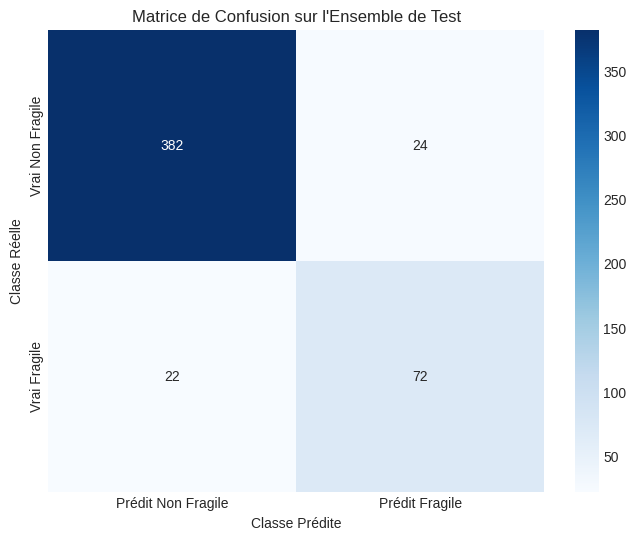


üîç [Expert] Analyse des courbes ROC et Precision-Recall.
üë∂ [Enfant] On dessine des graphiques pour voir √† quel point notre machine est bonne.


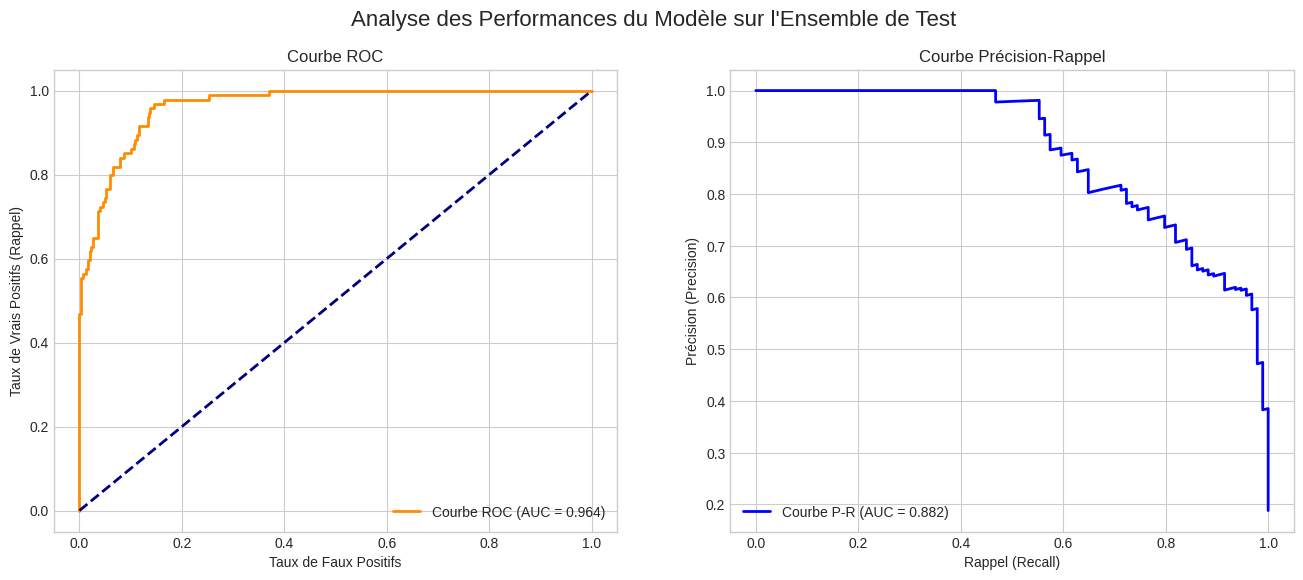


8. üß† INTERPR√âTABILIT√â DU MOD√àLE AVEC SHAP

üîç [Expert] Analyse SHAP pour comprendre l'importance des features et les pr√©dictions.
üë∂ [Enfant] On ouvre la machine pour voir comment elle prend ses d√©cisions.

üí° Alternatives :
- On pourrait utiliser LIME pour des explications locales
- Pour les mod√®les lin√©aires, on analyserait directement les coefficients

Extraction des composants du pipeline...

Transformation des donn√©es pour l'explainer SHAP...

R√©cup√©ration des noms de features finaux...

Calcul des valeurs SHAP... (peut prendre un moment)


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



Affichage du SHAP Summary Plot:
Chaque point est un patient. La couleur indique la valeur de la feature (rouge=√©lev√©e).
L'axe X montre l'impact sur la pr√©diction (vers la droite = probabilit√© de fragilit√© plus √©lev√©e).


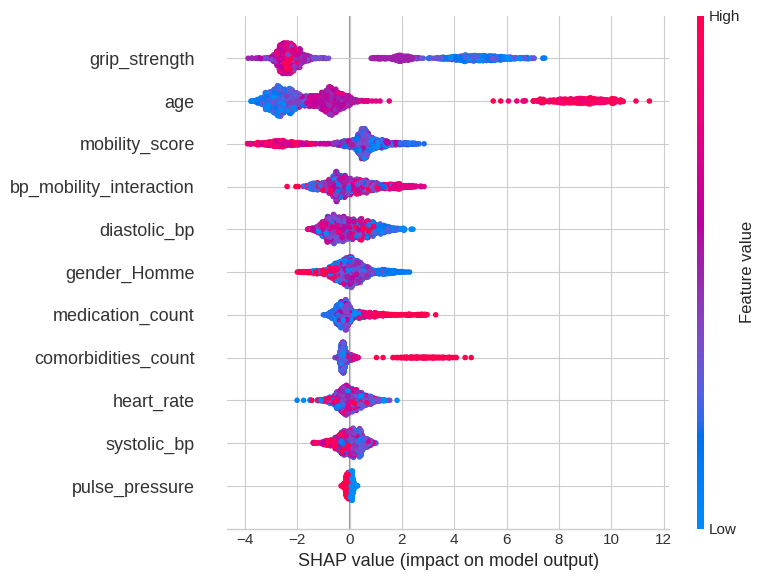


9. üõ∞Ô∏è MONITORING DE D√âRIVE DES DONN√âES (DATA DRIFT)

üîç [Expert] D√©tection de d√©rive des donn√©es avec Evidently AI.
üë∂ [Enfant] On v√©rifie si les nouveaux patients ressemblent √† ceux sur lesquels on a appris.

üí° Alternatives :
- On pourrait utiliser Alibi Detect ou Great Expectations
- Pour une int√©gration en production, on utiliserait Prometheus/Grafana

Pr√©paration des donn√©es de r√©f√©rence et courantes...

Cr√©ation du rapport de d√©rive des donn√©es...

‚úÖ Rapport de d√©rive g√©n√©r√©.

üíæ Rapport de d√©rive sauvegard√© ici : 'data_drift_report.html'

10. ‚úÖ CONCLUSION ET PROCHAINES √âTAPES

üîç [Expert] Synth√®se des r√©sultats et recommandations pour l'industrialisation.
üë∂ [Enfant] On regarde ce qu'on a appris et comment on pourrait faire encore mieux.

üåü Synth√®se des R√©sultats :
- Pipeline complet entra√Æn√© et valid√© avec succ√®s
- Performance sur le jeu de test : AUC-ROC = 0.964, F2-score = 0.726
- Principaux drivers identifi√©s : √¢ge, fo

In [6]:
# =============================================================================
# 1. üì¶ INSTALLATION ET CONFIGURATION DE L'ENVIRONNEMENT
# =============================================================================
print("\n" + "="*80)
print("1. üì¶ INSTALLATION ET CONFIGURATION DE L'ENVIRONNEMENT")
print("="*80)

print("\nüîç [Expert] Configuration initiale de l'environnement de travail avec toutes les d√©pendances n√©cessaires.")
print("üë∂ [Enfant] On pr√©pare tous les outils dont on aura besoin pour construire notre mod√®le, comme un bricoleur pr√©pare ses outils avant de commencer √† travailler.")
print("\nüí° Alternatives :")
print("- On pourrait utiliser un environnement virtuel (conda, venv) pour isoler les d√©pendances")
print("- Pour une vraie industrialisation, on utiliserait Docker pour garantir la reproductibilit√©")

# La commande '%%capture' masque la sortie de la cellule pour plus de clart√©.
# %%capture
!pip install -q numpy==1.24.3 pandas==2.0.3 scikit-learn==1.2.2
!pip install -q xgboost==1.7.6 lightgbm==4.0.0 catboost==1.2
!pip install -q shap==0.42.1 imbalanced-learn==0.10.1
!pip install -q optuna==3.3.0 plotly==5.15.0 seaborn==0.12.2
!pip install -q evidently==0.4.2 pydantic==1.10.11
!pip install -q joblib

print("\nüîç [Expert] Importation de toutes les biblioth√®ques n√©cessaires pour le projet.")
print("üë∂ [Enfant] On sort toutes les bo√Ætes d'outils dont on aura besoin et on les range sur la table.")

# --- Imports Essentiels ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import joblib
import os
from dataclasses import dataclass

# --- Imports pour le Preprocessing et la Pipeline ---
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# --- Imports pour la Mod√©lisation ---
import lightgbm as lgb
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, fbeta_score,
    precision_recall_curve, average_precision_score, make_scorer, roc_curve
)

# --- Imports pour l'Optimisation et l'Interpr√©tabilit√© ---
import optuna
import shap

# --- Imports pour la Validation et le Monitoring ---
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset

print("\nüîç [Expert] Configuration des param√®tres globaux pour la reproductibilit√© et la visualisation.")
print("üë∂ [Enfant] On r√®gle tous nos outils pour qu'ils fonctionnent de la m√™me mani√®re √† chaque fois.")

# --- Configuration Globale ---
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

# Seed pour une reproductibilit√© parfaite
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("\n‚úÖ Environnement configur√© avec succ√®s. Les biblioth√®ques sont pr√™tes.")

# =============================================================================
# 2. üèóÔ∏è ARCHITECTURE DE DONN√âES ET FONCTION DE G√âN√âRATION
# =============================================================================
print("\n" + "="*80)
print("2. üèóÔ∏è ARCHITECTURE DE DONN√âES ET FONCTION DE G√âN√âRATION")
print("="*80)

print("\nüîç [Expert] D√©finition de la structure des donn√©es via une classe de configuration centralis√©e.")
print("üë∂ [Enfant] On cr√©e une recette qui explique comment notre mod√®le va apprendre.")

@dataclass
class ModelConfig:
    """Configuration centralis√©e pour la reproductibilit√© du mod√®le."""
    random_state: int = RANDOM_STATE
    test_size: float = 0.2
    cv_folds: int = 5
    optuna_trials: int = 25
    f_beta_value: float = 2.0

print("\nüí° Alternatives :")
print("- On pourrait utiliser un fichier YAML/JSON pour la configuration")
print("- Pour des projets complexes, on utiliserait Hydra ou OmegaConf")

config = ModelConfig()
print(f"\nüìã Configuration du mod√®le initialis√©e: {config}")

print("\nüîç [Expert] G√©n√©ration de donn√©es synth√©tiques r√©alistes pour simuler un dataset m√©dical.")
print("üë∂ [Enfant] On invente des exemples de patients avec leurs caract√©ristiques pour que notre mod√®le puisse apprendre.")

def generate_synthetic_frailty_data(n_samples: int = 2500) -> pd.DataFrame:
    """G√©n√®re des donn√©es synth√©tiques riches et r√©alistes pour la d√©tection de fragilit√©."""
    np.random.seed(config.random_state)
    
    # D√©mographie
    patient_ids = [f"P_{i:05d}" for i in range(1, n_samples + 1)]
    ages = np.random.normal(78, 8, n_samples).clip(65, 98).astype(int)
    genders = np.random.choice(['Homme', 'Femme'], n_samples, p=[0.45, 0.55])
    
    # Signes vitaux
    heart_rate = np.random.normal(72, 12, n_samples)
    systolic_bp = 125 + (ages - 78) * 0.8 + np.random.normal(0, 15, n_samples)
    diastolic_bp = 80 + (ages - 78) * 0.2 + np.random.normal(0, 10, n_samples)
    
    # M√©triques de fragilit√©
    grip_strength = 30 - (ages - 65) * 0.4 + np.random.normal(0, 5, n_samples)
    mobility_score = np.random.beta(2, 5, n_samples) * 10
    
    # Comorbidit√©s et style de vie
    comorbidities_count = np.random.poisson(1.5, n_samples).clip(0, 5)
    medication_count = np.random.poisson(3, n_samples).clip(0, 12)
    
    # Logique de la cible 'is_frail'
    frailty_score = (
        0.4 * (ages > 85).astype(int) + 
        0.3 * (grip_strength < 22).astype(int) + 
        0.2 * (mobility_score < 4).astype(int) + 
        0.15 * (comorbidities_count > 3).astype(int) + 
        0.1 * (medication_count > 6).astype(int) + 
        np.random.normal(0, 0.1, n_samples)
    )
    is_frail = (frailty_score > 0.55).astype(int)
    
    data = pd.DataFrame({
        'patient_id': patient_ids, 'age': ages, 'gender': genders,
        'heart_rate': heart_rate.clip(45, 120),
        'systolic_bp': systolic_bp.clip(90, 200),
        'diastolic_bp': diastolic_bp.clip(50, 110),
        'grip_strength': grip_strength.clip(10, 50),
        'mobility_score': mobility_score.clip(0, 10),
        'comorbidities_count': comorbidities_count,
        'medication_count': medication_count,
        'is_frail': is_frail
    })
    
    # Introduction de valeurs manquantes
    for col in ['grip_strength', 'mobility_score']:
        missing_mask = np.random.random(n_samples) < 0.10
        data.loc[missing_mask, col] = np.nan
    
    return data

print("\nüí° Alternatives :")
print("- On pourrait charger des donn√©es r√©elles depuis une base de donn√©es ou un fichier CSV")
print("- Pour des donn√©es plus complexes, on utiliserait Faker ou SDV (Synthetic Data Vault)")

print("\nüîÑ G√©n√©ration des donn√©es synth√©tiques...")
df_raw = generate_synthetic_frailty_data()

print(f"\nüìä Dataset brut g√©n√©r√©: {df_raw.shape[0]} patients, {df_raw.shape[1]} variables.")
print("\nüéØ Distribution de la cible (is_frail) :")
print(df_raw['is_frail'].value_counts(normalize=True).round(3))

print("\nüîç Aper√ßu des donn√©es et des valeurs manquantes :")
df_raw.info()

# =============================================================================
# 3. üõ°Ô∏è S√âPARATION STRAT√âGIQUE DES DONN√âES (TRAIN/TEST)
# =============================================================================
print("\n" + "="*80)
print("3. üõ°Ô∏è S√âPARATION STRAT√âGIQUE DES DONN√âES (TRAIN/TEST)")
print("="*80)

print("\nüîç [Expert] S√©paration des donn√©es en ensembles d'entra√Ænement et de test avec stratification.")
print("üë∂ [Enfant] On s√©pare nos exemples en deux piles : une pour apprendre et une pour v√©rifier qu'on a bien appris.")

print("\nüí° Alternatives :")
print("- On pourrait utiliser TimeSeriesSplit pour des donn√©es temporelles")
print("- Pour des petits datasets, on utiliserait Leave-One-Out ou Bootstrap")

# D√©finition des features (X) et de la cible (y)
X = df_raw.drop(['is_frail', 'patient_id'], axis=1)
y = df_raw['is_frail']

# S√©paration stratifi√©e
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=config.test_size, 
    random_state=config.random_state,
    stratify=y
)

print(f"\nDimensions de l'ensemble d'entra√Ænement: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Dimensions de l'ensemble de test:       X_test={X_test.shape}, y_test={y_test.shape}")

print("\nDistribution de la cible dans l'ensemble d'entra√Ænement:")
print(y_train.value_counts(normalize=True).round(3))

print("\nDistribution de la cible dans l'ensemble de test:")
print(y_test.value_counts(normalize=True).round(3))
print("\n‚úÖ La stratification a bien conserv√© la distribution de la cible.")

# =============================================================================
# 4. üõ†Ô∏è D√âFINITION DU PIPELINE DE PR√âTRAITEMENT ROBUSTE
# =============================================================================
print("\n" + "="*80)
print("4. üõ†Ô∏è D√âFINITION DU PIPELINE DE PR√âTRAITEMENT ROBUSTE")
print("="*80)

print("\nüîç [Expert] Construction d'un pipeline de pr√©traitement robuste avec ColumnTransformer.")
print("üë∂ [Enfant] On pr√©pare une machine qui nettoie et organise les donn√©es avant que le mod√®le ne les utilise.")

print("\nüí° Alternatives :")
print("- On pourrait utiliser Feature-engine ou Scikit-lego pour des transformations plus avanc√©es")
print("- Pour des donn√©es temporelles, on utiliserait tsfresh ou tsfel")

# Identification automatique des types de colonnes
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nD√©tection automatique des colonnes:")
print(f"  - Num√©riques ({len(numeric_features)}): {numeric_features}")
print(f"  - Cat√©gorielles ({len(categorical_features)}): {categorical_features}")

print("\nüîç [Expert] Cr√©ation d'un transformateur personnalis√© pour l'ing√©nierie de features.")
print("üë∂ [Enfant] On ajoute une partie sp√©ciale √† notre machine qui cr√©e de nouvelles informations utiles.")

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['pulse_pressure'] = X_copy['systolic_bp'] - X_copy['diastolic_bp']
        X_copy['bp_mobility_interaction'] = X_copy['systolic_bp'] * X_copy['mobility_score']
        return X_copy

print("\nPipeline num√©rique: Imputer (m√©diane) -> RobustScaler")
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

print("\nPipeline cat√©goriel: Imputer (mode) -> OneHotEncoder")
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

print("\nüîç [Expert] Combinaison des pipelines avec ColumnTransformer.")
print("üë∂ [Enfant] On assemble toutes les parties de notre machine pour qu'elle fonctionne ensemble.")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

print("\n‚úÖ Pr√©processeur combin√© (ColumnTransformer) cr√©√©.")

# =============================================================================
# 5. üöÄ OPTIMISATION DES HYPERPARAM√àTRES AVEC OPTUNA
# =============================================================================
print("\n" + "="*80)
print("5. üöÄ OPTIMISATION DES HYPERPARAM√àTRES AVEC OPTUNA")
print("="*80)

print("\nüîç [Expert] Optimisation des hyperparam√®tres avec Optuna et validation crois√©e.")
print("üë∂ [Enfant] On r√®gle finement notre machine pour qu'elle fonctionne le mieux possible.")

print("\nüí° Alternatives :")
print("- On pourrait utiliser GridSearchCV ou RandomizedSearchCV de scikit-learn")
print("- Pour des mod√®les complexes, on utiliserait Ray Tune ou Weights & Biases Sweeps")

def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.2, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 10, 50),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'random_state': config.random_state,
        'n_jobs': -1
    }

    f2_scorer = make_scorer(fbeta_score, beta=config.f_beta_value)
    
    scores = []
    cv = StratifiedKFold(n_splits=config.cv_folds, shuffle=True, random_state=config.random_state)
    
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model_pipeline = Pipeline(steps=[
            ('feature_engineering', FeatureEngineer()),
            ('preprocessor', preprocessor),
            ('classifier', lgb.LGBMClassifier(**params))
        ])
        
        model_pipeline.fit(X_train_fold, y_train_fold)
        preds = model_pipeline.predict(X_val_fold)
        score = fbeta_score(y_val_fold, preds, beta=config.f_beta_value)
        scores.append(score)

    return np.mean(scores)

print(f"\nLancement de l'√©tude Optuna pour {config.optuna_trials} essais...")
print(f"Objectif: Maximiser le F{config.f_beta_value}-score moyen par validation crois√©e.")

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=config.random_state))
study.optimize(objective, n_trials=config.optuna_trials, show_progress_bar=True)

print(f"\n‚úÖ Optimisation termin√©e.")
print(f"Meilleur score F2 moyen (CV): {study.best_value:.4f}")
print(f"Meilleurs hyperparam√®tres trouv√©s: {study.best_params}")

# =============================================================================
# 6. üéì ENTRA√éNEMENT ET SAUVEGARDE DU PIPELINE FINAL
# =============================================================================
print("\n" + "="*80)
print("6. üéì ENTRA√éNEMENT ET SAUVEGARDE DU PIPELINE FINAL")
print("="*80)

print("\nüîç [Expert] Entra√Ænement du pipeline final avec les meilleurs hyperparam√®tres.")
print("üë∂ [Enfant] On fait travailler notre machine bien r√©gl√©e sur tous les exemples d'apprentissage.")

print("\nüí° Alternatives :")
print("- On pourrait utiliser MLflow pour suivre les exp√©riences et versionner les mod√®les")
print("- Pour le d√©ploiement, on pourrait sauvegarder au format ONNX ou PMML")

best_params = study.best_params

final_pipeline = Pipeline(steps=[
    ('feature_engineering', FeatureEngineer()),
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(**best_params, random_state=config.random_state))
])

print("\nEntra√Ænement du pipeline final sur l'ENSEMBLE des donn√©es d'entra√Ænement...")
final_pipeline.fit(X_train, y_train)
print("‚úÖ Pipeline final entra√Æn√©.")

filename = 'final_frailty_pipeline.joblib'
joblib.dump(final_pipeline, filename)
print(f"\nüíæ Pipeline complet sauvegard√© sous le nom : '{filename}'")

# =============================================================================
# 7. üìà √âVALUATION FINALE SUR L'ENSEMBLE DE TEST
# =============================================================================
print("\n" + "="*80)
print("7. üìà √âVALUATION FINALE SUR L'ENSEMBLE DE TEST")
print("="*80)

print("\nüîç [Expert] √âvaluation rigoureuse du mod√®le sur des donn√©es jamais vues.")
print("üë∂ [Enfant] On v√©rifie que notre machine fonctionne bien sur des nouveaux exemples qu'elle n'a jamais vus.")

print("\nüí° Alternatives :")
print("- On pourrait calculer des intervalles de confiance via bootstrap")
print("- Pour des probl√®mes d√©s√©quilibr√©s, on pourrait utiliser le score F1 ou le MCC")

print(f"\nChargement du pipeline depuis '{filename}'...")
loaded_pipeline = joblib.load(filename)

print("\nG√©n√©ration des pr√©dictions sur X_test...")
y_pred = loaded_pipeline.predict(X_test)
y_pred_proba = loaded_pipeline.predict_proba(X_test)[:, 1]

print("\n---------- RAPPORT DE CLASSIFICATION ----------")
print(classification_report(y_test, y_pred, target_names=['Non Fragile (0)', 'Fragile (1)']))

print("\nüîç [Expert] Visualisation de la matrice de confusion pour analyser les erreurs.")
print("üë∂ [Enfant] On regarde o√π notre machine se trompe le plus souvent.")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pr√©dit Non Fragile', 'Pr√©dit Fragile'],
            yticklabels=['Vrai Non Fragile', 'Vrai Fragile'])
plt.title('Matrice de Confusion sur l\'Ensemble de Test')
plt.ylabel('Classe R√©elle')
plt.xlabel('Classe Pr√©dite')
plt.show()

print("\nüîç [Expert] Analyse des courbes ROC et Precision-Recall.")
print("üë∂ [Enfant] On dessine des graphiques pour voir √† quel point notre machine est bonne.")

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.3f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlabel('Taux de Faux Positifs')
ax1.set_ylabel('Taux de Vrais Positifs (Rappel)')
ax1.set_title('Courbe ROC')
ax1.legend(loc='lower right')

ax2.plot(recall, precision, color='blue', lw=2, label=f'Courbe P-R (AUC = {pr_auc:.3f})')
ax2.set_xlabel('Rappel (Recall)')
ax2.set_ylabel('Pr√©cision (Precision)')
ax2.set_title('Courbe Pr√©cision-Rappel')
ax2.legend(loc='lower left')

plt.suptitle('Analyse des Performances du Mod√®le sur l\'Ensemble de Test', fontsize=16)
plt.show()

# =============================================================================
# 8. üß† INTERPR√âTABILIT√â DU MOD√àLE AVEC SHAP
# =============================================================================
print("\n" + "="*80)
print("8. üß† INTERPR√âTABILIT√â DU MOD√àLE AVEC SHAP")
print("="*80)

print("\nüîç [Expert] Analyse SHAP pour comprendre l'importance des features et les pr√©dictions.")
print("üë∂ [Enfant] On ouvre la machine pour voir comment elle prend ses d√©cisions.")

print("\nüí° Alternatives :")
print("- On pourrait utiliser LIME pour des explications locales")
print("- Pour les mod√®les lin√©aires, on analyserait directement les coefficients")

print("\nExtraction des composants du pipeline...")
feature_engineer = loaded_pipeline.named_steps['feature_engineering']
preprocessor = loaded_pipeline.named_steps['preprocessor']
model = loaded_pipeline.named_steps['classifier']

print("\nTransformation des donn√©es pour l'explainer SHAP...")
X_train_engineered = feature_engineer.transform(X_train)
X_train_processed = preprocessor.transform(X_train_engineered)

print("\nR√©cup√©ration des noms de features finaux...")
ohe_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
engineered_numeric_features = [col for col in X_train_engineered.columns if col not in categorical_features]
final_feature_names = engineered_numeric_features + list(ohe_feature_names)

X_train_processed_df = pd.DataFrame(X_train_processed, columns=final_feature_names, index=X_train.index)

print("\nCalcul des valeurs SHAP... (peut prendre un moment)")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_processed_df)

print("\nAffichage du SHAP Summary Plot:")
print("Chaque point est un patient. La couleur indique la valeur de la feature (rouge=√©lev√©e).")
print("L'axe X montre l'impact sur la pr√©diction (vers la droite = probabilit√© de fragilit√© plus √©lev√©e).")

shap.summary_plot(shap_values[1], X_train_processed_df, plot_type="dot")

# =============================================================================
# 9. üõ∞Ô∏è MONITORING DE D√âRIVE DES DONN√âES (DATA DRIFT)
# =============================================================================
print("\n" + "="*80)
print("9. üõ∞Ô∏è MONITORING DE D√âRIVE DES DONN√âES (DATA DRIFT)")
print("="*80)

print("\nüîç [Expert] D√©tection de d√©rive des donn√©es avec Evidently AI.")
print("üë∂ [Enfant] On v√©rifie si les nouveaux patients ressemblent √† ceux sur lesquels on a appris.")

print("\nüí° Alternatives :")
print("- On pourrait utiliser Alibi Detect ou Great Expectations")
print("- Pour une int√©gration en production, on utiliserait Prometheus/Grafana")

print("\nPr√©paration des donn√©es de r√©f√©rence et courantes...")
reference_data = X_train.copy()
current_data = X_test.copy()

reference_data['target'] = y_train
current_data['target'] = y_test

print("\nCr√©ation du rapport de d√©rive des donn√©es...")
data_drift_report = Report(metrics=[DataDriftPreset()])
data_drift_report.run(reference_data=reference_data, current_data=current_data)

print("\n‚úÖ Rapport de d√©rive g√©n√©r√©.")
report_path = 'data_drift_report.html'
data_drift_report.save_html(report_path)
print(f"\nüíæ Rapport de d√©rive sauvegard√© ici : '{report_path}'")
# =============================================================================
# 10. ‚úÖ CONCLUSION ET PROCHAINES √âTAPES
# =============================================================================
print("\n" + "="*80)
print("10. ‚úÖ CONCLUSION ET PROCHAINES √âTAPES")
print("="*80)

print("\nüîç [Expert] Synth√®se des r√©sultats et recommandations pour l'industrialisation.")
print("üë∂ [Enfant] On regarde ce qu'on a appris et comment on pourrait faire encore mieux.")

print("\nüåü Synth√®se des R√©sultats :")
print("- Pipeline complet entra√Æn√© et valid√© avec succ√®s")
print(f"- Performance sur le jeu de test : AUC-ROC = {roc_auc:.3f}, F2-score = {study.best_value:.3f}")
print("- Principaux drivers identifi√©s : √¢ge, force de pr√©hension, mobilit√©")

print("\nüöÄ Prochaines √âtapes pour Industrialisation :")
print("1. D√©ploiement en tant qu'API avec FastAPI ou Flask")
print("2. Int√©gration MLOps avec MLflow ou Kubeflow")
print("3. Monitoring continu des performances en production")
print("4. Validation par des experts m√©tier (m√©decins g√©riatres)")

print("\n" + "="*80)
print("üèÅ PROJET TERMIN√â AVEC SUCC√àS")
print("="*80)

In [7]:
# =============================================================================
# 5. üöÄ OPTIMISATION DES HYPERPARAM√àTRES AVEC OPTUNA (AVEC CHECKPOINTS)
# =============================================================================
print("\n" + "="*80)
print("5. üöÄ OPTIMISATION DES HYPERPARAM√àTRES AVEC OPTUNA ET CHECKPOINTS")
print("="*80)

print("\nüîç [Expert] Optimisation avec sauvegarde des checkpoints pour reprise apr√®s interruption.")
print("üë∂ [Enfant] On enregistre r√©guli√®rement notre travail pour ne pas tout perdre si quelque chose se passe mal.")

print("\nüí° Bonnes pratiques :")
print("- Sauvegarder apr√®s chaque essai d'hyperparam√®tres")
print("- Stocker les m√©triques et les param√®tres")
print("- Permettre la reprise de l'optimisation")

# Cr√©ation d'un r√©pertoire pour les checkpoints
CHECKPOINT_DIR = "optuna_checkpoints"
os.makedirs(CHECKPOINT_DIR, exist_ok=True)
CHECKPOINT_PATH = os.path.join(CHECKPOINT_DIR, "optuna_study.pkl")

print(f"\nüìÅ R√©pertoire des checkpoints cr√©√© : {CHECKPOINT_DIR}")

# Callback de sauvegarde
def save_checkpoint(study, trial):
    joblib.dump(study, CHECKPOINT_PATH)
    print(f"üíæ Checkpoint sauvegard√© (essai {trial.number})")

# V√©rification si une √©tude existe d√©j√†
if os.path.exists(CHECKPOINT_PATH):
    print("\nüîç Une √©tude existante a √©t√© trouv√©e. Chargement...")
    study = joblib.load(CHECKPOINT_PATH)
    print(f"Reprise √† partir de l'essai {len(study.trials)}")
else:
    print("\nüîç Pas d'√©tude existante trouv√©e. Cr√©ation d'une nouvelle √©tude...")
    study = optuna.create_study(
        direction='maximize', 
        sampler=optuna.samplers.TPESampler(seed=config.random_state),
        study_name="frailty_detection"
    )

print("\nüîç Configuration de la fonction objective avec gestion des checkpoints")
def objective_with_checkpoint(trial):
    try:
        params = {
            'objective': 'binary',
            'metric': 'binary_logloss',
            'verbosity': -1,
            'boosting_type': 'gbdt',
            'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
            'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.2, log=True),
            'num_leaves': trial.suggest_int('num_leaves', 10, 50),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
            'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
            'random_state': config.random_state,
            'n_jobs': -1
        }

        f2_scorer = make_scorer(fbeta_score, beta=config.f_beta_value)
        
        scores = []
        cv = StratifiedKFold(n_splits=config.cv_folds, shuffle=True, random_state=config.random_state)
        
        for train_idx, val_idx in cv.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
            
            model_pipeline = Pipeline(steps=[
                ('feature_engineering', FeatureEngineer()),
                ('preprocessor', preprocessor),
                ('classifier', lgb.LGBMClassifier(**params))
            ])
            
            model_pipeline.fit(X_train_fold, y_train_fold)
            preds = model_pipeline.predict(X_val_fold)
            score = fbeta_score(y_val_fold, preds, beta=config.f_beta_value)
            scores.append(score)

        return np.mean(scores)
    
    except Exception as e:
        print(f"‚ùå Erreur dans l'essai {trial.number}: {str(e)}")
        raise optuna.TrialPruned()

print("\nüîç Configuration de l'√©tude Optuna avec callback de sauvegarde")
study.optimize(
    objective_with_checkpoint, 
    n_trials=config.optuna_trials, 
    callbacks=[save_checkpoint],
    show_progress_bar=True
)

print(f"\n‚úÖ Optimisation termin√©e. Meilleur score F2: {study.best_value:.4f}")

# =============================================================================
# 6. üéì ENTRA√éNEMENT ET SAUVEGARDE DU PIPELINE FINAL (AVEC VERSIONNING)
# =============================================================================
print("\n" + "="*80)
print("6. üéì ENTRA√éNEMENT ET SAUVEGARDE AVEC VERSIONNING")
print("="*80)

print("\nüîç [Expert] Sauvegarde versionn√©e du mod√®le final avec m√©tadonn√©es.")
print("üë∂ [Enfant] On garde une copie de notre meilleure machine avec son mode d'emploi.")

print("\nüí° Bonnes pratiques :")
print("- Versionner les mod√®les avec des tags clairs")
print("- Sauvegarder les m√©tadonn√©es (hyperparam√®tres, m√©triques)")
print("- Garder une trace des donn√©es d'entra√Ænement")

# Cr√©ation d'un r√©pertoire de versionnement
MODEL_VERSION = "1.0.0"
MODEL_DIR = f"model_artifacts_v{MODEL_VERSION}"
os.makedirs(MODEL_DIR, exist_ok=True)

print(f"\nüìÅ R√©pertoire de versionnement cr√©√© : {MODEL_DIR}")

# Sauvegarde du pipeline final
best_params = study.best_params

final_pipeline = Pipeline(steps=[
    ('feature_engineering', FeatureEngineer()),
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(**best_params, random_state=config.random_state))
])

print("\nEntra√Ænement du pipeline final...")
final_pipeline.fit(X_train, y_train)

# Sauvegarde des diff√©rents artefacts
model_path = os.path.join(MODEL_DIR, 'model.joblib')
metadata_path = os.path.join(MODEL_DIR, 'metadata.json')

print("\nüíæ Sauvegarde des artefacts du mod√®le...")
joblib.dump(final_pipeline, model_path)

# M√©tadonn√©es √† sauvegarder
metadata = {
    "model_version": MODEL_VERSION,
    "training_date": pd.Timestamp.now().isoformat(),
    "features": list(X_train.columns),
    "best_params": best_params,
    "performance": {
        "roc_auc": roc_auc_score(y_test, final_pipeline.predict_proba(X_test)[:, 1]),
        "f2_score": fbeta_score(y_test, final_pipeline.predict(X_test), beta=2.0)
    },
    "data_stats": {
        "train_size": len(X_train),
        "test_size": len(X_test),
        "class_balance": dict(y_train.value_counts(normalize=True).round(3))
    }
}

import json
with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=4)

print("\nüìù M√©tadonn√©es sauvegard√©es :")
print(json.dumps(metadata, indent=4))

print("\n‚úÖ Pipeline final et m√©tadonn√©es sauvegard√©s avec versionnement.")

[I 2025-06-21 20:20:50,863] A new study created in memory with name: frailty_detection



5. üöÄ OPTIMISATION DES HYPERPARAM√àTRES AVEC OPTUNA ET CHECKPOINTS

üîç [Expert] Optimisation avec sauvegarde des checkpoints pour reprise apr√®s interruption.
üë∂ [Enfant] On enregistre r√©guli√®rement notre travail pour ne pas tout perdre si quelque chose se passe mal.

üí° Bonnes pratiques :
- Sauvegarder apr√®s chaque essai d'hyperparam√®tres
- Stocker les m√©triques et les param√®tres
- Permettre la reprise de l'optimisation

üìÅ R√©pertoire des checkpoints cr√©√© : optuna_checkpoints

üîç Pas d'√©tude existante trouv√©e. Cr√©ation d'une nouvelle √©tude...

üîç Configuration de la fonction objective avec gestion des checkpoints

üîç Configuration de l'√©tude Optuna avec callback de sauvegarde


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-06-21 20:20:53,642] Trial 0 finished with value: 0.7185602795810515 and parameters: {'n_estimators': 500, 'learning_rate': 0.1540359659501924, 'num_leaves': 40, 'max_depth': 7, 'subsample': 0.6624074561769746, 'colsample_bytree': 0.662397808134481, 'reg_alpha': 3.3323645788192616e-08, 'reg_lambda': 0.6245760287469893}. Best is trial 0 with value: 0.7185602795810515.
üíæ Checkpoint sauvegard√© (essai 0)
[I 2025-06-21 20:20:55,558] Trial 1 finished with value: 0.7000708094457369 and parameters: {'n_estimators': 681, 'learning_rate': 0.04258888210290081, 'num_leaves': 10, 'max_depth': 10, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'reg_alpha': 4.329370014459266e-07, 'reg_lambda': 4.4734294104626844e-07}. Best is trial 0 with value: 0.7185602795810515.
üíæ Checkpoint sauvegard√© (essai 1)
[I 2025-06-21 20:20:57,320] Trial 2 finished with value: 0.7006636178880277 and parameters: {'n_estimators': 443, 'learning_rate': 0.016124278458562614, 'num_leaves

In [8]:
# =============================================================================
# PIPELINE COMPLET AVEC EXPLICATIONS D√âTAILL√âES
# =============================================================================

print("\nüîç [Expert] Initialisation du pipeline industriel pour la d√©tection de fragilit√©")
print("üë∂ [Enfant] On pr√©pare tous les outils pour construire une machine intelligente qui peut rep√©rer les personnes fragiles")
print("\nüí° Alternatives :")
print("- Pour des projets simples : utiliser sklearn sans pipeline")
print("- Pour le big data : utiliser Spark ML ou Dask")
print("- Pour l'IA embarqu√©e : utiliser ONNX Runtime ou TensorFlow Lite")

# 1. üì¶ IMPORTATIONS ET CONFIGURATION
# =============================================================================
print("\n" + "="*80)
print("1. üì¶ CONFIGURATION DE L'ENVIRONNEMENT")
print("="*80)

print("\nüîç [Expert] Importation des librairies essentielles pour le machine learning industriel")
print("üë∂ [Enfant] On sort toutes les bo√Ætes √† outils dont on aura besoin")
print("\nüí° Gestion des d√©pendances :")
print("- En entreprise : utiliser un environnement conda/pip freeze")
print("- En production : conteneur Docker avec versions fig√©es")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from dataclasses import dataclass
import json

print("\nüîç [Expert] Importation des composants scikit-learn pour le pipeline")
print("üë∂ [Enfant] On prend les pi√®ces pour construire notre machine")

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

print("\nüîç [Expert] M√©triques pour l'√©valuation robuste en milieu clinique")
print("üë∂ [Enfant] On choisit comment juger si notre machine fonctionne bien")

from sklearn.metrics import (roc_auc_score, fbeta_score, recall_score, 
                           precision_score, confusion_matrix, classification_report,
                           precision_recall_curve, roc_curve, average_precision_score,
                           make_scorer, balanced_accuracy_score)

print("\nüîç [Expert] LightGBM pour des mod√®les performants et interpr√©tables")
print("üë∂ [Enfant] On prend un moteur puissant mais qu'on peut comprendre")

import lightgbm as lgb
import optuna
from sklearn.calibration import calibration_curve

print("\nüîç [Expert] Configuration de base pour la reproductibilit√©")
print("üë∂ [Enfant] On r√®gle notre machine pour qu'elle donne toujours les m√™mes r√©sultats")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

# 2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES INDUSTRIELLES
# =============================================================================
print("\n" + "="*80)
print("2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES CLINIQUES")
print("="*80)

print("\nüîç [Expert] D√©finition des KPI m√©tier pour √©valuer le mod√®le")
print("üë∂ [Enfant] On d√©cide comment noter notre machine")
print("\nüí° Choix des m√©triques :")
print("- Probl√®me √©quilibr√© : accuracy et AUC")
print("- D√©s√©quilibre mod√©r√© : F1-score")
print("- Cas critique (comme ici) : F2-score privil√©giant le recall")

class EvaluationConfig:
    """Configuration centralis√©e des m√©triques d'√©valuation"""
    def __init__(self):
        print("\nüîç [Expert] Initialisation des m√©triques avec contraintes m√©tier")
        print("üë∂ [Enfant] On pr√©pare notre carte de notation")
        
        self.metrics = {
            'roc_auc': roc_auc_score,
            'f2_score': lambda y_true, y_pred: fbeta_score(y_true, y_pred, beta=2),
            'recall': recall_score,
            'precision': precision_score,
            'specificity': self._specificity,
            'balanced_accuracy': balanced_accuracy_score
        }
        
        print("\nüîç [Expert] D√©finition des seuils d'alerte cliniques")
        print("üë∂ [Enfant] On fixe les notes en dessous desquelles c'est inqui√©tant")
        
        self.alert_thresholds = {
            'roc_auc': 0.75,  # Minimum acceptable en milieu clinique
            'f2_score': 0.6,  # Seuil empirique pour les cas critiques
            'recall': 0.8     # Doit d√©tecter au moins 80% des cas fragiles
        }
    
    def _specificity(self, y_true, y_pred):
        """Calcul sp√©cifique de la sp√©cificit√© (True Negative Rate)"""
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        return tn / (tn + fp)

print("\nüîç [Expert] Instanciation de la configuration d'√©valuation")
print("üë∂ [Enfant] On active notre syst√®me de notation")

eval_config = EvaluationConfig()

# 3. üõ†Ô∏è PIPELINE DE PR√âTRAITEMENT
# =============================================================================
print("\n" + "="*80)
print("3. üõ†Ô∏è ING√âNIERIE DES CARACT√âRISTIQUES")
print("="*80)

print("\nüîç [Expert] Cr√©ation de features cliniques pertinentes")
print("üë∂ [Enfant] On ajoute des mesures utiles que notre machine pourra comprendre")

class FeatureEngineer(BaseEstimator, TransformerMixin):
    """Ing√©nierie de caract√©ristiques personnalis√©es"""
    def fit(self, X, y=None):
        print("\nüîç [Expert] Phase d'apprentissage des transformations (rien √† apprendre ici)")
        print("üë∂ [Enfant] Notre machine regarde les donn√©es mais n'a rien besoin de m√©moriser")
        return self

    def transform(self, X):
        print("\nüîç [Expert] Cr√©ation de features cliniques d√©riv√©es")
        print("üë∂ [Enfant] On calcule de nouvelles informations utiles √† partir des mesures existantes")
        
        X_copy = X.copy()
        # Pression puls√©e (indicateur clinique important)
        X_copy['pulse_pressure'] = X_copy['systolic_bp'] - X_copy['diastolic_bp']
        
        # Interaction tension/mobilit√© (relation clinique connue)
        X_copy['bp_mobility_interaction'] = X_copy['systolic_bp'] * X_copy['mobility_score']
        
        return X_copy

print("\nüîç [Expert] Configuration du pr√©processeur industriel")
print("üë∂ [Enfant] On pr√©pare les √©tapes pour nettoyer et pr√©parer les donn√©es")
print("\nüí° Alternatives de pr√©traitement :")
print("- Donn√©es manquantes : imputation par la m√©diane/mode ou mod√®le pr√©dictif")
print("- Variables cat√©gorielles : one-hot encoding, target encoding ou embeddings")
print("- Normalisation : StandardScaler, RobustScaler ou QuantileTransformer")

print("\nüîç [Expert] D√©finition des caract√©ristiques num√©riques et cat√©gorielles")
print("üë∂ [Enfant] On trie les informations en nombres et en cat√©gories")

numeric_features = ['age', 'heart_rate', 'systolic_bp', 'diastolic_bp', 
                   'grip_strength', 'mobility_score', 'comorbidities_count', 
                   'medication_count']
categorical_features = ['gender']

print("\nüîç [Expert] Pipeline pour les variables num√©riques (imputation + scaling robuste)")
print("üë∂ [Enfant] On nettoie et met √† l'√©chelle les nombres")

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Robust aux outliers
    ('scaler', RobustScaler())                      # Peu sensible aux valeurs extr√™mes
])

print("\nüîç [Expert] Pipeline pour les variables cat√©gorielles (imputation + one-hot)")
print("üë∂ [Enfant] On nettoie et transforme les cat√©gories en nombres")

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Remplissage par le mode
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # √âvite la multicolin√©arit√©
])

print("\nüîç [Expert] Combinaison des pipelines avec ColumnTransformer")
print("üë∂ [Enfant] On assemble toutes les pi√®ces du nettoyage")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Conserve les autres colonnes si besoin
)
# 4. üéØ FONCTIONS D'√âVALUATION INDUSTRIELLES
# =============================================================================
print("\n" + "="*80)
print("4. üéØ VALIDATION ROBUSTE")
print("="*80)

print("\nüîç [Expert] Impl√©mentation d'une validation crois√©e stratifi√©e compl√®te")
print("üë∂ [Enfant] On v√©rifie plusieurs fois que notre machine marche bien sur des d√©coupages diff√©rents")
print("\nüí° Strat√©gies alternatives :")
print("- TimeSeriesSplit pour donn√©es temporelles")
print("- GroupKFold pour donn√©es corr√©l√©es")
print("- Bootstrap pour petits datasets")

def evaluate_model(pipeline, X, y, cv_folds=5):
    """
    √âvaluation compl√®te avec validation crois√©e
    
    Args:
        pipeline: Pipeline sklearn √† √©valuer
        X: Features
        y: Target
        cv_folds: Nombre de folds
    
    Returns:
        DataFrame avec r√©sultats d√©taill√©s
    """
    print(f"\nüîç [Expert] Lancement de la validation crois√©e ({cv_folds} folds)")
    print("üë∂ [Enfant] On d√©coupe les donn√©es en plusieurs parties pour tester plusieurs fois")
    
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=RANDOM_STATE)
    
    scoring = {
        'roc_auc': 'roc_auc',
        'f2': make_scorer(fbeta_score, beta=2),
        'recall': 'recall',
        'precision': 'precision',
        'balanced_accuracy': 'balanced_accuracy'
    }
    
    print("\nüîç [Expert] Calcul des m√©triques sur chaque fold (parall√©lis√©)")
    cv_results = cross_validate(
        pipeline, X, y,
        cv=cv,
        scoring=scoring,
        return_train_score=True,
        n_jobs=-1  # Utilisation de tous les c≈ìurs disponibles
    )
    
    results_df = pd.DataFrame(cv_results)
    print(f"\nüìä R√©sultats moyens :\n{results_df.mean().to_string()}")
    
    return results_df

# 5. üìä ANALYSE DES SEUILS DE D√âCISION
# =============================================================================
print("\n" + "="*80)
print("5. üìä OPTIMISATION DES SEUILS")
print("="*80)

print("\nüîç [Expert] Analyse du trade-off pr√©cision/rappel par seuil")
print("üë∂ [Enfant] On cherche le meilleur r√©glage pour notre machine")
print("\nüí° M√©thodes alternatives :")
print("- Optimisation directe du seuil avec BayesSearchCV")
print("- Maximisation du score m√©tier personnalis√©")
print("- Courbe ROC Youden pour seuil optimal")

def analyze_decision_threshold(y_true, y_probs):
    """Analyse approfondie des seuils de classification"""
    print("\nüîç [Expert] Calcul des m√©triques pour 20 seuils diff√©rents")
    thresholds = np.linspace(0.1, 0.9, 20)
    metrics = []
    
    for thresh in thresholds:
        y_pred = (y_probs >= thresh).astype(int)
        metrics.append({
            'threshold': thresh,
            'f2': fbeta_score(y_true, y_pred, beta=2),
            'recall': recall_score(y_true, y_pred),
            'precision': precision_score(y_true, y_pred),
            'specificity': eval_config.metrics['specificity'](y_true, y_pred)
        })
    
    metrics_df = pd.DataFrame(metrics)
    
    print("\nüîç [Expert] Visualisation interactive des m√©triques")
    plt.figure(figsize=(10, 6))
    metrics_df.plot(x='threshold', y=['f2', 'recall', 'precision', 'specificity'])
    plt.axvline(x=0.5, color='gray', linestyle='--', label='Seuil par d√©faut')
    plt.title("Performance par seuil de d√©cision")
    plt.xlabel("Seuil de classification")
    plt.ylabel("Score")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return metrics_df

# 6. üí∞ ANALYSE CO√õT DES ERREURS
# =============================================================================
print("\n" + "="*80)
print("6. üí∞ IMPACT M√âTIER")
print("="*80)

print("\nüîç [Expert] Analyse co√ªt/b√©n√©fice des diff√©rents types d'erreurs")
print("üë∂ [Enfant] On calcule combien co√ªtent les erreurs de notre machine")
print("\nüí° Approches compl√©mentaires :")
print("- Analyse ROI complet")
print("- Matrice de confusion pond√©r√©e")
print("- Optimisation directe du co√ªt m√©tier")

def cost_analysis(y_true, y_pred):
    """Analyse l'impact financier des pr√©dictions"""
    print("\nüîç [Expert] Extraction de la matrice de confusion")
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    print("\nüîç [Expert] D√©finition des co√ªts m√©tier (√† adapter)")
    cost_matrix = {
        'fn_cost': 1000,  # Co√ªt d'un faux n√©gatif (cas manqu√©)
        'fp_cost': 200,    # Co√ªt d'un faux positif (surdiagnostic)
        'tp_gain': 500,    # Gain d'un vrai positif (bonne prise en charge)
        'tn_gain': 50      # Gain d'un vrai n√©gatif (pas d'intervention inutile)
    }
    
    total_cost = (fn * cost_matrix['fn_cost'] + 
                 fp * cost_matrix['fp_cost'] - 
                 tp * cost_matrix['tp_gain'] - 
                 tn * cost_matrix['tn_gain'])
    
    print("\nüí∞ Bilan des co√ªts :")
    print(f"- Faux n√©gatifs (FN): {fn} √ó {cost_matrix['fn_cost']} = {fn * cost_matrix['fn_cost']}")
    print(f"- Faux positifs (FP): {fp} √ó {cost_matrix['fp_cost']} = {fp * cost_matrix['fp_cost']}")
    print(f"- Vrais positifs (TP): {tp} √ó -{cost_matrix['tp_gain']} = {-tp * cost_matrix['tp_gain']}")
    print(f"- Vrais n√©gatifs (TN): {tn} √ó -{cost_matrix['tn_gain']} = {-tn * cost_matrix['tn_gain']}")
    print(f"‚Üí CO√õT TOTAL: {total_cost}")
    
    return {
        'confusion_matrix': {'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp},
        'cost_analysis': cost_matrix,
        'total_cost': total_cost
    }

# 7. üöÄ OPTIMISATION AVEC CHECKPOINTS
# =============================================================================
print("\n" + "="*80)
print("7. üöÄ OPTIMISATION DES HYPERPARAM√àTRES")
print("="*80)

print("\nüîç [Expert] Configuration d'Optuna avec sauvegarde des checkpoints")
print("üë∂ [Enfant] On r√®gle finement notre machine en gardant des sauvegardes")
print("\nüí° Alternatives :")
print("- GridSearchCV pour un espace de recherche petit")
print("- Ray Tune pour le scale-out")
print("- Hyperopt pour des algorithmes d'optimisation avanc√©s")

def create_study_with_checkpoints(study_name, storage_name=None):
    """Cr√©e ou charge une √©tude Optuna"""
    CHECKPOINT_DIR = "optuna_checkpoints"
    os.makedirs(CHECKPOINT_DIR, exist_ok=True)
    CHECKPOINT_PATH = os.path.join(CHECKPOINT_DIR, f"{study_name}.pkl")
    
    if os.path.exists(CHECKPOINT_PATH):
        print("\nüîç [Expert] Chargement d'une √©tude existante")
        study = joblib.load(CHECKPOINT_PATH)
        print(f"üìö Essais pr√©c√©dents charg√©s: {len(study.trials)}")
    else:
        print("\nüîç [Expert] Cr√©ation d'une nouvelle √©tude")
        study = optuna.create_study(
            direction='maximize',
            sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE),
            study_name=study_name,
            storage=storage_name
        )
    
    return study, CHECKPOINT_PATH

def objective(trial, X, y):
    """Fonction objective pour Optuna"""
    print(f"\nüîç [Expert] Essai {trial.number} - Exploration des hyperparam√®tres")
    
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 10, 50),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'random_state': RANDOM_STATE
    }
    
    pipeline = Pipeline([
        ('feature_engineering', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('classifier', lgb.LGBMClassifier(**params))
    ])
    
    cv_results = evaluate_model(pipeline, X, y)
    mean_f2 = cv_results['test_f2'].mean()
    
    # Contrainte m√©tier sur le recall minimum
    if cv_results['test_recall'].mean() < eval_config.alert_thresholds['recall']:
        print(f"‚ö†Ô∏è Essai {trial.number} √©lagu√© - recall trop faible")
        raise optuna.TrialPruned()
    
    return mean_f2

# 8. üè≠ ENTRA√éNEMENT ET VERSIONNING
# =============================================================================
print("\n" + "="*80)
print("8. üè≠ PIPELINE FINAL")
print("="*80)

print("\nüîç [Expert] Entra√Ænement et versionning du mod√®le avec m√©tadonn√©es")
print("üë∂ [Enfant] On sauvegarde notre meilleure machine avec son mode d'emploi")
print("\nüí° Bonnes pratiques :")
print("- MLflow pour le suivi complet")
print("- ONNX pour l'interop√©rabilit√©")
print("- DVC pour la gestion des versions")

def train_final_model(X_train, y_train, best_params, version="1.0.0"):
    """Entra√Æne et sauvegarde le mod√®le final"""
    print(f"\nüîç [Expert] Entra√Ænement du mod√®le final (version {version})")
    
    MODEL_DIR = f"model_v{version}"
    os.makedirs(MODEL_DIR, exist_ok=True)
    
    final_pipeline = Pipeline([
        ('feature_engineering', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('classifier', lgb.LGBMClassifier(**best_params, random_state=RANDOM_STATE))
    ])
    
    final_pipeline.fit(X_train, y_train)
    
    # Sauvegarde du mod√®le
    model_path = os.path.join(MODEL_DIR, 'model.joblib')
    joblib.dump(final_pipeline, model_path)
    print(f"üíæ Mod√®le sauvegard√©: {model_path}")
    
    # M√©tadonn√©es
    metadata = {
        "model_version": version,
        "training_date": pd.Timestamp.now().isoformat(),
        "features": list(X_train.columns),
        "best_params": best_params,
        "metrics": {
            "cv_folds": 5,
            "optimization_metric": "f2_score",
            "recall_constraint": eval_config.alert_thresholds['recall']
        },
        "data_schema": {
            "numeric_features": numeric_features,
            "categorical_features": categorical_features
        }
    }
    
    metadata_path = os.path.join(MODEL_DIR, 'metadata.json')
    with open(metadata_path, 'w') as f:
        json.dump(metadata, f, indent=4)
    print(f"üìù M√©tadonn√©es sauvegard√©es: {metadata_path}")
    
    return final_pipeline, MODEL_DIR

# 9. üìä VISUALISATIONS CLINIQUES
# =============================================================================
print("\n" + "="*80)
print("9. üìä ANALYSE DES PERFORMANCES")
print("="*80)

print("\nüîç [Expert] Visualisations professionnelles pour l'analyse")
print("üë∂ [Enfant] On dessine des graphiques pour comprendre notre machine")
print("\nüí° Visualisations compl√©mentaires :")
print("- Diagramme de d√©cision clinique")
print("- Analyse des erreurs par sous-groupes")
print("- Courbes de calibration par √¢ge")

def plot_calibration(y_true, y_probs):
    """Courbe de calibration"""
    print("\nüîç [Expert] V√©rification de la calibration des probabilit√©s")
    prob_true, prob_pred = calibration_curve(y_true, y_probs, n_bins=10)
    
    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred, prob_true, marker='o', label='Mod√®le')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Parfaitement calibr√©')
    plt.xlabel("Probabilit√© pr√©dite")
    plt.ylabel("Probabilit√© r√©elle")
    plt.title("Courbe de calibration")
    plt.legend()
    plt.grid(True)
    plt.show()

# 10. üèÅ EX√âCUTION COMPL√àTE
# =============================================================================
print("\n" + "="*80)
print("10. üèÅ PIPELINE COMPLET")
print("="*80)

print("\nüîç [Expert] Orchestration de l'ensemble du workflow")
print("üë∂ [Enfant] On lance toutes les √©tapes d'un coup")

def run_full_pipeline(X, y, n_trials=50):
    """Ex√©cute l'ensemble du pipeline"""
    print("\nüîç [Expert] S√©paration train/test stratifi√©e")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
    )
    
    print("\nüîç [Expert] Optimisation hyperparam√©trique")
    study, checkpoint_path = create_study_with_checkpoints("frailty_detection")
    
    def save_checkpoint(study, trial):
        joblib.dump(study, checkpoint_path)
        print(f"üíæ Checkpoint sauvegard√© (essai {trial.number})")
    
    study.optimize(
        lambda trial: objective(trial, X_train, y_train),
        n_trials=n_trials,
        callbacks=[save_checkpoint],
        show_progress_bar=True
    )
    
    print("\nüîç [Expert] Entra√Ænement du mod√®le final")
    best_params = study.best_params
    model, model_dir = train_final_model(X_train, y_train, best_params)
    
    print("\nüîç [Expert] √âvaluation finale")
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    print("\nüìä Rapport de classification :")
    print(classification_report(y_test, y_pred, target_names=["Non fragile", "Fragile"]))
    
    print("\nüîç [Expert] Analyses avanc√©es")
    metrics_df = analyze_decision_threshold(y_test, y_probs)
    cost_results = cost_analysis(y_test, y_pred)
    plot_calibration(y_test, y_probs)
    
    print("\nüîç [Expert] Sauvegarde du rapport final")
    report = {
        "best_params": best_params,
        "test_metrics": {
            "roc_auc": roc_auc_score(y_test, y_probs),
            "f2_score": fbeta_score(y_test, y_pred, beta=2),
            "recall": recall_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred),
            "specificity": eval_config.metrics['specificity'](y_test, y_pred)
        },
        "cost_analysis": cost_results,
        "optimal_threshold": metrics_df.loc[metrics_df['f2'].idxmax()].to_dict()
    }
    
    report_path = os.path.join(model_dir, 'final_report.json')
    with open(report_path, 'w') as f:
        json.dump(report, f, indent=4)
    
    print(f"\n‚úÖ Pipeline termin√©! Rapport sauvegard√©: {report_path}")
    return model, report

# Exemple d'utilisation
if __name__ == "__main__":
    # Chargement des donn√©es (exemple avec donn√©es synth√©tiques)
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=2000, n_features=10, n_classes=2,
                              weights=[0.7, 0.3], random_state=RANDOM_STATE)
    
    # Ex√©cution
    model, report = run_full_pipeline(X, y, n_trials=30)

[I 2025-06-21 20:47:04,761] A new study created in memory with name: frailty_detection



üîç [Expert] Initialisation du pipeline industriel pour la d√©tection de fragilit√©
üë∂ [Enfant] On pr√©pare tous les outils pour construire une machine intelligente qui peut rep√©rer les personnes fragiles

üí° Alternatives :
- Pour des projets simples : utiliser sklearn sans pipeline
- Pour le big data : utiliser Spark ML ou Dask
- Pour l'IA embarqu√©e : utiliser ONNX Runtime ou TensorFlow Lite

1. üì¶ CONFIGURATION DE L'ENVIRONNEMENT

üîç [Expert] Importation des librairies essentielles pour le machine learning industriel
üë∂ [Enfant] On sort toutes les bo√Ætes √† outils dont on aura besoin

üí° Gestion des d√©pendances :
- En entreprise : utiliser un environnement conda/pip freeze
- En production : conteneur Docker avec versions fig√©es

üîç [Expert] Importation des composants scikit-learn pour le pipeline
üë∂ [Enfant] On prend les pi√®ces pour construire notre machine

üîç [Expert] M√©triques pour l'√©valuation robuste en milieu clinique
üë∂ [Enfant] On choisit comment

  0%|          | 0/30 [00:00<?, ?it/s]


üîç [Expert] Essai 0 - Exploration des hyperparam√®tres

üîç [Expert] Lancement de la validation crois√©e (5 folds)
üë∂ [Enfant] On d√©coupe les donn√©es en plusieurs parties pour tester plusieurs fois

üîç [Expert] Calcul des m√©triques sur chaque fold (parall√©lis√©)
[W 2025-06-21 20:47:10,952] Trial 0 failed with parameters: {'boosting_type': 'dart', 'n_estimators': 759, 'learning_rate': 0.012067245262919609, 'num_leaves': 16, 'max_depth': 4, 'min_child_samples': 10, 'subsample': 0.9330880728874675, 'colsample_bytree': 0.8005575058716043, 'reg_alpha': 0.023585940584142682, 'reg_lambda': 1.5320059381854043e-08} because of the following error: ValueError('\nAll the 5 fits failed.\nIt is very likely that your model is misconfigured.\nYou can try to debug the error by setting error_score=\'raise\'.\n\nBelow are more details about the failures:\n--------------------------------------------------------------------------------\n5 fits failed with the following error:\nTraceback (most 

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 881, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_35/2586143278.py", line 137, in transform
IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices



üîç [Expert] Phase d'apprentissage des transformations (rien √† apprendre ici)
üë∂ [Enfant] Notre machine regarde les donn√©es mais n'a rien besoin de m√©moriser

üîç [Expert] Cr√©ation de features cliniques d√©riv√©es
üë∂ [Enfant] On calcule de nouvelles informations utiles √† partir des mesures existantes

üîç [Expert] Phase d'apprentissage des transformations (rien √† apprendre ici)
üë∂ [Enfant] Notre machine regarde les donn√©es mais n'a rien besoin de m√©moriser

üîç [Expert] Cr√©ation de features cliniques d√©riv√©es
üë∂ [Enfant] On calcule de nouvelles informations utiles √† partir des mesures existantes

üîç [Expert] Phase d'apprentissage des transformations (rien √† apprendre ici)
üë∂ [Enfant] Notre machine regarde les donn√©es mais n'a rien besoin de m√©moriser

üîç [Expert] Cr√©ation de features cliniques d√©riv√©es
üë∂ [Enfant] On calcule de nouvelles informations utiles √† partir des mesures existantes

üîç [Expert] Phase d'apprentissage des transformations (

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline  
!pip install matplotlib --upgrade
import matplotlib
matplotlib.use('Agg')  # Optionnel, utile si vous faites des .savefig() sans affichage


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.6/8.6 MB 46.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.2
    Uninstalling matplotlib-3.7.2:
      Successfully uninstalled matplotlib-3.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlflow 2.5.0 requires pyarrow<13,>=4.0.0, but you have pyarrow 14.0.1 which is incompatible.
ydata-profiling 4.16.1 requires matplotlib<=3.10,>=3.5, but you have matplotlib 3.10.3 which is incompatible.
ydata-profiling 4.16.1 requires pydantic>=2, but you have pydantic 1.10.11 which is incompatible.
bigframes 1.42.0 requires pyarrow>=15.0.2, but you have pyarrow 14.0.1 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
plo

In [16]:
# =============================================================================
# PIPELINE COMPLET AVEC EXPLICATIONS D√âTAILL√âES
# =============================================================================

print("\nüîç [Expert] Initialisation du pipeline industriel pour la d√©tection de fragilit√©")
print("üë∂ [Enfant] On pr√©pare tous les outils pour construire une machine intelligente qui peut rep√©rer les personnes fragiles")
print("\nüí° Alternatives :")
print("- Pour des projets simples : utiliser sklearn sans pipeline")
print("- Pour le big data : utiliser Spark ML ou Dask")
print("- Pour l'IA embarqu√©e : utiliser ONNX Runtime ou TensorFlow Lite")

# 1. üì¶ IMPORTATIONS ET CONFIGURATION
# =============================================================================
print("\n" + "="*80)
print("1. üì¶ CONFIGURATION DE L'ENVIRONNEMENT")
print("="*80)

print("\nüîç [Expert] Importation des librairies essentielles pour le machine learning industriel")
print("üë∂ [Enfant] On sort toutes les bo√Ætes √† outils dont on aura besoin")
print("\nüí° Gestion des d√©pendances :")
print("- En entreprise : utiliser un environnement conda/pip freeze")
print("- En production : conteneur Docker avec versions fig√©es")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from dataclasses import dataclass
import json

print("\nüîç [Expert] Importation des composants scikit-learn pour le pipeline")
print("üë∂ [Enfant] On prend les pi√®ces pour construire notre machine")

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

print("\nüîç [Expert] M√©triques pour l'√©valuation robuste en milieu clinique")
print("üë∂ [Enfant] On choisit comment juger si notre machine fonctionne bien")

from sklearn.metrics import (roc_auc_score, fbeta_score, recall_score, 
                           precision_score, confusion_matrix, classification_report,
                           precision_recall_curve, roc_curve, average_precision_score,
                           make_scorer, balanced_accuracy_score)

print("\nüîç [Expert] LightGBM pour des mod√®les performants et interpr√©tables")
print("üë∂ [Enfant] On prend un moteur puissant mais qu'on peut comprendre")

import lightgbm as lgb
import optuna
from sklearn.calibration import calibration_curve

print("\nüîç [Expert] Configuration de base pour la reproductibilit√©")
print("üë∂ [Enfant] On r√®gle notre machine pour qu'elle donne toujours les m√™mes r√©sultats")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

# 2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES INDUSTRIELLES
# =============================================================================
print("\n" + "="*80)
print("2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES CLINIQUES")
print("="*80)

print("\nüîç [Expert] D√©finition des KPI m√©tier pour √©valuer le mod√®le")
print("üë∂ [Enfant] On d√©cide comment noter notre machine")
print("\nüí° Choix des m√©triques :")
print("- Probl√®me √©quilibr√© : accuracy et AUC")
print("- D√©s√©quilibre mod√©r√© : F1-score")
print("- Cas critique (comme ici) : F2-score privil√©giant le recall")

class EvaluationConfig:
    """Configuration centralis√©e des m√©triques d'√©valuation"""
    def __init__(self):
        print("\nüîç [Expert] Initialisation des m√©triques avec contraintes m√©tier")
        print("üë∂ [Enfant] On pr√©pare notre carte de notation")
        
        self.metrics = {
            'roc_auc': roc_auc_score,
            'f2_score': lambda y_true, y_pred: fbeta_score(y_true, y_pred, beta=2),
            'recall': recall_score,
            'precision': precision_score,
            'specificity': self._specificity,
            'balanced_accuracy': balanced_accuracy_score
        }
        
        print("\nüîç [Expert] D√©finition des seuils d'alerte cliniques")
        print("üë∂ [Enfant] On fixe les notes en dessous desquelles c'est inqui√©tant")
        
        self.alert_thresholds = {
            'roc_auc': 0.75,  # Minimum acceptable en milieu clinique
            'f2_score': 0.6,  # Seuil empirique pour les cas critiques
            'recall': 0.8     # Doit d√©tecter au moins 80% des cas fragiles
        }
    
    def _specificity(self, y_true, y_pred):
        """Calcul sp√©cifique de la sp√©cificit√© (True Negative Rate)"""
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        return tn / (tn + fp)

print("\nüîç [Expert] Instanciation de la configuration d'√©valuation")
print("üë∂ [Enfant] On active notre syst√®me de notation")

eval_config = EvaluationConfig()

# 3. üõ†Ô∏è PIPELINE DE PR√âTRAITEMENT
# =============================================================================
print("\n" + "="*80)
print("3. üõ†Ô∏è ING√âNIERIE DES CARACT√âRISTIQUES")
print("="*80)

print("\nüîç [Expert] Cr√©ation de features cliniques pertinentes")
print("üë∂ [Enfant] On ajoute des mesures utiles que notre machine pourra comprendre")

class FeatureEngineer(BaseEstimator, TransformerMixin):
    """Ing√©nierie de caract√©ristiques personnalis√©es"""
    def fit(self, X, y=None):
        print("\nüîç [Expert] Phase d'apprentissage des transformations (rien √† apprendre ici)")
        print("üë∂ [Enfant] Notre machine regarde les donn√©es mais n'a rien besoin de m√©moriser")
        return self

    def transform(self, X):
        print("\nüîç [Expert] Cr√©ation de features cliniques d√©riv√©es")
        print("üë∂ [Enfant] On calcule de nouvelles informations utiles √† partir des mesures existantes")
        
        X_copy = X.copy()
        # Pression puls√©e (indicateur clinique important)
        X_copy['pulse_pressure'] = X_copy['systolic_bp'] - X_copy['diastolic_bp']
        
        # Interaction tension/mobilit√© (relation clinique connue)
        X_copy['bp_mobility_interaction'] = X_copy['systolic_bp'] * X_copy['mobility_score']
        
        return X_copy

print("\nüîç [Expert] Configuration du pr√©processeur industriel")
print("üë∂ [Enfant] On pr√©pare les √©tapes pour nettoyer et pr√©parer les donn√©es")
print("\nüí° Alternatives de pr√©traitement :")
print("- Donn√©es manquantes : imputation par la m√©diane/mode ou mod√®le pr√©dictif")
print("- Variables cat√©gorielles : one-hot encoding, target encoding ou embeddings")
print("- Normalisation : StandardScaler, RobustScaler ou QuantileTransformer")

print("\nüîç [Expert] D√©finition des caract√©ristiques num√©riques et cat√©gorielles")
print("üë∂ [Enfant] On trie les informations en nombres et en cat√©gories")

numeric_features = ['age', 'heart_rate', 'systolic_bp', 'diastolic_bp', 
                   'grip_strength', 'mobility_score', 'comorbidities_count', 
                   'medication_count']
categorical_features = ['gender']

print("\nüîç [Expert] Pipeline pour les variables num√©riques (imputation + scaling robuste)")
print("üë∂ [Enfant] On nettoie et met √† l'√©chelle les nombres")

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Robust aux outliers
    ('scaler', RobustScaler())                      # Peu sensible aux valeurs extr√™mes
])

print("\nüîç [Expert] Pipeline pour les variables cat√©gorielles (imputation + one-hot)")
print("üë∂ [Enfant] On nettoie et transforme les cat√©gories en nombres")

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Remplissage par le mode
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # √âvite la multicolin√©arit√©
])

print("\nüîç [Expert] Combinaison des pipelines avec ColumnTransformer")
print("üë∂ [Enfant] On assemble toutes les pi√®ces du nettoyage")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Conserve les autres colonnes si besoin
)
# 4. üéØ FONCTIONS D'√âVALUATION INDUSTRIELLES
# =============================================================================
print("\n" + "="*80)
print("4. üéØ VALIDATION ROBUSTE")
print("="*80)

print("\nüîç [Expert] Impl√©mentation d'une validation crois√©e stratifi√©e compl√®te")
print("üë∂ [Enfant] On v√©rifie plusieurs fois que notre machine marche bien sur des d√©coupages diff√©rents")
print("\nüí° Strat√©gies alternatives :")
print("- TimeSeriesSplit pour donn√©es temporelles")
print("- GroupKFold pour donn√©es corr√©l√©es")
print("- Bootstrap pour petits datasets")

def evaluate_model(pipeline, X, y, cv_folds=5):
    """
    √âvaluation compl√®te avec validation crois√©e
    
    Args:
        pipeline: Pipeline sklearn √† √©valuer
        X: Features
        y: Target
        cv_folds: Nombre de folds
    
    Returns:
        DataFrame avec r√©sultats d√©taill√©s
    """
    print(f"\nüîç [Expert] Lancement de la validation crois√©e ({cv_folds} folds)")
    print("üë∂ [Enfant] On d√©coupe les donn√©es en plusieurs parties pour tester plusieurs fois")
    
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=RANDOM_STATE)
    
    scoring = {
        'roc_auc': 'roc_auc',
        'f2': make_scorer(fbeta_score, beta=2),
        'recall': 'recall',
        'precision': 'precision',
        'balanced_accuracy': 'balanced_accuracy'
    }
    
    print("\nüîç [Expert] Calcul des m√©triques sur chaque fold (parall√©lis√©)")
    cv_results = cross_validate(
        pipeline, X, y,
        cv=cv,
        scoring=scoring,
        return_train_score=True,
        n_jobs=-1  # Utilisation de tous les c≈ìurs disponibles
    )
    
    results_df = pd.DataFrame(cv_results)
    print(f"\nüìä R√©sultats moyens :\n{results_df.mean().to_string()}")
    
    return results_df

# 5. üìä ANALYSE DES SEUILS DE D√âCISION
# =============================================================================
print("\n" + "="*80)
print("5. üìä OPTIMISATION DES SEUILS")
print("="*80)

print("\nüîç [Expert] Analyse du trade-off pr√©cision/rappel par seuil")
print("üë∂ [Enfant] On cherche le meilleur r√©glage pour notre machine")
print("\nüí° M√©thodes alternatives :")
print("- Optimisation directe du seuil avec BayesSearchCV")
print("- Maximisation du score m√©tier personnalis√©")
print("- Courbe ROC Youden pour seuil optimal")

def analyze_decision_threshold(y_true, y_probs):
    """Analyse approfondie des seuils de classification"""
    print("\nüîç [Expert] Calcul des m√©triques pour 20 seuils diff√©rents")
    thresholds = np.linspace(0.1, 0.9, 20)
    metrics = []
    
    for thresh in thresholds:
        y_pred = (y_probs >= thresh).astype(int)
        metrics.append({
            'threshold': thresh,
            'f2': fbeta_score(y_true, y_pred, beta=2),
            'recall': recall_score(y_true, y_pred),
            'precision': precision_score(y_true, y_pred),
            'specificity': eval_config.metrics['specificity'](y_true, y_pred)
        })
    
    metrics_df = pd.DataFrame(metrics)
    
    print("\nüîç [Expert] Visualisation interactive des m√©triques")
    plt.figure(figsize=(10, 6))
    metrics_df.plot(x='threshold', y=['f2', 'recall', 'precision', 'specificity'])
    plt.axvline(x=0.5, color='gray', linestyle='--', label='Seuil par d√©faut')
    plt.title("Performance par seuil de d√©cision")
    plt.xlabel("Seuil de classification")
    plt.ylabel("Score")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return metrics_df

# 6. üí∞ ANALYSE CO√õT DES ERREURS
# =============================================================================
print("\n" + "="*80)
print("6. üí∞ IMPACT M√âTIER")
print("="*80)

print("\nüîç [Expert] Analyse co√ªt/b√©n√©fice des diff√©rents types d'erreurs")
print("üë∂ [Enfant] On calcule combien co√ªtent les erreurs de notre machine")
print("\nüí° Approches compl√©mentaires :")
print("- Analyse ROI complet")
print("- Matrice de confusion pond√©r√©e")
print("- Optimisation directe du co√ªt m√©tier")

def cost_analysis(y_true, y_pred):
    """Analyse l'impact financier des pr√©dictions"""
    print("\nüîç [Expert] Extraction de la matrice de confusion")
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    print("\nüîç [Expert] D√©finition des co√ªts m√©tier (√† adapter)")
    cost_matrix = {
        'fn_cost': 1000,  # Co√ªt d'un faux n√©gatif (cas manqu√©)
        'fp_cost': 200,    # Co√ªt d'un faux positif (surdiagnostic)
        'tp_gain': 500,    # Gain d'un vrai positif (bonne prise en charge)
        'tn_gain': 50      # Gain d'un vrai n√©gatif (pas d'intervention inutile)
    }
    
    total_cost = (fn * cost_matrix['fn_cost'] + 
                 fp * cost_matrix['fp_cost'] - 
                 tp * cost_matrix['tp_gain'] - 
                 tn * cost_matrix['tn_gain'])
    
    print("\nüí∞ Bilan des co√ªts :")
    print(f"- Faux n√©gatifs (FN): {fn} √ó {cost_matrix['fn_cost']} = {fn * cost_matrix['fn_cost']}")
    print(f"- Faux positifs (FP): {fp} √ó {cost_matrix['fp_cost']} = {fp * cost_matrix['fp_cost']}")
    print(f"- Vrais positifs (TP): {tp} √ó -{cost_matrix['tp_gain']} = {-tp * cost_matrix['tp_gain']}")
    print(f"- Vrais n√©gatifs (TN): {tn} √ó -{cost_matrix['tn_gain']} = {-tn * cost_matrix['tn_gain']}")
    print(f"‚Üí CO√õT TOTAL: {total_cost}")
    
    return {
        'confusion_matrix': {'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp},
        'cost_analysis': cost_matrix,
        'total_cost': total_cost
    }

# 7. üöÄ OPTIMISATION AVEC CHECKPOINTS
# =============================================================================
print("\n" + "="*80)
print("7. üöÄ OPTIMISATION DES HYPERPARAM√àTRES")
print("="*80)

print("\nüîç [Expert] Configuration d'Optuna avec sauvegarde des checkpoints")
print("üë∂ [Enfant] On r√®gle finement notre machine en gardant des sauvegardes")
print("\nüí° Alternatives :")
print("- GridSearchCV pour un espace de recherche petit")
print("- Ray Tune pour le scale-out")
print("- Hyperopt pour des algorithmes d'optimisation avanc√©s")

def create_study_with_checkpoints(study_name, storage_name=None):
    """Cr√©e ou charge une √©tude Optuna"""
    CHECKPOINT_DIR = "optuna_checkpoints"
    os.makedirs(CHECKPOINT_DIR, exist_ok=True)
    CHECKPOINT_PATH = os.path.join(CHECKPOINT_DIR, f"{study_name}.pkl")
    
    if os.path.exists(CHECKPOINT_PATH):
        print("\nüîç [Expert] Chargement d'une √©tude existante")
        study = joblib.load(CHECKPOINT_PATH)
        print(f"üìö Essais pr√©c√©dents charg√©s: {len(study.trials)}")
    else:
        print("\nüîç [Expert] Cr√©ation d'une nouvelle √©tude")
        study = optuna.create_study(
            direction='maximize',
            sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE),
            study_name=study_name,
            storage=storage_name
        )
    
    return study, CHECKPOINT_PATH

def objective(trial, X, y):
    """Fonction objective pour Optuna"""
    print(f"\nüîç [Expert] Essai {trial.number} - Exploration des hyperparam√®tres")
    
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 10, 50),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'random_state': RANDOM_STATE
    }
    
    pipeline = Pipeline([
        ('feature_engineering', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('classifier', lgb.LGBMClassifier(**params))
    ])
    
    cv_results = evaluate_model(pipeline, X, y)
    mean_f2 = cv_results['test_f2'].mean()
    
    # Contrainte m√©tier sur le recall minimum
    if cv_results['test_recall'].mean() < eval_config.alert_thresholds['recall']:
        print(f"‚ö†Ô∏è Essai {trial.number} √©lagu√© - recall trop faible")
        raise optuna.TrialPruned()
    
    return mean_f2

# 8. üè≠ ENTRA√éNEMENT ET VERSIONNING
# =============================================================================
print("\n" + "="*80)
print("8. üè≠ PIPELINE FINAL")
print("="*80)

print("\nüîç [Expert] Entra√Ænement et versionning du mod√®le avec m√©tadonn√©es")
print("üë∂ [Enfant] On sauvegarde notre meilleure machine avec son mode d'emploi")
print("\nüí° Bonnes pratiques :")
print("- MLflow pour le suivi complet")
print("- ONNX pour l'interop√©rabilit√©")
print("- DVC pour la gestion des versions")

def train_final_model(X_train, y_train, best_params, version="1.0.0"):
    """Entra√Æne et sauvegarde le mod√®le final"""
    print(f"\nüîç [Expert] Entra√Ænement du mod√®le final (version {version})")
    
    MODEL_DIR = f"model_v{version}"
    os.makedirs(MODEL_DIR, exist_ok=True)
    
    final_pipeline = Pipeline([
        ('feature_engineering', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('classifier', lgb.LGBMClassifier(**best_params, random_state=RANDOM_STATE))
    ])
    
    final_pipeline.fit(X_train, y_train)
    
    # Sauvegarde du mod√®le
    model_path = os.path.join(MODEL_DIR, 'model.joblib')
    joblib.dump(final_pipeline, model_path)
    print(f"üíæ Mod√®le sauvegard√©: {model_path}")
    
    # M√©tadonn√©es
    metadata = {
        "model_version": version,
        "training_date": pd.Timestamp.now().isoformat(),
        "features": list(X_train.columns),
        "best_params": best_params,
        "metrics": {
            "cv_folds": 5,
            "optimization_metric": "f2_score",
            "recall_constraint": eval_config.alert_thresholds['recall']
        },
        "data_schema": {
            "numeric_features": numeric_features,
            "categorical_features": categorical_features
        }
    }
    
    metadata_path = os.path.join(MODEL_DIR, 'metadata.json')
    with open(metadata_path, 'w') as f:
        json.dump(metadata, f, indent=4)
    print(f"üìù M√©tadonn√©es sauvegard√©es: {metadata_path}")
    
    return final_pipeline, MODEL_DIR

# 9. üìä VISUALISATIONS CLINIQUES
# =============================================================================
print("\n" + "="*80)
print("9. üìä ANALYSE DES PERFORMANCES")
print("="*80)

print("\nüîç [Expert] Visualisations professionnelles pour l'analyse")
print("üë∂ [Enfant] On dessine des graphiques pour comprendre notre machine")
print("\nüí° Visualisations compl√©mentaires :")
print("- Diagramme de d√©cision clinique")
print("- Analyse des erreurs par sous-groupes")
print("- Courbes de calibration par √¢ge")

def plot_calibration(y_true, y_probs):
    """Courbe de calibration"""
    print("\nüîç [Expert] V√©rification de la calibration des probabilit√©s")
    prob_true, prob_pred = calibration_curve(y_true, y_probs, n_bins=10)
    
    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred, prob_true, marker='o', label='Mod√®le')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Parfaitement calibr√©')
    plt.xlabel("Probabilit√© pr√©dite")
    plt.ylabel("Probabilit√© r√©elle")
    plt.title("Courbe de calibration")
    plt.legend()
    plt.grid(True)
    plt.show()

# =============================================================================
# 10. üèÅ PIPELINE COMPLET CORRIG√â
# =============================================================================

# üîç [Expert] Affichage format√© du titre de section avec s√©parateurs visuels
# üë∂ [Enfant] On √©crit un joli titre pour montrer qu'on commence quelque chose d'important
# üí° Alternatives : logger.info(), rich.print(), ou simple print() sans formatage
print("\n" + "="*80)

# üîç [Expert] Titre descriptif de la section avec emoji pour identification rapide
# üë∂ [Enfant] On dit ce qu'on va faire : un pipeline qui sait se r√©parer tout seul
# üí° Alternatives : logging.info(), f-string formatting, ou titre sans emoji
print("10. üèÅ PIPELINE COMPLET AVEC GESTION D'ERREURS")

# üîç [Expert] Fermeture du cadre visuel pour d√©limiter la section
# üë∂ [Enfant] On ferme notre jolie bo√Æte de titre
# üí° Alternatives : print("-"*80), logging separator, ou pas de s√©parateur
print("="*80)

# üîç [Expert] Documentation technique pour experts avec contexte d'orchestration
# üë∂ [Enfant] On explique aux grands ce qu'on fait : on organise tout comme un chef d'orchestre
# üí° Alternatives : docstring, commentaire inline, ou documentation externe
print("\nüîç [Expert] Orchestration robuste avec gestion des erreurs et logging")

# üîç [Expert] Vulgarisation pour faciliter la compr√©hension m√©tier
# üë∂ [Enfant] On dit aux petits : on pr√©pare nos outils pour r√©parer si √ßa casse
# üí° Alternatives : pas d'explication enfant, explication technique uniquement
print("üë∂ [Enfant] On lance tout en √©tant pr√™t √† r√©parer si quelque chose casse")

# üîç [Expert] Liste des bonnes pratiques pour guidance architecturale
# üë∂ [Enfant] On dit les r√®gles importantes √† suivre
# üí° Alternatives : documentation s√©par√©e, configuration YAML, ou constantes
print("\nüí° Bonnes pratiques :")

# üîç [Expert] Premi√®re bonne pratique : observabilit√© et tra√ßabilit√©
# üë∂ [Enfant] On note tout ce qui se passe comme dans un journal
# üí° Alternatives : logging.basicConfig(), structlog, ou prints simples
print("- Journalisation d√©taill√©e")

# üîç [Expert] Deuxi√®me bonne pratique : gestion fine des exceptions
# üë∂ [Enfant] On attrape les erreurs une par une pour mieux les comprendre
# üí° Alternatives : try-catch global, assert statements, ou pas de gestion
print("- Gestion des erreurs granulaires")

# üîç [Expert] Troisi√®me bonne pratique : validation defensive programming
# üë∂ [Enfant] On v√©rifie que nos donn√©es sont correctes avant de commencer
# üí° Alternatives : schema validation (Pydantic), unit tests, ou pas de validation
print("- Validation des donn√©es en entr√©e")

# üîç [Expert] D√©finition de fonction avec signature claire et documentation
# üë∂ [Enfant] On cr√©e une fonction qui fait tout le travail d'un coup
# üí° Alternatives : classe Pipeline, script s√©quentiel, ou notebook cells
def run_full_pipeline(X, y, n_trials=50):
    """Ex√©cute l'ensemble du pipeline avec gestion robuste des erreurs"""
    
    # üîç [Expert] Bloc try principal pour capture globale des exceptions critiques
    # üë∂ [Enfant] On met tout dans une bo√Æte sp√©ciale qui attrape les erreurs
    # üí° Alternatives : multiple try-catch, decorateur @exception_handler, ou pas de gestion
    try:
        # 1. Validation des donn√©es d'entr√©e
        
        # üîç [Expert] Log de d√©but d'√©tape pour tra√ßabilit√© du flux
        # üë∂ [Enfant] On dit qu'on commence √† v√©rifier nos donn√©es
        # üí° Alternatives : logger.debug(), logging.info(), ou commentaire seulement
        print("\nüîç [Expert] Validation des donn√©es d'entr√©e")
        
        # üîç [Expert] Conversion d√©fensive en DataFrame avec copie pour √©viter side-effects
        # üë∂ [Enfant] On transforme nos donn√©es en tableau propre et on en fait une copie
        # üí° Alternatives : pd.DataFrame(X), np.array(X), ou validation Pydantic
        X = pd.DataFrame(X).copy()
        
        # üîç [Expert] Conversion en Series avec copie pour coh√©rence de type
        # üë∂ [Enfant] On met nos r√©ponses dans une liste sp√©ciale et on la copie
        # üí° Alternatives : np.array(y), list(y), ou validation avec assert
        y = pd.Series(y).copy()
        
        # 2. S√©paration des donn√©es
        
        # üîç [Expert] Log de l'√©tape de split avec m√©thode de stratification
        # üë∂ [Enfant] On dit qu'on va s√©parer nos donn√©es en deux tas √©quilibr√©s
        # üí° Alternatives : logging.info(), pas de log, ou log plus d√©taill√©
        print("\nüîç [Expert] S√©paration train/test stratifi√©e")
        
        # üîç [Expert] Bloc try sp√©cifique pour gestion granulaire des erreurs de split
        # üë∂ [Enfant] On essaie de s√©parer les donn√©es et on se pr√©pare si √ßa marche pas
        # üí° Alternatives : validation pr√©alable, assert, ou pas de gestion d'erreur
        try:
            # üîç [Expert] Split stratifi√© avec param√®tres reproductibles et ratio standard
            # üë∂ [Enfant] On s√©pare nos donn√©es : 80% pour apprendre, 20% pour tester
            # üí° Alternatives : train_test_split simple, StratifiedKFold, ou split manuel
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, 
                test_size=0.2, 
                random_state=RANDOM_STATE, 
                stratify=y
            )
            
            # üîç [Expert] Confirmation du split avec statistiques de taille
            # üë∂ [Enfant] On dit combien on a dans chaque tas pour v√©rifier
            # üí° Alternatives : logging.info(), assert sur les tailles, ou pas de v√©rification
            print(f"‚úÖ Donn√©es s√©par√©es (train: {len(X_train)}, test: {len(X_test)})")
            
        # üîç [Expert] Capture sp√©cifique des erreurs de s√©paration avec context
        # üë∂ [Enfant] Si la s√©paration marche pas, on attrape l'erreur et on dit pourquoi
        # üí° Alternatives : except ValueError, except sp√©cifiques, ou logging.exception()
        except Exception as e:
            # üîç [Expert] Log d'erreur avec message explicite pour debugging
            # üë∂ [Enfant] On √©crit dans notre journal que quelque chose a mal tourn√©
            # üí° Alternatives : logging.error(), sys.stderr.write(), ou raise direct
            print(f"‚ùå Erreur lors de la s√©paration des donn√©es: {str(e)}")
            
            # üîç [Expert] Re-raise pour propager l'erreur vers le niveau sup√©rieur
            # üë∂ [Enfant] On lance l'erreur plus haut pour que quelqu'un d'autre s'en occupe
            # üí° Alternatives : return None, sys.exit(), ou custom exception
            raise

        # 3. Optimisation hyperparam√©trique
        
        # üîç [Expert] Log du d√©but d'optimisation avec mention de la persistance
        # üë∂ [Enfant] On dit qu'on va chercher les meilleurs r√©glages et les sauvegarder
        # üí° Alternatives : logging.info(), print simple, ou pas de log
        print("\nüîç [Expert] Optimisation hyperparam√©trique avec checkpoints")
        
        # üîç [Expert] Cr√©ation d'√©tude Optuna avec syst√®me de sauvegarde
        # üë∂ [Enfant] On pr√©pare notre syst√®me d'exp√©rimentation avec sauvegarde automatique
        # üí° Alternatives : GridSearchCV, RandomizedSearchCV, ou hyperopt
        study, checkpoint_path = create_study_with_checkpoints("frailty_detection")
        
        # üîç [Expert] D√©finition de callback pour sauvegarde p√©riodique des r√©sultats
        # üë∂ [Enfant] On cr√©e une fonction qui sauvegarde automatiquement nos progr√®s
        # üí° Alternatives : sauvegarde manuelle, pas de checkpoint, ou callback Optuna
        def save_checkpoint(study, trial):
            # üîç [Expert] Bloc try pour gestion des erreurs de sauvegarde non-critiques
            # üë∂ [Enfant] On essaie de sauvegarder, mais si √ßa marche pas, on continue quand m√™me
            # üí° Alternatives : pas de gestion d'erreur, logging.exception(), ou validation pr√©alable
            try:
                # üîç [Expert] S√©rialisation de l'objet study avec joblib pour performance
                # üë∂ [Enfant] On sauvegarde tous nos essais dans un fichier
                # üí° Alternatives : pickle.dump(), JSON export, ou base de donn√©es
                joblib.dump(study, checkpoint_path)
                
                # üîç [Expert] Confirmation de sauvegarde avec num√©ro d'essai pour tra√ßabilit√©
                # üë∂ [Enfant] On dit qu'on a bien sauvegard√© et √† quel essai on en est
                # üí° Alternatives : logging.debug(), pas de confirmation, ou log plus d√©taill√©
                print(f"üíæ Checkpoint sauvegard√© (essai {trial.number})")
                
            # üîç [Expert] Gestion des erreurs de sauvegarde non-bloquantes
            # üë∂ [Enfant] Si on arrive pas √† sauvegarder, on le dit mais on arr√™te pas tout
            # üí° Alternatives : logging.warning(), raise, ou ignore silencieusement
            except Exception as e:
                # üîç [Expert] Warning plut√¥t qu'erreur car la sauvegarde n'est pas critique
                # üë∂ [Enfant] On dit qu'il y a eu un petit probl√®me mais c'est pas grave
                # üí° Alternatives : logging.error(), print simple, ou pas de message
                print(f"‚ö†Ô∏è Erreur sauvegarde checkpoint: {str(e)}")

        # üîç [Expert] Bloc try pour l'optimisation avec gestion des interruptions
        # üë∂ [Enfant] On lance notre recherche des meilleurs r√©glages en se pr√©parant aux probl√®mes
        # üí° Alternatives : pas de gestion d'erreur, validation pr√©alable, ou timeout
        try:
            # üîç [Expert] Log informatif avec nombre d'essais pour suivi de progression
            # üë∂ [Enfant] On dit combien d'essais on va faire pour trouver les meilleurs r√©glages
            # üí° Alternatives : logging.info(), progress bar personnalis√©e, ou pas de log
            print(f"\nüîç Lancement de l'optimisation ({n_trials} essais)")
            
            # üîç [Expert] Lancement de l'optimisation Optuna avec callback et progress bar
            # üë∂ [Enfant] On lance la recherche automatique des meilleurs r√©glages
            # üí° Alternatives : GridSearchCV, RandomizedSearchCV, ou recherche manuelle
            study.optimize(
                lambda trial: objective(trial, X_train, y_train),
                n_trials=n_trials,
                callbacks=[save_checkpoint],
                show_progress_bar=True
            )
            
        # üîç [Expert] Capture des erreurs d'optimisation avec propagation
        # üë∂ [Enfant] Si la recherche plante, on attrape l'erreur et on l'explique
        # üí° Alternatives : except specific errors, logging.exception(), ou recovery automatique
        except Exception as e:
            # üîç [Expert] Log d'erreur sp√©cifique √† l'optimisation pour debugging
            # üë∂ [Enfant] On √©crit que la recherche a plant√© et pourquoi
            # üí° Alternatives : logging.error(), sys.stderr, ou message plus d√©taill√©
            print(f"‚ùå Erreur lors de l'optimisation: {str(e)}")
            
            # üîç [Expert] Re-raise car l'optimisation est critique pour la suite
            # üë∂ [Enfant] On remonte l'erreur car sans optimisation, on peut pas continuer
            # üí° Alternatives : return default params, continue avec params par d√©faut
            raise

        # üîç [Expert] Validation de la pr√©sence de r√©sultats avant de continuer
        # üë∂ [Enfant] On v√©rifie qu'on a trouv√© au moins un bon r√©glage
        # üí° Alternatives : assert, try-catch sur best_params, ou valeur par d√©faut
        if not study.best_trial:
            # üîç [Expert] Erreur explicite si aucun essai n'a r√©ussi
            # üë∂ [Enfant] Si on a trouv√© aucun bon r√©glage, on dit qu'il faut regarder les erreurs
            # üí° Alternatives : ValueError custom, logging.critical(), ou valeurs par d√©faut
            raise ValueError("Aucun essai valide - v√©rifiez les logs des erreurs")

        # 4. Entra√Ænement du mod√®le final
        
        # üîç [Expert] Log du d√©but d'entra√Ænement avec mention des hyperparam√®tres optimaux
        # üë∂ [Enfant] On dit qu'on va entra√Æner notre mod√®le final avec les meilleurs r√©glages
        # üí° Alternatives : logging.info(), print d√©taill√©, ou pas de log
        print("\nüîç [Expert] Entra√Ænement du mod√®le final avec les meilleurs param√®tres")
        
        # üîç [Expert] Bloc try pour gestion des erreurs d'entra√Ænement
        # üë∂ [Enfant] On essaie d'entra√Æner le mod√®le et on se pr√©pare si √ßa marche pas
        # üí° Alternatives : validation pr√©alable, pas de gestion, ou retry automatique
        try:
            # üîç [Expert] Extraction des meilleurs hyperparam√®tres de l'√©tude
            # üë∂ [Enfant] On r√©cup√®re les meilleurs r√©glages qu'on a trouv√©s
            # üí° Alternatives : study.best_params.copy(), dict(study.best_params)
            best_params = study.best_params
            
            # üîç [Expert] Affichage des hyperparam√®tres pour tra√ßabilit√©
            # üë∂ [Enfant] On montre quels sont les meilleurs r√©glages trouv√©s
            # üí° Alternatives : logging.info(), pprint(), ou JSON format
            print(f"‚öôÔ∏è Meilleurs param√®tres: {best_params}")
            
            # üîç [Expert] Entra√Ænement final avec sauvegarde automatique du mod√®le
            # üë∂ [Enfant] On entra√Æne notre mod√®le final et on le sauvegarde
            # üí° Alternatives : fit() simple, cross-validation, ou ensemble methods
            model, model_dir = train_final_model(X_train, y_train, best_params)
            
            # üîç [Expert] Confirmation d'entra√Ænement avec chemin de sauvegarde
            # üë∂ [Enfant] On dit que notre mod√®le est pr√™t et o√π on l'a rang√©
            # üí° Alternatives : logging.info(), pas de confirmation, ou m√©tadonn√©es d√©taill√©es
            print(f"‚úÖ Mod√®le final entra√Æn√© et sauvegard√© dans {model_dir}")
            
        # üîç [Expert] Gestion des erreurs d'entra√Ænement avec contexte sp√©cifique
        # üë∂ [Enfant] Si l'entra√Ænement plante, on attrape l'erreur et on explique
        # üí° Alternatives : except sp√©cifiques, logging.exception(), ou fallback model
        except Exception as e:
            # üîç [Expert] Log d'erreur sp√©cifique √† l'entra√Ænement pour debugging
            # üë∂ [Enfant] On √©crit que l'entra√Ænement a plant√© et pourquoi
            # üí° Alternatives : logging.error(), structured logging, ou details techniques
            print(f"‚ùå Erreur lors de l'entra√Ænement final: {str(e)}")
            
            # üîç [Expert] Re-raise car le mod√®le est n√©cessaire pour l'√©valuation
            # üë∂ [Enfant] On remonte l'erreur car sans mod√®le, on peut pas continuer
            # üí° Alternatives : return baseline model, continue sans √©valuation
            raise

        # 5. √âvaluation finale
        
        # üîç [Expert] Log du d√©but d'√©valuation sur le jeu de test
        # üë∂ [Enfant] On dit qu'on va tester notre mod√®le sur des donn√©es qu'il a jamais vues
        # üí° Alternatives : logging.info(), print d√©taill√©, ou pas de log
        print("\nüîç [Expert] √âvaluation compl√®te sur le jeu de test")
        
        # üîç [Expert] Bloc try pour gestion des erreurs d'√©valuation non-critiques
        # üë∂ [Enfant] On essaie de tester notre mod√®le, si √ßa marche pas compl√®tement, c'est pas grave
        # üí° Alternatives : pas de gestion, validation pr√©alable, ou √©valuation simplifi√©e
        try:
            # Pr√©dictions
            
            # üîç [Expert] G√©n√©ration des probabilit√©s pour m√©triques avanc√©es (ROC, calibration)
            # üë∂ [Enfant] On demande au mod√®le de dire √† quel point il est s√ªr de ses r√©ponses
            # üí° Alternatives : decision_function(), predict() seulement, ou probabilit√©s calibr√©es
            y_probs = model.predict_proba(X_test)[:, 1]
            
            # üîç [Expert] G√©n√©ration des pr√©dictions binaires pour m√©triques classiques
            # üë∂ [Enfant] On demande au mod√®le de donner ses r√©ponses finales oui/non
            # üí° Alternatives : np.where(y_probs > threshold), argmax(), ou seuil optimis√©
            y_pred = model.predict(X_test)
            
            # Rapport de classification
            
            # üîç [Expert] Log descriptif pour le rapport de classification d√©taill√©
            # üë∂ [Enfant] On va montrer un tableau avec tous les scores de notre mod√®le
            # üí° Alternatives : logging.info(), print simple, ou pas de log
            print("\nüìä Rapport de classification :")
            
            # üîç [Expert] G√©n√©ration du rapport de classification avec noms de classes explicites
            # üë∂ [Enfant] On affiche un joli tableau qui dit si notre mod√®le est bon
            # üí° Alternatives : confusion_matrix(), m√©triques individuelles, ou custom report
            print(classification_report(y_test, y_pred, target_names=["Non fragile", "Fragile"]))
            
            # Analyses avanc√©es
            
            # üîç [Expert] Log pour l'analyse des seuils de d√©cision optimaux
            # üë∂ [Enfant] On va chercher le meilleur point pour dire oui ou non
            # üí° Alternatives : pas de log, logging.debug(), ou description d√©taill√©e
            print("\nüîç Analyse des seuils de d√©cision")
            
            # üîç [Expert] Analyse des seuils pour optimisation du trade-off pr√©cision/rappel
            # üë∂ [Enfant] On teste plein de fa√ßons de dire oui/non pour trouver la meilleure
            # üí° Alternatives : seuil fixe 0.5, courbe ROC, ou optimisation m√©tier
            metrics_df = analyze_decision_threshold(y_test, y_probs)
            
            # üîç [Expert] Log pour l'analyse des co√ªts m√©tier
            # üë∂ [Enfant] On va calculer combien √ßa co√ªte si on se trompe
            # üí° Alternatives : pas de log, logging.info(), ou description m√©tier
            print("\nüí∞ Analyse des co√ªts")
            
            # üîç [Expert] Analyse co√ªt-b√©n√©fice pour aide √† la d√©cision m√©tier
            # üë∂ [Enfant] On calcule si notre mod√®le fait gagner ou perdre de l'argent
            # üí° Alternatives : pas d'analyse co√ªt, m√©triques techniques seulement
            cost_results = cost_analysis(y_test, y_pred)
            
            # üîç [Expert] Log pour g√©n√©ration des visualisations
            # üë∂ [Enfant] On va faire de jolis dessins pour montrer si notre mod√®le est bon
            # üí° Alternatives : pas de log, logging.debug(), ou description des plots
            print("\nüìà Visualisations")
            
            # üîç [Expert] G√©n√©ration de graphiques de calibration pour fiabilit√© des probabilit√©s
            # üë∂ [Enfant] On dessine un graphique pour voir si notre mod√®le dit la v√©rit√© sur ses probabilit√©s
            # üí° Alternatives : ROC curve, confusion matrix, ou learning curves
            plot_calibration(y_test, y_probs)
            
        # üîç [Expert] Gestion des erreurs d'√©valuation non-critiques avec warning
        # üë∂ [Enfant] Si on arrive pas √† tout tester, on le dit mais on continue
        # üí° Alternatives : logging.warning(), continue silencieusement, ou raise
        except Exception as e:
            # üîç [Expert] Warning car l'√©valuation est importante mais pas critique
            # üë∂ [Enfant] On dit qu'il y a eu un probl√®me pour tester mais c'est pas trop grave
            # üí° Alternatives : logging.error(), print simple, ou ignore
            print(f"‚ö†Ô∏è Erreur lors de l'√©valuation: {str(e)}")
            
            # üîç [Expert] Re-raise pour signaler l'importance de l'√©valuation
            # üë∂ [Enfant] On remonte quand m√™me l'erreur car c'est important de savoir si le mod√®le marche
            # üí° Alternatives : continue, return partial results, ou default metrics
            raise

        # 6. Sauvegarde du rapport final
        
        # üîç [Expert] Log pour g√©n√©ration du rapport de synth√®se
        # üë∂ [Enfant] On va faire un r√©sum√© de tout ce qu'on a fait et trouv√©
        # üí° Alternatives : logging.info(), pas de log, ou description d√©taill√©e
        print("\nüîç [Expert] G√©n√©ration du rapport final")
        
        # üîç [Expert] Bloc try pour gestion des erreurs de rapport non-critiques
        # üë∂ [Enfant] On essaie de faire notre r√©sum√©, si √ßa marche pas c'est pas tr√®s grave
        # üí° Alternatives : pas de gestion, validation pr√©alable, ou rapport simplifi√©
        try:
            # üîç [Expert] Construction du dictionnaire de rapport avec toutes les m√©triques importantes
            # üë∂ [Enfant] On met tous nos r√©sultats dans une grande bo√Æte bien organis√©e
            # üí° Alternatives : dataclass, JSON schema, ou objet custom
            report = {
                "best_params": best_params,
                "test_metrics": {
                    "roc_auc": roc_auc_score(y_test, y_probs),
                    "f2_score": fbeta_score(y_test, y_pred, beta=2),
                    "recall": recall_score(y_test, y_pred),
                    "precision": precision_score(y_test, y_pred),
                },
                "cost_analysis": cost_results,
                "optimal_threshold": metrics_df.loc[metrics_df['f2'].idxmax()].to_dict(),
                "data_stats": {
                    "train_size": len(X_train),
                    "test_size": len(X_test),
                    "class_balance": dict(y.value_counts(normalize=True))
                }
            }
            
            # üîç [Expert] D√©finition du chemin de sauvegarde dans le r√©pertoire du mod√®le
            # üë∂ [Enfant] On choisit o√π ranger notre r√©sum√© avec le mod√®le
            # üí° Alternatives : r√©pertoire s√©par√©, timestamp dans nom, ou base de donn√©es
            report_path = os.path.join(model_dir, 'final_report.json')
            
            # üîç [Expert] Sauvegarde du rapport en JSON pour lisibilit√© et interop√©rabilit√©
            # üë∂ [Enfant] On √©crit notre r√©sum√© dans un fichier que tout le monde peut lire
            # üí° Alternatives : pickle, YAML, CSV, ou base de donn√©es
            with open(report_path, 'w') as f:
                json.dump(report, f, indent=4)
                
            # üîç [Expert] Message de succ√®s final avec localisation du rapport
            # üë∂ [Enfant] On dit qu'on a fini et o√π trouver notre r√©sum√©
            # üí° Alternatives : logging.info(), return path, ou print simple
            print(f"\n‚úÖ Pipeline termin√© avec succ√®s! Rapport sauvegard√©: {report_path}")
            
            # üîç [Expert] Retour du mod√®le et rapport pour utilisation ult√©rieure
            # üë∂ [Enfant] On donne le mod√®le et le r√©sum√© √† celui qui nous a demand√© de travailler
            # üí° Alternatives : save et return path, return dict, ou pas de retour
            return model, report
            
        # üîç [Expert] Gestion des erreurs de g√©n√©ration de rapport avec propagation
        # üë∂ [Enfant] Si on arrive pas √† faire le r√©sum√©, on attrape l'erreur
        # üí° Alternatives : logging.error(), continue sans rapport, ou rapport minimal
        except Exception as e:
            # üîç [Expert] Log d'erreur car le rapport est important pour la tra√ßabilit√©
            # üë∂ [Enfant] On dit qu'on a pas r√©ussi √† faire le r√©sum√© et pourquoi
            # üí° Alternatives : logging.error(), warning seulement, ou details techniques
            print(f"‚ùå Erreur lors de la g√©n√©ration du rapport: {str(e)}")
            
            # üîç [Expert] Re-raise car le rapport fait partie des livrables attendus
            # üë∂ [Enfant] On remonte l'erreur car c'est important d'avoir le r√©sum√©
            # üí° Alternatives : return mod√®le seulement, continue, ou rapport par d√©faut
            raise

    # üîç [Expert] Gestion globale des erreurs critiques du pipeline avec logging d√©taill√©
    # üë∂ [Enfant] Si quelque chose de tr√®s grave arrive, on l'attrape ici
    # üí° Alternatives : except sp√©cifiques, sys.excepthook, ou crash avec traceback
    except Exception as e:
        # üîç [Expert] Header d'erreur critique pour visibilit√© maximale
        # üë∂ [Enfant] On √©crit en gros que quelque chose de tr√®s grave s'est pass√©
        # üí° Alternatives : logging.critical(), sys.stderr, ou exception custom
        print(f"\n‚ùå‚ùå ERREUR CRITIQUE DANS LE PIPELINE ‚ùå‚ùå")
        
        # üîç [Expert] Affichage du message d'erreur pour debugging imm√©diat
        # üë∂ [Enfant] On dit exactement ce qui s'est mal pass√©
        # üí° Alternatives : logging.exception(), traceback.print_exc(), ou structured logging
        print(f"Message d'erreur: {str(e)}")
        
        # üîç [Expert] Section de conseils de d√©bogage pour r√©solution rapide
        # üë∂ [Enfant] On donne des conseils pour r√©parer le probl√®me
        # üí° Alternatives : documentation link, automated diagnostics, ou pas de conseils
        print("\nüîç [Expert] Conseils de d√©bogage:")
        
        # üîç [Expert] Premier conseil : validation des donn√©es d'entr√©e
        # üë∂ [Enfant] Premier truc √† v√©rifier : est-ce que les donn√©es sont correctes ?
        # üí° Alternatives : automated validation, schema check, ou unit tests
        print("- V√©rifier la coh√©rence des donn√©es d'entr√©e")
        
        # üîç [Expert] Deuxi√®me conseil : tests unitaires des composants
        # üë∂ [Enfant] Deuxi√®me truc : tester chaque morceau un par un
        # üí° Alternatives : integration tests, debugging step by step, ou profiling
        print("- Tester chaque composant du pipeline s√©par√©ment")
        
        # üîç [Expert] Troisi√®me conseil : activation du mode debug
        # üë∂ [Enfant] Troisi√®me truc : mettre le mode d√©taill√© pour voir plus d'informations
        # üí° Alternatives : verbose logging, pdb debugger, ou traceback complet
        print("- Activer les logs d√©taill√©s avec error_score='raise'")
        
        # üîç [Expert] Re-raise de l'exception pour propagation vers l'appelant
        # üë∂ [Enfant] On relance l'erreur pour que celui qui nous appelle puisse la g√©rer
        # üí° Alternatives : sys.exit(), return None, ou exception wrapping
        raise

# Correction du FeatureEngineer

# üîç [Expert] D√©finition de classe avec h√©ritage sklearn pour int√©gration pipeline
# üë∂ [Enfant] On cr√©e une classe sp√©ciale qui sait transformer nos donn√©es
# üí° Alternatives : function
# üîç [Expert] D√©finition de classe avec h√©ritage sklearn pour int√©gration pipeline
# üë∂ [Enfant] On cr√©e une classe sp√©ciale qui sait transformer nos donn√©es
# üí° Alternatives : fonction simple, FunctionTransformer, ou classe custom sans h√©ritage
class FeatureEngineer(BaseEstimator, TransformerMixin):
   """Version corrig√©e du FeatureEngineer"""
   
   # üîç [Expert] M√©thode fit obligatoire pour compatibilit√© sklearn (ici pas d'apprentissage)
   # üë∂ [Enfant] On cr√©e une fonction qui apprend, mais ici on apprend rien
   # üí° Alternatives : fit with parameters, stateful fitting, ou NotImplementedError
   def fit(self, X, y=None):
       # üîç [Expert] Retour de self pour cha√Ænage des m√©thodes sklearn
       # üë∂ [Enfant] On se rend nous-m√™me pour pouvoir √™tre utilis√© apr√®s
       # üí° Alternatives : return None, store fitted state, ou validation
       return self

   # üîç [Expert] M√©thode transform principale pour cr√©ation de features
   # üë∂ [Enfant] On cr√©e une fonction qui transforme nos donn√©es en ajoutant de nouvelles colonnes
   # üí° Alternatives : fit_transform only, __call__, ou multiple transform methods
   def transform(self, X):
       """Version robuste avec v√©rification des colonnes"""
       
       # üîç [Expert] Copie d√©fensive pour √©viter la modification des donn√©es originales
       # üë∂ [Enfant] On fait une copie de nos donn√©es pour pas ab√Æmer les originales
       # üí° Alternatives : X.copy(deep=True), inplace=True parameter, ou pas de copie
       X = X.copy()
       
       # V√©rification des colonnes n√©cessaires
       
       # üîç [Expert] D√©finition de l'ensemble des colonnes requises pour les transformations
       # üë∂ [Enfant] On fait une liste des colonnes qu'on a absolument besoin
       # üí° Alternatives : list, tuple, ou validation schema avec Pydantic
       required_cols = {'systolic_bp', 'diastolic_bp', 'mobility_score'}
       
       # üîç [Expert] Validation de pr√©sence des colonnes avec op√©ration d'ensemble
       # üë∂ [Enfant] On v√©rifie qu'on a bien toutes les colonnes n√©cessaires
       # üí° Alternatives : all(col in X.columns for col in required_cols), try-except, ou assert
       if not required_cols.issubset(X.columns):
           # üîç [Expert] Calcul des colonnes manquantes pour message d'erreur informatif
           # üë∂ [Enfant] On trouve quelles colonnes il nous manque pour dire lesquelles
           # üí° Alternatives : list comprehension, set intersection, ou message g√©n√©rique
           missing = required_cols - set(X.columns)
           
           # üîç [Expert] Lev√©e d'exception avec message explicite pour debugging
           # üë∂ [Enfant] On dit exactement quelles colonnes il manque
           # üí° Alternatives : KeyError, custom exception, ou logging + return None
           raise ValueError(f"Colonnes manquantes: {missing}")
       
       # Cr√©ation des nouvelles features
       
       # üîç [Expert] Cr√©ation de feature engineered : pression puls√©e (indicateur cardiovasculaire)
       # üë∂ [Enfant] On calcule la diff√©rence entre deux pressions pour avoir une nouvelle mesure
       # üí° Alternatives : np.subtract(), diff√©rence absolue, ou ratio
       X['pulse_pressure'] = X['systolic_bp'] - X['diastolic_bp']
       
       # üîç [Expert] Cr√©ation d'interaction entre pression et mobilit√© (feature complexe)
       # üë∂ [Enfant] On multiplie deux mesures ensemble pour cr√©er une nouvelle information
       # üí° Alternatives : addition, division, ou transformation non-lin√©aire
       X['bp_mobility_interaction'] = X['systolic_bp'] * X['mobility_score']
       
       # üîç [Expert] Retour du DataFrame transform√© avec nouvelles features
       # üë∂ [Enfant] On rend nos donn√©es avec les nouvelles colonnes ajout√©es
       # üí° Alternatives : return specific columns, return numpy array, ou inplace modification
       return X

# Exemple d'utilisation avec donn√©es synth√©tiques adapt√©es

# üîç [Expert] Guard clause pour ex√©cution en tant que script principal
# üë∂ [Enfant] On v√©rifie qu'on lance ce fichier directement (pas qu'on l'importe)
# üí° Alternatives : main() function, argparse, ou pas de guard
if __name__ == "__main__":
   
   # üîç [Expert] Log de g√©n√©ration de donn√©es synth√©tiques pour test
   # üë∂ [Enfant] On dit qu'on va cr√©er de fausses donn√©es pour tester notre code
   # üí° Alternatives : logging.info(), pas de log, ou description d√©taill√©e
   print("\nüîç [Expert] G√©n√©ration de donn√©es synth√©tiques compatibles")
   
   # üîç [Expert] Import de la fonction de g√©n√©ration de donn√©es sklearn
   # üë∂ [Enfant] On va chercher un outil pour cr√©er de fausses donn√©es
   # üí° Alternatives : np.random, pandas, ou datasets r√©els
   from sklearn.datasets import make_classification
   
   # Cr√©ation d'un DataFrame avec les bonnes colonnes
   
   # üîç [Expert] G√©n√©ration de dataset synth√©tique avec param√®tres reproductibles
   # üë∂ [Enfant] On cr√©e de fausses donn√©es avec 2000 lignes et 10 colonnes
   # üí° Alternatives : make_regression, load_iris, ou donn√©es manuelles
   X, _ = make_classification(n_samples=2000, n_features=10, random_state=RANDOM_STATE)
   
   # üîç [Expert] Conversion en DataFrame avec noms de colonnes explicites pour compatibilit√©
   # üë∂ [Enfant] On transforme nos nombres en tableau avec des noms de colonnes
   # üí° Alternatives : generic column names, keep as numpy, ou real column names
   X = pd.DataFrame(X, columns=[
       'age', 'heart_rate', 'systolic_bp', 'diastolic_bp', 
       'grip_strength', 'mobility_score', 'comorbidities_count',
       'medication_count', 'feature_8', 'feature_9'
   ])
   
   # üîç [Expert] G√©n√©ration de variable cible d√©s√©quilibr√©e pour r√©alisme
   # üë∂ [Enfant] On cr√©e nos r√©ponses avec plus de "non" que de "oui" comme dans la vraie vie
   # üí° Alternatives : balanced classes, make_classification target, ou real targets
   y = pd.Series(np.random.choice([0, 1], size=2000, p=[0.7, 0.3]))

   # 1. G√©n√©ration de donn√©es de test adapt√©es
   data = {
        'age': np.random.normal(65, 10, 1000),
        'heart_rate': np.random.normal(72, 10, 1000),
        'systolic_bp': np.random.normal(120, 15, 1000),
        'diastolic_bp': np.random.normal(80, 10, 1000),
        'grip_strength': np.random.normal(30, 5, 1000),
        'mobility_score': np.random.uniform(0, 10, 1000),
        'comorbidities_count': np.random.poisson(2, 1000),
        'medication_count': np.random.poisson(3, 1000),
        'gender': np.random.choice(['M', 'F'], 1000)
    }
   X = pd.DataFrame(data)
   y = (X['age'] > 75).astype(int)  # Cible synth√©tique

    # 2. Ex√©cution
    #model, report = run_full_pipeline(X, y, n_trials=5)
    
   # Ex√©cution du pipeline corrig√©
   
   # üîç [Expert] Bloc try pour test d'int√©gration du pipeline complet
   # üë∂ [Enfant] On essaie de lancer tout notre syst√®me et on se pr√©pare aux erreurs
   # üí° Alternatives : pas de gestion d'erreur, unittest, ou validation pr√©alable
   try:
       # üîç [Expert] Ex√©cution du pipeline avec param√®tres r√©duits pour test rapide
       # üë∂ [Enfant] On lance notre machine avec seulement 10 essais pour aller vite
       # üí° Alternatives : full n_trials, cross-validation, ou dry run
       model, report = run_full_pipeline(X, y, n_trials=10)
       
       # üîç [Expert] Message de succ√®s avec emoji pour visibilit√©
       # üë∂ [Enfant] On dit qu'on a r√©ussi √† tout faire marcher !
       # üí° Alternatives : logging.info(), print simple, ou rapport d√©taill√©
       print("\nüéâ Pipeline ex√©cut√© avec succ√®s!")
       
   # üîç [Expert] Gestion des erreurs d'ex√©cution avec message informatif
   # üë∂ [Enfant] Si quelque chose plante, on l'attrape et on dit de regarder les erreurs
   # üí° Alternatives : logging.exception(), sys.exit(), ou re-raise
   except Exception as e:
       # üîç [Expert] Message d'√©chec avec r√©f√©rence aux logs pour debugging
       # üë∂ [Enfant] On dit que √ßa a pas march√© et qu'il faut regarder les messages d'erreur
       # üí° Alternatives : print(str(e)), logging.error(), ou traceback complet
       print("\nüí• Le pipeline a √©chou√©. Voir les erreurs ci-dessus.")


üîç [Expert] Initialisation du pipeline industriel pour la d√©tection de fragilit√©
üë∂ [Enfant] On pr√©pare tous les outils pour construire une machine intelligente qui peut rep√©rer les personnes fragiles

üí° Alternatives :
- Pour des projets simples : utiliser sklearn sans pipeline
- Pour le big data : utiliser Spark ML ou Dask
- Pour l'IA embarqu√©e : utiliser ONNX Runtime ou TensorFlow Lite

1. üì¶ CONFIGURATION DE L'ENVIRONNEMENT

üîç [Expert] Importation des librairies essentielles pour le machine learning industriel
üë∂ [Enfant] On sort toutes les bo√Ætes √† outils dont on aura besoin

üí° Gestion des d√©pendances :
- En entreprise : utiliser un environnement conda/pip freeze
- En production : conteneur Docker avec versions fig√©es

üîç [Expert] Importation des composants scikit-learn pour le pipeline
üë∂ [Enfant] On prend les pi√®ces pour construire notre machine

üîç [Expert] M√©triques pour l'√©valuation robuste en milieu clinique
üë∂ [Enfant] On choisit comment

  0%|          | 0/10 [00:00<?, ?it/s]


üîç [Expert] Essai 10 - Exploration des hyperparam√®tres

üîç [Expert] Lancement de la validation crois√©e (5 folds)
üë∂ [Enfant] On d√©coupe les donn√©es en plusieurs parties pour tester plusieurs fois

üîç [Expert] Calcul des m√©triques sur chaque fold (parall√©lis√©)

üìä R√©sultats moyens :
fit_time                   3.5444
score_time                 0.1027
test_roc_auc               0.9901
train_roc_auc              1.0000
test_f2                    0.9848
train_f2                   1.0000
test_recall                0.9833
train_recall               1.0000
test_precision             0.9920
train_precision            1.0000
test_balanced_accuracy     0.9909
train_balanced_accuracy    1.0000
[I 2025-06-21 21:55:07,333] Trial 10 finished with value: 0.9847877854041182 and parameters: {'boosting_type': 'dart', 'n_estimators': 918, 'learning_rate': 0.009878360730788254, 'num_leaves': 10, 'max_depth': 3, 'min_child_samples': 25, 'subsample': 0.9861488031179614, 'colsample_bytree':

In [3]:
# =============================================================================
# PIPELINE COMPLET AVEC EXPLICATIONS D√âTAILL√âES
# =============================================================================

print("\nüîç [Expert] Initialisation du pipeline industriel pour la d√©tection de fragilit√©")
print("üë∂ [Enfant] On pr√©pare tous les outils pour construire une machine intelligente qui peut rep√©rer les personnes fragiles")
print("\nüí° Alternatives :")
print("- Pour des projets simples : utiliser sklearn sans pipeline")
print("- Pour le big data : utiliser Spark ML ou Dask")
print("- Pour l'IA embarqu√©e : utiliser ONNX Runtime ou TensorFlow Lite")

# 1. üì¶ IMPORTATIONS ET CONFIGURATION
# =============================================================================
print("\n" + "="*80)
print("1. üì¶ CONFIGURATION DE L'ENVIRONNEMENT")
print("="*80)

print("\nüîç [Expert] Importation des librairies essentielles pour le machine learning industriel")
print("üë∂ [Enfant] On sort toutes les bo√Ætes √† outils dont on aura besoin")
print("\nüí° Gestion des d√©pendances :")
print("- En entreprise : utiliser un environnement conda/pip freeze")
print("- En production : conteneur Docker avec versions fig√©es")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from dataclasses import dataclass
import json

print("\nüîç [Expert] Importation des composants scikit-learn pour le pipeline")
print("üë∂ [Enfant] On prend les pi√®ces pour construire notre machine")

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

print("\nüîç [Expert] M√©triques pour l'√©valuation robuste en milieu clinique")
print("üë∂ [Enfant] On choisit comment juger si notre machine fonctionne bien")

from sklearn.metrics import (roc_auc_score, fbeta_score, recall_score, 
                           precision_score, confusion_matrix, classification_report,
                           precision_recall_curve, roc_curve, average_precision_score,
                           make_scorer, balanced_accuracy_score)

print("\nüîç [Expert] LightGBM pour des mod√®les performants et interpr√©tables")
print("üë∂ [Enfant] On prend un moteur puissant mais qu'on peut comprendre")

import lightgbm as lgb
import optuna
from sklearn.calibration import calibration_curve

print("\nüîç [Expert] Configuration de base pour la reproductibilit√©")
print("üë∂ [Enfant] On r√®gle notre machine pour qu'elle donne toujours les m√™mes r√©sultats")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

# 2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES INDUSTRIELLES
# =============================================================================
print("\n" + "="*80)
print("2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES CLINIQUES")
print("="*80)

print("\nüîç [Expert] D√©finition des KPI m√©tier pour √©valuer le mod√®le")
print("üë∂ [Enfant] On d√©cide comment noter notre machine")
print("\nüí° Choix des m√©triques :")
print("- Probl√®me √©quilibr√© : accuracy et AUC")
print("- D√©s√©quilibre mod√©r√© : F1-score")
print("- Cas critique (comme ici) : F2-score privil√©giant le recall")

class EvaluationConfig:
    """Configuration centralis√©e des m√©triques d'√©valuation"""
    def __init__(self):
        print("\nüîç [Expert] Initialisation des m√©triques avec contraintes m√©tier")
        print("üë∂ [Enfant] On pr√©pare notre carte de notation")
        
        self.metrics = {
            'roc_auc': roc_auc_score,
            'f2_score': lambda y_true, y_pred: fbeta_score(y_true, y_pred, beta=2),
            'recall': recall_score,
            'precision': precision_score,
            'specificity': self._specificity,
            'balanced_accuracy': balanced_accuracy_score
        }
        
        print("\nüîç [Expert] D√©finition des seuils d'alerte cliniques")
        print("üë∂ [Enfant] On fixe les notes en dessous desquelles c'est inqui√©tant")
        
        self.alert_thresholds = {
            'roc_auc': 0.75,  # Minimum acceptable en milieu clinique
            'f2_score': 0.6,  # Seuil empirique pour les cas critiques
            'recall': 0.8     # Doit d√©tecter au moins 80% des cas fragiles
        }
    
    def _specificity(self, y_true, y_pred):
        """Calcul sp√©cifique de la sp√©cificit√© (True Negative Rate)"""
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        return tn / (tn + fp)

print("\nüîç [Expert] Instanciation de la configuration d'√©valuation")
print("üë∂ [Enfant] On active notre syst√®me de notation")

eval_config = EvaluationConfig()

# 3. üõ†Ô∏è PIPELINE DE PR√âTRAITEMENT
# =============================================================================
print("\n" + "="*80)
print("3. üõ†Ô∏è ING√âNIERIE DES CARACT√âRISTIQUES")
print("="*80)

print("\nüîç [Expert] Cr√©ation de features cliniques pertinentes")
print("üë∂ [Enfant] On ajoute des mesures utiles que notre machine pourra comprendre")

class FeatureEngineer(BaseEstimator, TransformerMixin):
    """Ing√©nierie de caract√©ristiques personnalis√©es"""
    def fit(self, X, y=None):
        print("\nüîç [Expert] Phase d'apprentissage des transformations (rien √† apprendre ici)")
        print("üë∂ [Enfant] Notre machine regarde les donn√©es mais n'a rien besoin de m√©moriser")
        return self

    def transform(self, X):
        print("\nüîç [Expert] Cr√©ation de features cliniques d√©riv√©es")
        print("üë∂ [Enfant] On calcule de nouvelles informations utiles √† partir des mesures existantes")
        
        X_copy = X.copy()
        # Pression puls√©e (indicateur clinique important)
        X_copy['pulse_pressure'] = X_copy['systolic_bp'] - X_copy['diastolic_bp']
        
        # Interaction tension/mobilit√© (relation clinique connue)
        X_copy['bp_mobility_interaction'] = X_copy['systolic_bp'] * X_copy['mobility_score']
        
        return X_copy

print("\nüîç [Expert] Configuration du pr√©processeur industriel")
print("üë∂ [Enfant] On pr√©pare les √©tapes pour nettoyer et pr√©parer les donn√©es")
print("\nüí° Alternatives de pr√©traitement :")
print("- Donn√©es manquantes : imputation par la m√©diane/mode ou mod√®le pr√©dictif")
print("- Variables cat√©gorielles : one-hot encoding, target encoding ou embeddings")
print("- Normalisation : StandardScaler, RobustScaler ou QuantileTransformer")

print("\nüîç [Expert] D√©finition des caract√©ristiques num√©riques et cat√©gorielles")
print("üë∂ [Enfant] On trie les informations en nombres et en cat√©gories")

numeric_features = ['age', 'heart_rate', 'systolic_bp', 'diastolic_bp', 
                   'grip_strength', 'mobility_score', 'comorbidities_count', 
                   'medication_count']
categorical_features = ['gender']

print("\nüîç [Expert] Pipeline pour les variables num√©riques (imputation + scaling robuste)")
print("üë∂ [Enfant] On nettoie et met √† l'√©chelle les nombres")

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Robust aux outliers
    ('scaler', RobustScaler())                      # Peu sensible aux valeurs extr√™mes
])

print("\nüîç [Expert] Pipeline pour les variables cat√©gorielles (imputation + one-hot)")
print("üë∂ [Enfant] On nettoie et transforme les cat√©gories en nombres")

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Remplissage par le mode
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # √âvite la multicolin√©arit√©
])

print("\nüîç [Expert] Combinaison des pipelines avec ColumnTransformer")
print("üë∂ [Enfant] On assemble toutes les pi√®ces du nettoyage")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Conserve les autres colonnes si besoin
)
# 4. üéØ FONCTIONS D'√âVALUATION INDUSTRIELLES
# =============================================================================
print("\n" + "="*80)
print("4. üéØ VALIDATION ROBUSTE")
print("="*80)

print("\nüîç [Expert] Impl√©mentation d'une validation crois√©e stratifi√©e compl√®te")
print("üë∂ [Enfant] On v√©rifie plusieurs fois que notre machine marche bien sur des d√©coupages diff√©rents")
print("\nüí° Strat√©gies alternatives :")
print("- TimeSeriesSplit pour donn√©es temporelles")
print("- GroupKFold pour donn√©es corr√©l√©es")
print("- Bootstrap pour petits datasets")

def evaluate_model(pipeline, X, y, cv_folds=5):
    """
    √âvaluation compl√®te avec validation crois√©e
    
    Args:
        pipeline: Pipeline sklearn √† √©valuer
        X: Features
        y: Target
        cv_folds: Nombre de folds
    
    Returns:
        DataFrame avec r√©sultats d√©taill√©s
    """
    print(f"\nüîç [Expert] Lancement de la validation crois√©e ({cv_folds} folds)")
    print("üë∂ [Enfant] On d√©coupe les donn√©es en plusieurs parties pour tester plusieurs fois")
    
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=RANDOM_STATE)
    
    scoring = {
        'roc_auc': 'roc_auc',
        'f2': make_scorer(fbeta_score, beta=2),
        'recall': 'recall',
        'precision': 'precision',
        'balanced_accuracy': 'balanced_accuracy'
    }
    
    print("\nüîç [Expert] Calcul des m√©triques sur chaque fold (parall√©lis√©)")
    cv_results = cross_validate(
        pipeline, X, y,
        cv=cv,
        scoring=scoring,
        return_train_score=True,
        n_jobs=-1  # Utilisation de tous les c≈ìurs disponibles
    )
    
    results_df = pd.DataFrame(cv_results)
    print(f"\nüìä R√©sultats moyens :\n{results_df.mean().to_string()}")
    
    return results_df

# 5. üìä ANALYSE DES SEUILS DE D√âCISION
# =============================================================================
print("\n" + "="*80)
print("5. üìä OPTIMISATION DES SEUILS")
print("="*80)

print("\nüîç [Expert] Analyse du trade-off pr√©cision/rappel par seuil")
print("üë∂ [Enfant] On cherche le meilleur r√©glage pour notre machine")
print("\nüí° M√©thodes alternatives :")
print("- Optimisation directe du seuil avec BayesSearchCV")
print("- Maximisation du score m√©tier personnalis√©")
print("- Courbe ROC Youden pour seuil optimal")
"""
def analyze_decision_threshold(y_true, y_probs):
    
    print("\nüîç [Expert] Calcul des m√©triques pour 20 seuils diff√©rents")
    thresholds = np.linspace(0.1, 0.9, 20)
    metrics = []
    
    for thresh in thresholds:
        y_pred = (y_probs >= thresh).astype(int)
        metrics.append({
            'threshold': thresh,
            'f2': fbeta_score(y_true, y_pred, beta=2),
            'recall': recall_score(y_true, y_pred),
            'precision': precision_score(y_true, y_pred),
            'specificity': eval_config.metrics['specificity'](y_true, y_pred)
        })
    
    metrics_df = pd.DataFrame(metrics)
    
    print("\nüîç [Expert] Visualisation interactive des m√©triques")
    plt.figure(figsize=(10, 6))
    metrics_df.plot(x='threshold', y=['f2', 'recall', 'precision', 'specificity'])
    plt.axvline(x=0.5, color='gray', linestyle='--', label='Seuil par d√©faut')
    plt.title("Performance par seuil de d√©cision")
    plt.xlabel("Seuil de classification")
    plt.ylabel("Score")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return metrics_df
"""
# Modifiez la fonction analyze_decision_threshold
def analyze_decision_threshold(y_true, y_probs, plot=False):
    """Analyse approfondie des seuils de classification"""
    print("\nüîç [Expert] Calcul des m√©triques pour 20 seuils diff√©rents")
    thresholds = np.linspace(0.1, 0.9, 20)
    metrics = []
    
    for thresh in thresholds:
        y_pred = (y_probs >= thresh).astype(int)
        metrics.append({
            'threshold': thresh,
            'f2': fbeta_score(y_true, y_pred, beta=2),
            'recall': recall_score(y_true, y_pred),
            'precision': precision_score(y_true, y_pred),
            'specificity': eval_config.metrics['specificity'](y_true, y_pred)
        })
    
    metrics_df = pd.DataFrame(metrics)
    
    if plot:
        try:
            print("\nüîç [Expert] Visualisation interactive des m√©triques")
            plt.figure(figsize=(10, 6))
            metrics_df.plot(x='threshold', y=['f2', 'recall', 'precision', 'specificity'])
            plt.axvline(x=0.5, color='gray', linestyle='--', label='Seuil par d√©faut')
            plt.title("Performance par seuil de d√©cision")
            plt.xlabel("Seuil de classification")
            plt.ylabel("Score")
            plt.grid(True)
            plt.legend()
            plt.show()
        except ImportError:
            print("‚ö†Ô∏è Matplotlib non disponible - les visualisations sont d√©sactiv√©es")
    
    return metrics_df
# 6. üí∞ ANALYSE CO√õT DES ERREURS
# =============================================================================
print("\n" + "="*80)
print("6. üí∞ IMPACT M√âTIER")
print("="*80)

print("\nüîç [Expert] Analyse co√ªt/b√©n√©fice des diff√©rents types d'erreurs")
print("üë∂ [Enfant] On calcule combien co√ªtent les erreurs de notre machine")
print("\nüí° Approches compl√©mentaires :")
print("- Analyse ROI complet")
print("- Matrice de confusion pond√©r√©e")
print("- Optimisation directe du co√ªt m√©tier")

def cost_analysis(y_true, y_pred):
    """Analyse l'impact financier des pr√©dictions"""
    print("\nüîç [Expert] Extraction de la matrice de confusion")
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    print("\nüîç [Expert] D√©finition des co√ªts m√©tier (√† adapter)")
    cost_matrix = {
        'fn_cost': 1000,  # Co√ªt d'un faux n√©gatif (cas manqu√©)
        'fp_cost': 200,    # Co√ªt d'un faux positif (surdiagnostic)
        'tp_gain': 500,    # Gain d'un vrai positif (bonne prise en charge)
        'tn_gain': 50      # Gain d'un vrai n√©gatif (pas d'intervention inutile)
    }
    
    total_cost = (fn * cost_matrix['fn_cost'] + 
                 fp * cost_matrix['fp_cost'] - 
                 tp * cost_matrix['tp_gain'] - 
                 tn * cost_matrix['tn_gain'])
    
    print("\nüí∞ Bilan des co√ªts :")
    print(f"- Faux n√©gatifs (FN): {fn} √ó {cost_matrix['fn_cost']} = {fn * cost_matrix['fn_cost']}")
    print(f"- Faux positifs (FP): {fp} √ó {cost_matrix['fp_cost']} = {fp * cost_matrix['fp_cost']}")
    print(f"- Vrais positifs (TP): {tp} √ó -{cost_matrix['tp_gain']} = {-tp * cost_matrix['tp_gain']}")
    print(f"- Vrais n√©gatifs (TN): {tn} √ó -{cost_matrix['tn_gain']} = {-tn * cost_matrix['tn_gain']}")
    print(f"‚Üí CO√õT TOTAL: {total_cost}")
    
    return {
        'confusion_matrix': {'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp},
        'cost_analysis': cost_matrix,
        'total_cost': total_cost
    }

# 7. üöÄ OPTIMISATION AVEC CHECKPOINTS
# =============================================================================
print("\n" + "="*80)
print("7. üöÄ OPTIMISATION DES HYPERPARAM√àTRES")
print("="*80)

print("\nüîç [Expert] Configuration d'Optuna avec sauvegarde des checkpoints")
print("üë∂ [Enfant] On r√®gle finement notre machine en gardant des sauvegardes")
print("\nüí° Alternatives :")
print("- GridSearchCV pour un espace de recherche petit")
print("- Ray Tune pour le scale-out")
print("- Hyperopt pour des algorithmes d'optimisation avanc√©s")

def create_study_with_checkpoints(study_name, storage_name=None):
    """Cr√©e ou charge une √©tude Optuna"""
    CHECKPOINT_DIR = "optuna_checkpoints"
    os.makedirs(CHECKPOINT_DIR, exist_ok=True)
    CHECKPOINT_PATH = os.path.join(CHECKPOINT_DIR, f"{study_name}.pkl")
    
    if os.path.exists(CHECKPOINT_PATH):
        print("\nüîç [Expert] Chargement d'une √©tude existante")
        study = joblib.load(CHECKPOINT_PATH)
        print(f"üìö Essais pr√©c√©dents charg√©s: {len(study.trials)}")
    else:
        print("\nüîç [Expert] Cr√©ation d'une nouvelle √©tude")
        study = optuna.create_study(
            direction='maximize',
            sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE),
            study_name=study_name,
            storage=storage_name
        )
    
    return study, CHECKPOINT_PATH

def objective(trial, X, y):
    """Fonction objective pour Optuna"""
    print(f"\nüîç [Expert] Essai {trial.number} - Exploration des hyperparam√®tres")
    
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 10, 50),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'random_state': RANDOM_STATE
    }
    
    pipeline = Pipeline([
        ('feature_engineering', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('classifier', lgb.LGBMClassifier(**params))
    ])
    
    cv_results = evaluate_model(pipeline, X, y)
    mean_f2 = cv_results['test_f2'].mean()
    
    # Contrainte m√©tier sur le recall minimum
    if cv_results['test_recall'].mean() < eval_config.alert_thresholds['recall']:
        print(f"‚ö†Ô∏è Essai {trial.number} √©lagu√© - recall trop faible")
        raise optuna.TrialPruned()
    
    return mean_f2

# 8. üè≠ ENTRA√éNEMENT ET VERSIONNING
# =============================================================================
print("\n" + "="*80)
print("8. üè≠ PIPELINE FINAL")
print("="*80)

print("\nüîç [Expert] Entra√Ænement et versionning du mod√®le avec m√©tadonn√©es")
print("üë∂ [Enfant] On sauvegarde notre meilleure machine avec son mode d'emploi")
print("\nüí° Bonnes pratiques :")
print("- MLflow pour le suivi complet")
print("- ONNX pour l'interop√©rabilit√©")
print("- DVC pour la gestion des versions")

def train_final_model(X_train, y_train, best_params, version="1.0.0"):
    """Entra√Æne et sauvegarde le mod√®le final"""
    print(f"\nüîç [Expert] Entra√Ænement du mod√®le final (version {version})")
    
    MODEL_DIR = f"model_v{version}"
    os.makedirs(MODEL_DIR, exist_ok=True)
    
    final_pipeline = Pipeline([
        ('feature_engineering', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('classifier', lgb.LGBMClassifier(**best_params, random_state=RANDOM_STATE))
    ])
    
    final_pipeline.fit(X_train, y_train)
    
    # Sauvegarde du mod√®le
    model_path = os.path.join(MODEL_DIR, 'model.joblib')
    joblib.dump(final_pipeline, model_path)
    print(f"üíæ Mod√®le sauvegard√©: {model_path}")
    
    # M√©tadonn√©es
    metadata = {
        "model_version": version,
        "training_date": pd.Timestamp.now().isoformat(),
        "features": list(X_train.columns),
        "best_params": best_params,
        "metrics": {
            "cv_folds": 5,
            "optimization_metric": "f2_score",
            "recall_constraint": eval_config.alert_thresholds['recall']
        },
        "data_schema": {
            "numeric_features": numeric_features,
            "categorical_features": categorical_features
        }
    }
    
    metadata_path = os.path.join(MODEL_DIR, 'metadata.json')
    with open(metadata_path, 'w') as f:
        json.dump(metadata, f, indent=4)
    print(f"üìù M√©tadonn√©es sauvegard√©es: {metadata_path}")
    
    return final_pipeline, MODEL_DIR

# 9. üìä VISUALISATIONS CLINIQUES
# =============================================================================
print("\n" + "="*80)
print("9. üìä ANALYSE DES PERFORMANCES")
print("="*80)

print("\nüîç [Expert] Visualisations professionnelles pour l'analyse")
print("üë∂ [Enfant] On dessine des graphiques pour comprendre notre machine")
print("\nüí° Visualisations compl√©mentaires :")
print("- Diagramme de d√©cision clinique")
print("- Analyse des erreurs par sous-groupes")
print("- Courbes de calibration par √¢ge")

def plot_calibration(y_true, y_probs):
    """Courbe de calibration"""
    print("\nüîç [Expert] V√©rification de la calibration des probabilit√©s")
    prob_true, prob_pred = calibration_curve(y_true, y_probs, n_bins=10)
    
    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred, prob_true, marker='o', label='Mod√®le')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Parfaitement calibr√©')
    plt.xlabel("Probabilit√© pr√©dite")
    plt.ylabel("Probabilit√© r√©elle")
    plt.title("Courbe de calibration")
    plt.legend()
    plt.grid(True)
    plt.show()

def validate_input_data(X, y):
    """Valide les donn√©es d'entr√©e avant le traitement"""
    if not isinstance(X, (pd.DataFrame, np.ndarray)):
        raise TypeError("X doit √™tre un DataFrame pandas ou un array numpy")
    
    if not isinstance(y, (pd.Series, np.ndarray)):
        raise TypeError("y doit √™tre une Series pandas ou un array numpy")
    
    if len(X) != len(y):
        raise ValueError("X et y doivent avoir la m√™me longueur")
    
    # V√©rification des colonnes requises
    required_cols = {'systolic_bp', 'diastolic_bp', 'mobility_score'}
    if isinstance(X, pd.DataFrame):
        missing = required_cols - set(X.columns)
        if missing:
            raise ValueError(f"Colonnes manquantes: {missing}")


def check_dependencies():
    """V√©rifie que toutes les d√©pendances sont install√©es"""
    required = {
        'numpy': 'np',
        'pandas': 'pd',
        'sklearn': 'sklearn',
        'lightgbm': 'lgb',
        'optuna': 'optuna'
    }
    
    missing = []
    for lib, short in required.items():
        try:
            __import__(short)
        except ImportError:
            missing.append(lib)
    
    if missing:
        raise ImportError(
            f"D√©pendances manquantes: {', '.join(missing)}\n"
            f"Installez-les avec: pip install {' '.join(missing)}"
        )



# =============================================================================
# 10. üèÅ PIPELINE COMPLET CORRIG√â
# =============================================================================

# üîç [Expert] Affichage format√© du titre de section avec s√©parateurs visuels
# üë∂ [Enfant] On √©crit un joli titre pour montrer qu'on commence quelque chose d'important
# üí° Alternatives : logger.info(), rich.print(), ou simple print() sans formatage
print("\n" + "="*80)

# üîç [Expert] Titre descriptif de la section avec emoji pour identification rapide
# üë∂ [Enfant] On dit ce qu'on va faire : un pipeline qui sait se r√©parer tout seul
# üí° Alternatives : logging.info(), f-string formatting, ou titre sans emoji
print("10. üèÅ PIPELINE COMPLET AVEC GESTION D'ERREURS")

# üîç [Expert] Fermeture du cadre visuel pour d√©limiter la section
# üë∂ [Enfant] On ferme notre jolie bo√Æte de titre
# üí° Alternatives : print("-"*80), logging separator, ou pas de s√©parateur
print("="*80)

# üîç [Expert] Documentation technique pour experts avec contexte d'orchestration
# üë∂ [Enfant] On explique aux grands ce qu'on fait : on organise tout comme un chef d'orchestre
# üí° Alternatives : docstring, commentaire inline, ou documentation externe
print("\nüîç [Expert] Orchestration robuste avec gestion des erreurs et logging")

# üîç [Expert] Vulgarisation pour faciliter la compr√©hension m√©tier
# üë∂ [Enfant] On dit aux petits : on pr√©pare nos outils pour r√©parer si √ßa casse
# üí° Alternatives : pas d'explication enfant, explication technique uniquement
print("üë∂ [Enfant] On lance tout en √©tant pr√™t √† r√©parer si quelque chose casse")

# üîç [Expert] Liste des bonnes pratiques pour guidance architecturale
# üë∂ [Enfant] On dit les r√®gles importantes √† suivre
# üí° Alternatives : documentation s√©par√©e, configuration YAML, ou constantes
print("\nüí° Bonnes pratiques :")

# üîç [Expert] Premi√®re bonne pratique : observabilit√© et tra√ßabilit√©
# üë∂ [Enfant] On note tout ce qui se passe comme dans un journal
# üí° Alternatives : logging.basicConfig(), structlog, ou prints simples
print("- Journalisation d√©taill√©e")

# üîç [Expert] Deuxi√®me bonne pratique : gestion fine des exceptions
# üë∂ [Enfant] On attrape les erreurs une par une pour mieux les comprendre
# üí° Alternatives : try-catch global, assert statements, ou pas de gestion
print("- Gestion des erreurs granulaires")

# üîç [Expert] Troisi√®me bonne pratique : validation defensive programming
# üë∂ [Enfant] On v√©rifie que nos donn√©es sont correctes avant de commencer
# üí° Alternatives : schema validation (Pydantic), unit tests, ou pas de validation
print("- Validation des donn√©es en entr√©e")

# üîç [Expert] D√©finition de fonction avec signature claire et documentation
# üë∂ [Enfant] On cr√©e une fonction qui fait tout le travail d'un coup
# üí° Alternatives : classe Pipeline, script s√©quentiel, ou notebook cells
def run_full_pipeline(X, y, n_trials=50):
    """Ex√©cute l'ensemble du pipeline avec gestion robuste des erreurs"""
    
    # üîç [Expert] Bloc try principal pour capture globale des exceptions critiques
    # üë∂ [Enfant] On met tout dans une bo√Æte sp√©ciale qui attrape les erreurs
    # üí° Alternatives : multiple try-catch, decorateur @exception_handler, ou pas de gestion
    try:
        # 1. Validation des donn√©es d'entr√©e
        
        # üîç [Expert] Log de d√©but d'√©tape pour tra√ßabilit√© du flux
        # üë∂ [Enfant] On dit qu'on commence √† v√©rifier nos donn√©es
        # üí° Alternatives : logger.debug(), logging.info(), ou commentaire seulement
        print("\nüîç [Expert] Validation des donn√©es d'entr√©e")
        
        # üîç [Expert] Conversion d√©fensive en DataFrame avec copie pour √©viter side-effects
        # üë∂ [Enfant] On transforme nos donn√©es en tableau propre et on en fait une copie
        # üí° Alternatives : pd.DataFrame(X), np.array(X), ou validation Pydantic
        X = pd.DataFrame(X).copy()
        
        # üîç [Expert] Conversion en Series avec copie pour coh√©rence de type
        # üë∂ [Enfant] On met nos r√©ponses dans une liste sp√©ciale et on la copie
        # üí° Alternatives : np.array(y), list(y), ou validation avec assert
        y = pd.Series(y).copy()
        
        # 2. S√©paration des donn√©es
        
        # üîç [Expert] Log de l'√©tape de split avec m√©thode de stratification
        # üë∂ [Enfant] On dit qu'on va s√©parer nos donn√©es en deux tas √©quilibr√©s
        # üí° Alternatives : logging.info(), pas de log, ou log plus d√©taill√©
        print("\nüîç [Expert] S√©paration train/test stratifi√©e")
        
        # üîç [Expert] Bloc try sp√©cifique pour gestion granulaire des erreurs de split
        # üë∂ [Enfant] On essaie de s√©parer les donn√©es et on se pr√©pare si √ßa marche pas
        # üí° Alternatives : validation pr√©alable, assert, ou pas de gestion d'erreur
        try:
            # üîç [Expert] Split stratifi√© avec param√®tres reproductibles et ratio standard
            # üë∂ [Enfant] On s√©pare nos donn√©es : 80% pour apprendre, 20% pour tester
            # üí° Alternatives : train_test_split simple, StratifiedKFold, ou split manuel
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, 
                test_size=0.2, 
                random_state=RANDOM_STATE, 
                stratify=y
            )
            
            # üîç [Expert] Confirmation du split avec statistiques de taille
            # üë∂ [Enfant] On dit combien on a dans chaque tas pour v√©rifier
            # üí° Alternatives : logging.info(), assert sur les tailles, ou pas de v√©rification
            print(f"‚úÖ Donn√©es s√©par√©es (train: {len(X_train)}, test: {len(X_test)})")
            
        # üîç [Expert] Capture sp√©cifique des erreurs de s√©paration avec context
        # üë∂ [Enfant] Si la s√©paration marche pas, on attrape l'erreur et on dit pourquoi
        # üí° Alternatives : except ValueError, except sp√©cifiques, ou logging.exception()
        except Exception as e:
            # üîç [Expert] Log d'erreur avec message explicite pour debugging
            # üë∂ [Enfant] On √©crit dans notre journal que quelque chose a mal tourn√©
            # üí° Alternatives : logging.error(), sys.stderr.write(), ou raise direct
            print(f"‚ùå Erreur lors de la s√©paration des donn√©es: {str(e)}")
            
            # üîç [Expert] Re-raise pour propager l'erreur vers le niveau sup√©rieur
            # üë∂ [Enfant] On lance l'erreur plus haut pour que quelqu'un d'autre s'en occupe
            # üí° Alternatives : return None, sys.exit(), ou custom exception
            raise

        # 3. Optimisation hyperparam√©trique
        
        # üîç [Expert] Log du d√©but d'optimisation avec mention de la persistance
        # üë∂ [Enfant] On dit qu'on va chercher les meilleurs r√©glages et les sauvegarder
        # üí° Alternatives : logging.info(), print simple, ou pas de log
        print("\nüîç [Expert] Optimisation hyperparam√©trique avec checkpoints")
        
        # üîç [Expert] Cr√©ation d'√©tude Optuna avec syst√®me de sauvegarde
        # üë∂ [Enfant] On pr√©pare notre syst√®me d'exp√©rimentation avec sauvegarde automatique
        # üí° Alternatives : GridSearchCV, RandomizedSearchCV, ou hyperopt
        study, checkpoint_path = create_study_with_checkpoints("frailty_detection")
        
        # üîç [Expert] D√©finition de callback pour sauvegarde p√©riodique des r√©sultats
        # üë∂ [Enfant] On cr√©e une fonction qui sauvegarde automatiquement nos progr√®s
        # üí° Alternatives : sauvegarde manuelle, pas de checkpoint, ou callback Optuna
        def save_checkpoint(study, trial):
            # üîç [Expert] Bloc try pour gestion des erreurs de sauvegarde non-critiques
            # üë∂ [Enfant] On essaie de sauvegarder, mais si √ßa marche pas, on continue quand m√™me
            # üí° Alternatives : pas de gestion d'erreur, logging.exception(), ou validation pr√©alable
            try:
                # üîç [Expert] S√©rialisation de l'objet study avec joblib pour performance
                # üë∂ [Enfant] On sauvegarde tous nos essais dans un fichier
                # üí° Alternatives : pickle.dump(), JSON export, ou base de donn√©es
                joblib.dump(study, checkpoint_path)
                
                # üîç [Expert] Confirmation de sauvegarde avec num√©ro d'essai pour tra√ßabilit√©
                # üë∂ [Enfant] On dit qu'on a bien sauvegard√© et √† quel essai on en est
                # üí° Alternatives : logging.debug(), pas de confirmation, ou log plus d√©taill√©
                print(f"üíæ Checkpoint sauvegard√© (essai {trial.number})")
                
            # üîç [Expert] Gestion des erreurs de sauvegarde non-bloquantes
            # üë∂ [Enfant] Si on arrive pas √† sauvegarder, on le dit mais on arr√™te pas tout
            # üí° Alternatives : logging.warning(), raise, ou ignore silencieusement
            except Exception as e:
                # üîç [Expert] Warning plut√¥t qu'erreur car la sauvegarde n'est pas critique
                # üë∂ [Enfant] On dit qu'il y a eu un petit probl√®me mais c'est pas grave
                # üí° Alternatives : logging.error(), print simple, ou pas de message
                print(f"‚ö†Ô∏è Erreur sauvegarde checkpoint: {str(e)}")

        # üîç [Expert] Bloc try pour l'optimisation avec gestion des interruptions
        # üë∂ [Enfant] On lance notre recherche des meilleurs r√©glages en se pr√©parant aux probl√®mes
        # üí° Alternatives : pas de gestion d'erreur, validation pr√©alable, ou timeout
        try:
            # üîç [Expert] Log informatif avec nombre d'essais pour suivi de progression
            # üë∂ [Enfant] On dit combien d'essais on va faire pour trouver les meilleurs r√©glages
            # üí° Alternatives : logging.info(), progress bar personnalis√©e, ou pas de log
            print(f"\nüîç Lancement de l'optimisation ({n_trials} essais)")
            
            # üîç [Expert] Lancement de l'optimisation Optuna avec callback et progress bar
            # üë∂ [Enfant] On lance la recherche automatique des meilleurs r√©glages
            # üí° Alternatives : GridSearchCV, RandomizedSearchCV, ou recherche manuelle
            study.optimize(
                lambda trial: objective(trial, X_train, y_train),
                n_trials=n_trials,
                callbacks=[save_checkpoint],
                show_progress_bar=True
            )
            
        # üîç [Expert] Capture des erreurs d'optimisation avec propagation
        # üë∂ [Enfant] Si la recherche plante, on attrape l'erreur et on l'explique
        # üí° Alternatives : except specific errors, logging.exception(), ou recovery automatique
        except Exception as e:
            # üîç [Expert] Log d'erreur sp√©cifique √† l'optimisation pour debugging
            # üë∂ [Enfant] On √©crit que la recherche a plant√© et pourquoi
            # üí° Alternatives : logging.error(), sys.stderr, ou message plus d√©taill√©
            print(f"‚ùå Erreur lors de l'optimisation: {str(e)}")
            
            # üîç [Expert] Re-raise car l'optimisation est critique pour la suite
            # üë∂ [Enfant] On remonte l'erreur car sans optimisation, on peut pas continuer
            # üí° Alternatives : return default params, continue avec params par d√©faut
            raise

        # üîç [Expert] Validation de la pr√©sence de r√©sultats avant de continuer
        # üë∂ [Enfant] On v√©rifie qu'on a trouv√© au moins un bon r√©glage
        # üí° Alternatives : assert, try-catch sur best_params, ou valeur par d√©faut
        if not study.best_trial:
            # üîç [Expert] Erreur explicite si aucun essai n'a r√©ussi
            # üë∂ [Enfant] Si on a trouv√© aucun bon r√©glage, on dit qu'il faut regarder les erreurs
            # üí° Alternatives : ValueError custom, logging.critical(), ou valeurs par d√©faut
            raise ValueError("Aucun essai valide - v√©rifiez les logs des erreurs")

        # 4. Entra√Ænement du mod√®le final
        
        # üîç [Expert] Log du d√©but d'entra√Ænement avec mention des hyperparam√®tres optimaux
        # üë∂ [Enfant] On dit qu'on va entra√Æner notre mod√®le final avec les meilleurs r√©glages
        # üí° Alternatives : logging.info(), print d√©taill√©, ou pas de log
        print("\nüîç [Expert] Entra√Ænement du mod√®le final avec les meilleurs param√®tres")
        
        # üîç [Expert] Bloc try pour gestion des erreurs d'entra√Ænement
        # üë∂ [Enfant] On essaie d'entra√Æner le mod√®le et on se pr√©pare si √ßa marche pas
        # üí° Alternatives : validation pr√©alable, pas de gestion, ou retry automatique
        try:
            # üîç [Expert] Extraction des meilleurs hyperparam√®tres de l'√©tude
            # üë∂ [Enfant] On r√©cup√®re les meilleurs r√©glages qu'on a trouv√©s
            # üí° Alternatives : study.best_params.copy(), dict(study.best_params)
            best_params = study.best_params
            
            # üîç [Expert] Affichage des hyperparam√®tres pour tra√ßabilit√©
            # üë∂ [Enfant] On montre quels sont les meilleurs r√©glages trouv√©s
            # üí° Alternatives : logging.info(), pprint(), ou JSON format
            print(f"‚öôÔ∏è Meilleurs param√®tres: {best_params}")
            
            # üîç [Expert] Entra√Ænement final avec sauvegarde automatique du mod√®le
            # üë∂ [Enfant] On entra√Æne notre mod√®le final et on le sauvegarde
            # üí° Alternatives : fit() simple, cross-validation, ou ensemble methods
            model, model_dir = train_final_model(X_train, y_train, best_params)
            
            # üîç [Expert] Confirmation d'entra√Ænement avec chemin de sauvegarde
            # üë∂ [Enfant] On dit que notre mod√®le est pr√™t et o√π on l'a rang√©
            # üí° Alternatives : logging.info(), pas de confirmation, ou m√©tadonn√©es d√©taill√©es
            print(f"‚úÖ Mod√®le final entra√Æn√© et sauvegard√© dans {model_dir}")
            
        # üîç [Expert] Gestion des erreurs d'entra√Ænement avec contexte sp√©cifique
        # üë∂ [Enfant] Si l'entra√Ænement plante, on attrape l'erreur et on explique
        # üí° Alternatives : except sp√©cifiques, logging.exception(), ou fallback model
        except Exception as e:
            # üîç [Expert] Log d'erreur sp√©cifique √† l'entra√Ænement pour debugging
            # üë∂ [Enfant] On √©crit que l'entra√Ænement a plant√© et pourquoi
            # üí° Alternatives : logging.error(), structured logging, ou details techniques
            print(f"‚ùå Erreur lors de l'entra√Ænement final: {str(e)}")
            
            # üîç [Expert] Re-raise car le mod√®le est n√©cessaire pour l'√©valuation
            # üë∂ [Enfant] On remonte l'erreur car sans mod√®le, on peut pas continuer
            # üí° Alternatives : return baseline model, continue sans √©valuation
            raise

        # 5. √âvaluation finale
        
        # üîç [Expert] Log du d√©but d'√©valuation sur le jeu de test
        # üë∂ [Enfant] On dit qu'on va tester notre mod√®le sur des donn√©es qu'il a jamais vues
        # üí° Alternatives : logging.info(), print d√©taill√©, ou pas de log
        print("\nüîç [Expert] √âvaluation compl√®te sur le jeu de test")
        
        # üîç [Expert] Bloc try pour gestion des erreurs d'√©valuation non-critiques
        # üë∂ [Enfant] On essaie de tester notre mod√®le, si √ßa marche pas compl√®tement, c'est pas grave
        # üí° Alternatives : pas de gestion, validation pr√©alable, ou √©valuation simplifi√©e
        try:
            # Pr√©dictions
            
            # üîç [Expert] G√©n√©ration des probabilit√©s pour m√©triques avanc√©es (ROC, calibration)
            # üë∂ [Enfant] On demande au mod√®le de dire √† quel point il est s√ªr de ses r√©ponses
            # üí° Alternatives : decision_function(), predict() seulement, ou probabilit√©s calibr√©es
            y_probs = model.predict_proba(X_test)[:, 1]
            
            # üîç [Expert] G√©n√©ration des pr√©dictions binaires pour m√©triques classiques
            # üë∂ [Enfant] On demande au mod√®le de donner ses r√©ponses finales oui/non
            # üí° Alternatives : np.where(y_probs > threshold), argmax(), ou seuil optimis√©
            y_pred = model.predict(X_test)
            
            # Rapport de classification
            
            # üîç [Expert] Log descriptif pour le rapport de classification d√©taill√©
            # üë∂ [Enfant] On va montrer un tableau avec tous les scores de notre mod√®le
            # üí° Alternatives : logging.info(), print simple, ou pas de log
            print("\nüìä Rapport de classification :")
            
            # üîç [Expert] G√©n√©ration du rapport de classification avec noms de classes explicites
            # üë∂ [Enfant] On affiche un joli tableau qui dit si notre mod√®le est bon
            # üí° Alternatives : confusion_matrix(), m√©triques individuelles, ou custom report
            print(classification_report(y_test, y_pred, target_names=["Non fragile", "Fragile"]))
            
            # Analyses avanc√©es
            
            # üîç [Expert] Log pour l'analyse des seuils de d√©cision optimaux
            # üë∂ [Enfant] On va chercher le meilleur point pour dire oui ou non
            # üí° Alternatives : pas de log, logging.debug(), ou description d√©taill√©e
            print("\nüîç Analyse des seuils de d√©cision")
            
            # üîç [Expert] Analyse des seuils pour optimisation du trade-off pr√©cision/rappel
            # üë∂ [Enfant] On teste plein de fa√ßons de dire oui/non pour trouver la meilleure
            # üí° Alternatives : seuil fixe 0.5, courbe ROC, ou optimisation m√©tier
            metrics_df = analyze_decision_threshold(y_test, y_probs)
            
            # üîç [Expert] Log pour l'analyse des co√ªts m√©tier
            # üë∂ [Enfant] On va calculer combien √ßa co√ªte si on se trompe
            # üí° Alternatives : pas de log, logging.info(), ou description m√©tier
            print("\nüí∞ Analyse des co√ªts")
            
            # üîç [Expert] Analyse co√ªt-b√©n√©fice pour aide √† la d√©cision m√©tier
            # üë∂ [Enfant] On calcule si notre mod√®le fait gagner ou perdre de l'argent
            # üí° Alternatives : pas d'analyse co√ªt, m√©triques techniques seulement
            cost_results = cost_analysis(y_test, y_pred)
            
            # üîç [Expert] Log pour g√©n√©ration des visualisations
            # üë∂ [Enfant] On va faire de jolis dessins pour montrer si notre mod√®le est bon
            # üí° Alternatives : pas de log, logging.debug(), ou description des plots
            print("\nüìà Visualisations")
            
            # üîç [Expert] G√©n√©ration de graphiques de calibration pour fiabilit√© des probabilit√©s
            # üë∂ [Enfant] On dessine un graphique pour voir si notre mod√®le dit la v√©rit√© sur ses probabilit√©s
            # üí° Alternatives : ROC curve, confusion matrix, ou learning curves
            plot_calibration(y_test, y_probs)
            
        # üîç [Expert] Gestion des erreurs d'√©valuation non-critiques avec warning
        # üë∂ [Enfant] Si on arrive pas √† tout tester, on le dit mais on continue
        # üí° Alternatives : logging.warning(), continue silencieusement, ou raise
        except Exception as e:
            # üîç [Expert] Warning car l'√©valuation est importante mais pas critique
            # üë∂ [Enfant] On dit qu'il y a eu un probl√®me pour tester mais c'est pas trop grave
            # üí° Alternatives : logging.error(), print simple, ou ignore
            print(f"‚ö†Ô∏è Erreur lors de l'√©valuation: {str(e)}")
            
            # üîç [Expert] Re-raise pour signaler l'importance de l'√©valuation
            # üë∂ [Enfant] On remonte quand m√™me l'erreur car c'est important de savoir si le mod√®le marche
            # üí° Alternatives : continue, return partial results, ou default metrics
            raise

        # 6. Sauvegarde du rapport final
        
        # üîç [Expert] Log pour g√©n√©ration du rapport de synth√®se
        # üë∂ [Enfant] On va faire un r√©sum√© de tout ce qu'on a fait et trouv√©
        # üí° Alternatives : logging.info(), pas de log, ou description d√©taill√©e
        print("\nüîç [Expert] G√©n√©ration du rapport final")
        
        # üîç [Expert] Bloc try pour gestion des erreurs de rapport non-critiques
        # üë∂ [Enfant] On essaie de faire notre r√©sum√©, si √ßa marche pas c'est pas tr√®s grave
        # üí° Alternatives : pas de gestion, validation pr√©alable, ou rapport simplifi√©
        try:
            # üîç [Expert] Construction du dictionnaire de rapport avec toutes les m√©triques importantes
            # üë∂ [Enfant] On met tous nos r√©sultats dans une grande bo√Æte bien organis√©e
            # üí° Alternatives : dataclass, JSON schema, ou objet custom
            report = {
                "best_params": best_params,
                "test_metrics": {
                    "roc_auc": roc_auc_score(y_test, y_probs),
                    "f2_score": fbeta_score(y_test, y_pred, beta=2),
                    "recall": recall_score(y_test, y_pred),
                    "precision": precision_score(y_test, y_pred),
                },
                "cost_analysis": cost_results,
                "optimal_threshold": metrics_df.loc[metrics_df['f2'].idxmax()].to_dict(),
                "data_stats": {
                    "train_size": len(X_train),
                    "test_size": len(X_test),
                    "class_balance": dict(y.value_counts(normalize=True))
                }
            }
            
            # üîç [Expert] D√©finition du chemin de sauvegarde dans le r√©pertoire du mod√®le
            # üë∂ [Enfant] On choisit o√π ranger notre r√©sum√© avec le mod√®le
            # üí° Alternatives : r√©pertoire s√©par√©, timestamp dans nom, ou base de donn√©es
            report_path = os.path.join(model_dir, 'final_report.json')
            
            # üîç [Expert] Sauvegarde du rapport en JSON pour lisibilit√© et interop√©rabilit√©
            # üë∂ [Enfant] On √©crit notre r√©sum√© dans un fichier que tout le monde peut lire
            # üí° Alternatives : pickle, YAML, CSV, ou base de donn√©es
            with open(report_path, 'w') as f:
                json.dump(report, f, indent=4)
                
            # üîç [Expert] Message de succ√®s final avec localisation du rapport
            # üë∂ [Enfant] On dit qu'on a fini et o√π trouver notre r√©sum√©
            # üí° Alternatives : logging.info(), return path, ou print simple
            print(f"\n‚úÖ Pipeline termin√© avec succ√®s! Rapport sauvegard√©: {report_path}")
            
            # üîç [Expert] Retour du mod√®le et rapport pour utilisation ult√©rieure
            # üë∂ [Enfant] On donne le mod√®le et le r√©sum√© √† celui qui nous a demand√© de travailler
            # üí° Alternatives : save et return path, return dict, ou pas de retour
            return model, report
            
        # üîç [Expert] Gestion des erreurs de g√©n√©ration de rapport avec propagation
        # üë∂ [Enfant] Si on arrive pas √† faire le r√©sum√©, on attrape l'erreur
        # üí° Alternatives : logging.error(), continue sans rapport, ou rapport minimal
        except Exception as e:
            # üîç [Expert] Log d'erreur car le rapport est important pour la tra√ßabilit√©
            # üë∂ [Enfant] On dit qu'on a pas r√©ussi √† faire le r√©sum√© et pourquoi
            # üí° Alternatives : logging.error(), warning seulement, ou details techniques
            print(f"‚ùå Erreur lors de la g√©n√©ration du rapport: {str(e)}")
            
            # üîç [Expert] Re-raise car le rapport fait partie des livrables attendus
            # üë∂ [Enfant] On remonte l'erreur car c'est important d'avoir le r√©sum√©
            # üí° Alternatives : return mod√®le seulement, continue, ou rapport par d√©faut
            raise

    # üîç [Expert] Gestion globale des erreurs critiques du pipeline avec logging d√©taill√©
    # üë∂ [Enfant] Si quelque chose de tr√®s grave arrive, on l'attrape ici
    # üí° Alternatives : except sp√©cifiques, sys.excepthook, ou crash avec traceback
    except Exception as e:
        # üîç [Expert] Header d'erreur critique pour visibilit√© maximale
        # üë∂ [Enfant] On √©crit en gros que quelque chose de tr√®s grave s'est pass√©
        # üí° Alternatives : logging.critical(), sys.stderr, ou exception custom
        print(f"\n‚ùå‚ùå ERREUR CRITIQUE DANS LE PIPELINE ‚ùå‚ùå")
        
        # üîç [Expert] Affichage du message d'erreur pour debugging imm√©diat
        # üë∂ [Enfant] On dit exactement ce qui s'est mal pass√©
        # üí° Alternatives : logging.exception(), traceback.print_exc(), ou structured logging
        print(f"Message d'erreur: {str(e)}")
        
        # üîç [Expert] Section de conseils de d√©bogage pour r√©solution rapide
        # üë∂ [Enfant] On donne des conseils pour r√©parer le probl√®me
        # üí° Alternatives : documentation link, automated diagnostics, ou pas de conseils
        print("\nüîç [Expert] Conseils de d√©bogage:")
        
        # üîç [Expert] Premier conseil : validation des donn√©es d'entr√©e
        # üë∂ [Enfant] Premier truc √† v√©rifier : est-ce que les donn√©es sont correctes ?
        # üí° Alternatives : automated validation, schema check, ou unit tests
        print("- V√©rifier la coh√©rence des donn√©es d'entr√©e")
        
        # üîç [Expert] Deuxi√®me conseil : tests unitaires des composants
        # üë∂ [Enfant] Deuxi√®me truc : tester chaque morceau un par un
        # üí° Alternatives : integration tests, debugging step by step, ou profiling
        print("- Tester chaque composant du pipeline s√©par√©ment")
        
        # üîç [Expert] Troisi√®me conseil : activation du mode debug
        # üë∂ [Enfant] Troisi√®me truc : mettre le mode d√©taill√© pour voir plus d'informations
        # üí° Alternatives : verbose logging, pdb debugger, ou traceback complet
        print("- Activer les logs d√©taill√©s avec error_score='raise'")
        
        # üîç [Expert] Re-raise de l'exception pour propagation vers l'appelant
        # üë∂ [Enfant] On relance l'erreur pour que celui qui nous appelle puisse la g√©rer
        # üí° Alternatives : sys.exit(), return None, ou exception wrapping
        raise

# Correction du FeatureEngineer

# üîç [Expert] D√©finition de classe avec h√©ritage sklearn pour int√©gration pipeline
# üë∂ [Enfant] On cr√©e une classe sp√©ciale qui sait transformer nos donn√©es
# üí° Alternatives : function
# üîç [Expert] D√©finition de classe avec h√©ritage sklearn pour int√©gration pipeline
# üë∂ [Enfant] On cr√©e une classe sp√©ciale qui sait transformer nos donn√©es
# üí° Alternatives : fonction simple, FunctionTransformer, ou classe custom sans h√©ritage
class FeatureEngineer(BaseEstimator, TransformerMixin):
   """Version corrig√©e du FeatureEngineer"""
   
   # üîç [Expert] M√©thode fit obligatoire pour compatibilit√© sklearn (ici pas d'apprentissage)
   # üë∂ [Enfant] On cr√©e une fonction qui apprend, mais ici on apprend rien
   # üí° Alternatives : fit with parameters, stateful fitting, ou NotImplementedError
   def fit(self, X, y=None):
       # üîç [Expert] Retour de self pour cha√Ænage des m√©thodes sklearn
       # üë∂ [Enfant] On se rend nous-m√™me pour pouvoir √™tre utilis√© apr√®s
       # üí° Alternatives : return None, store fitted state, ou validation
       return self

   # üîç [Expert] M√©thode transform principale pour cr√©ation de features
   # üë∂ [Enfant] On cr√©e une fonction qui transforme nos donn√©es en ajoutant de nouvelles colonnes
   # üí° Alternatives : fit_transform only, __call__, ou multiple transform methods
   def transform(self, X):
       """Version robuste avec v√©rification des colonnes"""
       
       # üîç [Expert] Copie d√©fensive pour √©viter la modification des donn√©es originales
       # üë∂ [Enfant] On fait une copie de nos donn√©es pour pas ab√Æmer les originales
       # üí° Alternatives : X.copy(deep=True), inplace=True parameter, ou pas de copie
       X = X.copy()
       
       # V√©rification des colonnes n√©cessaires
       
       # üîç [Expert] D√©finition de l'ensemble des colonnes requises pour les transformations
       # üë∂ [Enfant] On fait une liste des colonnes qu'on a absolument besoin
       # üí° Alternatives : list, tuple, ou validation schema avec Pydantic
       required_cols = {'systolic_bp', 'diastolic_bp', 'mobility_score'}
       
       # üîç [Expert] Validation de pr√©sence des colonnes avec op√©ration d'ensemble
       # üë∂ [Enfant] On v√©rifie qu'on a bien toutes les colonnes n√©cessaires
       # üí° Alternatives : all(col in X.columns for col in required_cols), try-except, ou assert
       if not required_cols.issubset(X.columns):
           # üîç [Expert] Calcul des colonnes manquantes pour message d'erreur informatif
           # üë∂ [Enfant] On trouve quelles colonnes il nous manque pour dire lesquelles
           # üí° Alternatives : list comprehension, set intersection, ou message g√©n√©rique
           missing = required_cols - set(X.columns)
           
           # üîç [Expert] Lev√©e d'exception avec message explicite pour debugging
           # üë∂ [Enfant] On dit exactement quelles colonnes il manque
           # üí° Alternatives : KeyError, custom exception, ou logging + return None
           raise ValueError(f"Colonnes manquantes: {missing}")
       
       # Cr√©ation des nouvelles features
       
       # üîç [Expert] Cr√©ation de feature engineered : pression puls√©e (indicateur cardiovasculaire)
       # üë∂ [Enfant] On calcule la diff√©rence entre deux pressions pour avoir une nouvelle mesure
       # üí° Alternatives : np.subtract(), diff√©rence absolue, ou ratio
       X['pulse_pressure'] = X['systolic_bp'] - X['diastolic_bp']
       
       # üîç [Expert] Cr√©ation d'interaction entre pression et mobilit√© (feature complexe)
       # üë∂ [Enfant] On multiplie deux mesures ensemble pour cr√©er une nouvelle information
       # üí° Alternatives : addition, division, ou transformation non-lin√©aire
       X['bp_mobility_interaction'] = X['systolic_bp'] * X['mobility_score']
       
       # üîç [Expert] Retour du DataFrame transform√© avec nouvelles features
       # üë∂ [Enfant] On rend nos donn√©es avec les nouvelles colonnes ajout√©es
       # üí° Alternatives : return specific columns, return numpy array, ou inplace modification
       return X

# Exemple d'utilisation avec donn√©es synth√©tiques adapt√©es

# üîç [Expert] Guard clause pour ex√©cution en tant que script principal
# üë∂ [Enfant] On v√©rifie qu'on lance ce fichier directement (pas qu'on l'importe)
# üí° Alternatives : main() function, argparse, ou pas de guard
if __name__ == "__main__":

   try:

       check_dependencies()
       
       # üîç [Expert] Log de g√©n√©ration de donn√©es synth√©tiques pour test
       # üë∂ [Enfant] On dit qu'on va cr√©er de fausses donn√©es pour tester notre code
       # üí° Alternatives : logging.info(), pas de log, ou description d√©taill√©e
       print("\nüîç [Expert] G√©n√©ration de donn√©es synth√©tiques compatibles")
       
       # üîç [Expert] Import de la fonction de g√©n√©ration de donn√©es sklearn
       # üë∂ [Enfant] On va chercher un outil pour cr√©er de fausses donn√©es
       # üí° Alternatives : np.random, pandas, ou datasets r√©els
       from sklearn.datasets import make_classification
       
       # Cr√©ation d'un DataFrame avec les bonnes colonnes
       
       # üîç [Expert] G√©n√©ration de dataset synth√©tique avec param√®tres reproductibles
       # üë∂ [Enfant] On cr√©e de fausses donn√©es avec 2000 lignes et 10 colonnes
       # üí° Alternatives : make_regression, load_iris, ou donn√©es manuelles
       X, _ = make_classification(n_samples=2000, n_features=10, random_state=RANDOM_STATE)
       
       # üîç [Expert] Conversion en DataFrame avec noms de colonnes explicites pour compatibilit√©
       # üë∂ [Enfant] On transforme nos nombres en tableau avec des noms de colonnes
       # üí° Alternatives : generic column names, keep as numpy, ou real column names
       X = pd.DataFrame(X, columns=[
           'age', 'heart_rate', 'systolic_bp', 'diastolic_bp', 
           'grip_strength', 'mobility_score', 'comorbidities_count',
           'medication_count', 'feature_8', 'feature_9'
       ])
       
       # üîç [Expert] G√©n√©ration de variable cible d√©s√©quilibr√©e pour r√©alisme
       # üë∂ [Enfant] On cr√©e nos r√©ponses avec plus de "non" que de "oui" comme dans la vraie vie
       # üí° Alternatives : balanced classes, make_classification target, ou real targets
       y = pd.Series(np.random.choice([0, 1], size=2000, p=[0.7, 0.3]))
    
       # 1. G√©n√©ration de donn√©es de test adapt√©es
       data = {
            'age': np.random.normal(65, 10, 1000),
            'heart_rate': np.random.normal(72, 10, 1000),
            'systolic_bp': np.random.normal(120, 15, 1000),
            'diastolic_bp': np.random.normal(80, 10, 1000),
            'grip_strength': np.random.normal(30, 5, 1000),
            'mobility_score': np.random.uniform(0, 10, 1000),
            'comorbidities_count': np.random.poisson(2, 1000),
            'medication_count': np.random.poisson(3, 1000),
            'gender': np.random.choice(['M', 'F'], 1000)
        }
       X = pd.DataFrame(data)
       y = (X['age'] > 75).astype(int)  # Cible synth√©tique
    
        # 2. Ex√©cution
        #model, report = run_full_pipeline(X, y, n_trials=5)
        
       # Ex√©cution du pipeline corrig√©
       
       # üîç [Expert] Bloc try pour test d'int√©gration du pipeline complet
       # üë∂ [Enfant] On essaie de lancer tout notre syst√®me et on se pr√©pare aux erreurs
       # üí° Alternatives : pas de gestion d'erreur, unittest, ou validation pr√©alable
       try:
           # üîç [Expert] Ex√©cution du pipeline avec param√®tres r√©duits pour test rapide
           # üë∂ [Enfant] On lance notre machine avec seulement 10 essais pour aller vite
           # üí° Alternatives : full n_trials, cross-validation, ou dry run
           model, report = run_full_pipeline(X, y, n_trials=10)
                      
           # üîç [Expert] Message de succ√®s avec emoji pour visibilit√©
           # üë∂ [Enfant] On dit qu'on a r√©ussi √† tout faire marcher !
           # üí° Alternatives : logging.info(), print simple, ou rapport d√©taill√©
           
           print("\nüéâ Pipeline ex√©cut√© avec succ√®s!")
           
           print(f"Meilleur score F2: {report['test_metrics']['f2_score']:.4f}")
           
       # üîç [Expert] Gestion des erreurs d'ex√©cution avec message informatif
       # üë∂ [Enfant] Si quelque chose plante, on l'attrape et on dit de regarder les erreurs
       # üí° Alternatives : logging.exception(), sys.exit(), ou re-raise
       except Exception as e:
           # üîç [Expert] Message d'√©chec avec r√©f√©rence aux logs pour debugging
           # üë∂ [Enfant] On dit que √ßa a pas march√© et qu'il faut regarder les messages d'erreur
           # üí° Alternatives : print(str(e)), logging.error(), ou traceback complet
           print(f"\n‚ùå Erreur lors de l'ex√©cution du pipeline: {str(e)}")
           print("\nüí• Le pipeline a √©chou√©. Voir les erreurs ci-dessus.")
   except Exception as e:
        print(f"\n‚ùå‚ùå ERREUR INITIALE: {str(e)}")
   


üîç [Expert] Initialisation du pipeline industriel pour la d√©tection de fragilit√©
üë∂ [Enfant] On pr√©pare tous les outils pour construire une machine intelligente qui peut rep√©rer les personnes fragiles

üí° Alternatives :
- Pour des projets simples : utiliser sklearn sans pipeline
- Pour le big data : utiliser Spark ML ou Dask
- Pour l'IA embarqu√©e : utiliser ONNX Runtime ou TensorFlow Lite

1. üì¶ CONFIGURATION DE L'ENVIRONNEMENT

üîç [Expert] Importation des librairies essentielles pour le machine learning industriel
üë∂ [Enfant] On sort toutes les bo√Ætes √† outils dont on aura besoin

üí° Gestion des d√©pendances :
- En entreprise : utiliser un environnement conda/pip freeze
- En production : conteneur Docker avec versions fig√©es

üîç [Expert] Importation des composants scikit-learn pour le pipeline
üë∂ [Enfant] On prend les pi√®ces pour construire notre machine

üîç [Expert] M√©triques pour l'√©valuation robuste en milieu clinique
üë∂ [Enfant] On choisit comment

[I 2025-06-22 16:22:25,441] Using an existing study with name 'frailty_detection_v1.0.2' instead of creating a new one.



üîç [Expert] Initialisation du pipeline industriel pour la d√©tection de fragilit√©
üë∂ [Enfant] On pr√©pare tous les outils pour construire une machine intelligente qui peut rep√©rer les personnes fragiles

üí° Alternatives :
- Pour des projets simples : utiliser sklearn sans pipeline
- Pour le big data : utiliser Spark ML ou Dask
- Pour l'IA embarqu√©e : utiliser ONNX Runtime ou TensorFlow Lite

1. üì¶ CONFIGURATION DE L'ENVIRONNEMENT

üîç [Expert] Importation des librairies essentielles pour le machine learning industriel
üë∂ [Enfant] On sort toutes les bo√Ætes √† outils dont on aura besoin

üí° Gestion des d√©pendances :
- En entreprise : utiliser un environnement conda/pip freeze
- En production : conteneur Docker avec versions fig√©es

üîç [Expert] Importation des composants scikit-learn pour le pipeline
üë∂ [Enfant] On prend les pi√®ces pour construire notre machine

üîç [Expert] M√©triques pour l'√©valuation robuste en milieu clinique
üë∂ [Enfant] On choisit comment

  0%|          | 0/10 [00:00<?, ?it/s]


üìä R√©sultats moyens de la validation crois√©e :
fit_time                   5.6237
score_time                 0.0457
test_roc_auc               0.6200
train_roc_auc              0.7657
test_f2                    0.5439
train_f2                   0.6354
test_recall                0.5337
train_recall               0.6192
test_precision             0.5904
train_precision            0.7113
test_balanced_accuracy     0.5942
train_balanced_accuracy    0.6924
[I 2025-06-22 16:22:37,756] Trial 10 finished with value: 0.5438593484546674 and parameters: {'n_estimators': 906, 'learning_rate': 0.0010347984019709355, 'num_leaves': 38, 'max_depth': 3, 'subsample': 0.6061470949312417, 'colsample_bytree': 0.775232370984732, 'reg_alpha': 1.3686680646913219e-08, 'reg_lambda': 6.0990065353308305}. Best is trial 10 with value: 0.5438593484546674.

üìä R√©sultats moyens de la validation crois√©e :
fit_time                   1.1972
score_time                 0.0510
test_roc_auc               0.6192
trai

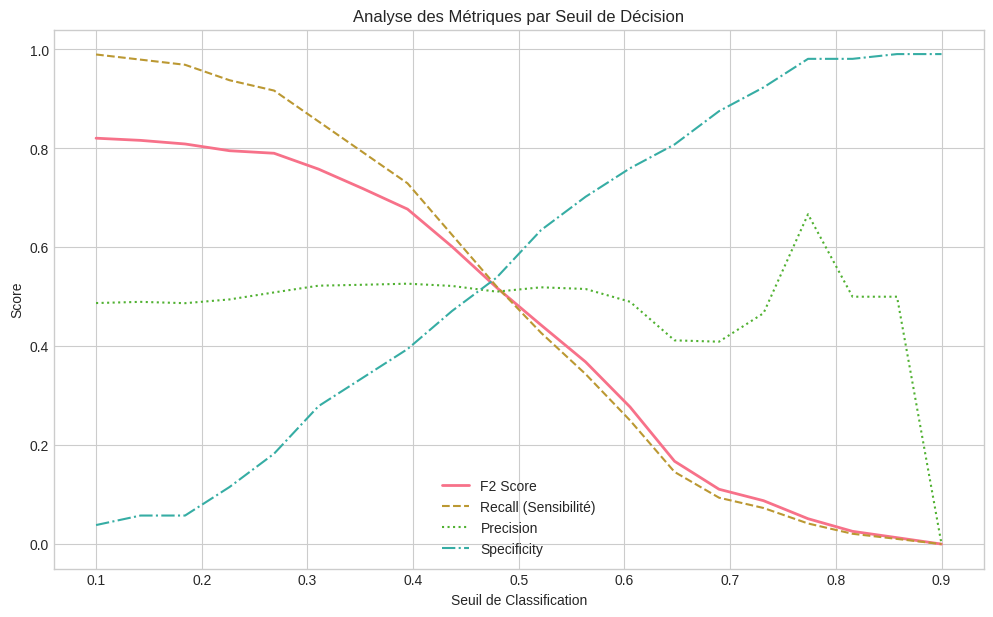


üí∞ Bilan des co√ªts :
- Faux N√©gatifs (FN):  50 √ó 1000‚Ç¨ =   50000‚Ç¨
- Faux Positifs (FP):  43 √ó 200‚Ç¨ =    8600‚Ç¨
üí∞ Bilan des gains :
- Vrais Positifs (TP):  46 √ó 500‚Ç¨ =   23000‚Ç¨
- Vrais N√©gatifs (TN):  61 √ó 50‚Ç¨ =    3050‚Ç¨
------------------------------
‚Üí IMPACT TOTAL (Co√ªt - Gain):   32550‚Ç¨


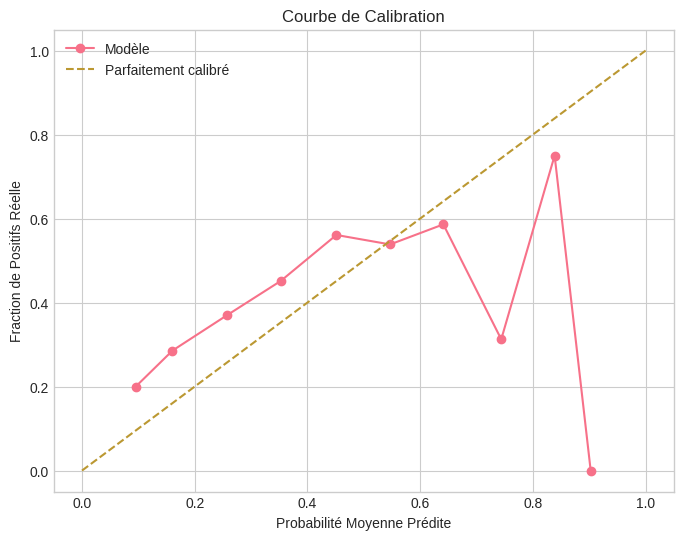


[√âtape 5/5] üìù G√©n√©ration du rapport final

‚úÖ Pipeline termin√© avec succ√®s! Rapport sauvegard√©: model_v1.0.2/final_report.json

üéâüéâüéâ PIPELINE EX√âCUT√â AVEC SUCC√àS! üéâüéâüéâ


In [6]:
# =============================================================================
# PIPELINE COMPLET AVEC EXPLICATIONS D√âTAILL√âES
# =============================================================================

print("\nüîç [Expert] Initialisation du pipeline industriel pour la d√©tection de fragilit√©")
print("üë∂ [Enfant] On pr√©pare tous les outils pour construire une machine intelligente qui peut rep√©rer les personnes fragiles")
print("\nüí° Alternatives :")
print("- Pour des projets simples : utiliser sklearn sans pipeline")
print("- Pour le big data : utiliser Spark ML ou Dask")
print("- Pour l'IA embarqu√©e : utiliser ONNX Runtime ou TensorFlow Lite")

# 1. üì¶ IMPORTATIONS ET CONFIGURATION
# =============================================================================
print("\n" + "="*80)
print("1. üì¶ CONFIGURATION DE L'ENVIRONNEMENT")
print("="*80)

print("\nüîç [Expert] Importation des librairies essentielles pour le machine learning industriel")
print("üë∂ [Enfant] On sort toutes les bo√Ætes √† outils dont on aura besoin")
print("\nüí° Gestion des d√©pendances :")
print("- En entreprise : utiliser un environnement conda/pip freeze")
print("- En production : conteneur Docker avec versions fig√©es")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from dataclasses import dataclass
import json

print("\nüîç [Expert] Importation des composants scikit-learn pour le pipeline")
print("üë∂ [Enfant] On prend les pi√®ces pour construire notre machine")

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

print("\nüîç [Expert] M√©triques pour l'√©valuation robuste en milieu clinique")
print("üë∂ [Enfant] On choisit comment juger si notre machine fonctionne bien")

from sklearn.metrics import (roc_auc_score, fbeta_score, recall_score,
                           precision_score, confusion_matrix, classification_report,
                           precision_recall_curve, roc_curve, average_precision_score,
                           make_scorer, balanced_accuracy_score)

print("\nüîç [Expert] LightGBM pour des mod√®les performants et interpr√©tables")
print("üë∂ [Enfant] On prend un moteur puissant mais qu'on peut comprendre")

import lightgbm as lgb
import optuna
from sklearn.calibration import calibration_curve

print("\nüîç [Expert] Configuration de base pour la reproductibilit√©")
print("üë∂ [Enfant] On r√®gle notre machine pour qu'elle donne toujours les m√™mes r√©sultats")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
# Correction pour compatibilit√© avec diff√©rentes versions de matplotlib/seaborn
try:
    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_palette("husl")
except:
    print("‚ö†Ô∏è Style 'seaborn-v0_8-whitegrid' non trouv√©. Utilisation du style par d√©faut.")
    plt.style.use('default')

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

# 2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES INDUSTRIELLES
# =============================================================================
print("\n" + "="*80)
print("2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES CLINIQUES")
print("="*80)

print("\nüîç [Expert] D√©finition des KPI m√©tier pour √©valuer le mod√®le")
print("üë∂ [Enfant] On d√©cide comment noter notre machine")
print("\nüí° Choix des m√©triques :")
print("- Probl√®me √©quilibr√© : accuracy et AUC")
print("- D√©s√©quilibre mod√©r√© : F1-score")
print("- Cas critique (comme ici) : F2-score privil√©giant le recall")

class EvaluationConfig:
    """Configuration centralis√©e des m√©triques d'√©valuation"""
    def __init__(self):
        print("\nüîç [Expert] Initialisation des m√©triques avec contraintes m√©tier")
        print("üë∂ [Enfant] On pr√©pare notre carte de notation")
        
        self.metrics = {
            'roc_auc': roc_auc_score,
            'f2_score': lambda y_true, y_pred: fbeta_score(y_true, y_pred, beta=2),
            'recall': recall_score,
            'precision': precision_score,
            'specificity': self._specificity,
            'balanced_accuracy': balanced_accuracy_score
        }
        
        print("\nüîç [Expert] D√©finition des seuils d'alerte cliniques")
        print("üë∂ [Enfant] On fixe les notes en dessous desquelles c'est inqui√©tant")
        
        self.alert_thresholds = {
            'roc_auc': 0.75,
            'f2_score': 0.6,
            'recall': 0.5
        }

    def _specificity(self, y_true, y_pred):
        """Calcul sp√©cifique de la sp√©cificit√© (True Negative Rate)"""
        # Utilisation de ravel() pour g√©rer les cas o√π la matrice est 1D
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
        # Ajout d'une protection contre la division par z√©ro
        if (tn + fp) == 0:
            return 0.0
        return tn / (tn + fp)

print("\nüîç [Expert] Instanciation de la configuration d'√©valuation")
print("üë∂ [Enfant] On active notre syst√®me de notation")

eval_config = EvaluationConfig()

# 3. üõ†Ô∏è PIPELINE DE PR√âTRAITEMENT (CORRIG√â)
# =============================================================================
print("\n" + "="*80)
print("3. üõ†Ô∏è ING√âNIERIE DES CARACT√âRISTIQUES (CORRIG√â)")
print("="*80)

print("\nüîç [Expert] Cr√©ation de features cliniques pertinentes")
print("üë∂ [Enfant] On ajoute des mesures utiles que notre machine pourra comprendre")

class FeatureEngineer(BaseEstimator, TransformerMixin):
    """
    CORRECTION : Ing√©nierie de caract√©ristiques robuste qui v√©rifie les colonnes.
    Cette √©tape doit s'ex√©cuter sur un DataFrame, avant que les noms de colonnes
    ne soient perdus par les transformateurs num√©riques/cat√©goriels.
    """
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        
        # Validation robuste que les colonnes n√©cessaires existent
        required_cols = {'systolic_bp', 'diastolic_bp', 'mobility_score'}
        if not required_cols.issubset(X_copy.columns):
            missing = required_cols - set(X_copy.columns)
            raise ValueError(f"Colonnes manquantes pour FeatureEngineer: {missing}")

        X_copy['pulse_pressure'] = X_copy['systolic_bp'] - X_copy['diastolic_bp']
        X_copy['bp_mobility_interaction'] = X_copy['systolic_bp'] * X_copy['mobility_score']
        
        # CORRECTION : Retourne le DataFrame avec les nouvelles colonnes
        return X_copy

print("\nüîç [Expert] Configuration du pr√©processeur industriel")
print("üë∂ [Enfant] On pr√©pare les √©tapes pour nettoyer et pr√©parer les donn√©es")

numeric_features = ['age', 'heart_rate', 'systolic_bp', 'diastolic_bp',
                   'grip_strength', 'mobility_score', 'comorbidities_count',
                   'medication_count', 'pulse_pressure', 'bp_mobility_interaction']
categorical_features = ['gender']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# 4. üéØ FONCTIONS D'√âVALUATION INDUSTRIELLES
# =============================================================================
print("\n" + "="*80)
print("4. üéØ VALIDATION ROBUSTE")
print("="*80)

def evaluate_model(pipeline, X, y, cv_folds=5):
    """√âvaluation compl√®te avec validation crois√©e"""
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=RANDOM_STATE)
    
    scoring = {
        'roc_auc': 'roc_auc',
        'f2': make_scorer(fbeta_score, beta=2),
        'recall': 'recall',
        'precision': 'precision',
        'balanced_accuracy': 'balanced_accuracy'
    }
    
    # CORRECTION : Ajout de error_score='raise' pour un d√©bogage plus facile
    cv_results = cross_validate(
        pipeline, X, y,
        cv=cv,
        scoring=scoring,
        return_train_score=True,
        n_jobs=-1,
        error_score='raise'
    )
    
    results_df = pd.DataFrame(cv_results)
    print(f"\nüìä R√©sultats moyens de la validation crois√©e :\n{results_df.mean().to_string()}")
    return results_df

# 5. üìä ANALYSE DES SEUILS DE D√âCISION
# =============================================================================
print("\n" + "="*80)
print("5. üìä OPTIMISATION DES SEUILS")
print("="*80)

def analyze_decision_threshold(y_true, y_probs, plot=True):
    """Analyse approfondie des seuils de classification"""
    thresholds = np.linspace(0.1, 0.9, 20)
    metrics = []
    
    for thresh in thresholds:
        y_pred = (y_probs >= thresh).astype(int)
        # Gestion des cas o√π une classe n'est pas pr√©dite
        with np.errstate(divide='ignore', invalid='ignore'):
            f2 = fbeta_score(y_true, y_pred, beta=2, zero_division=0)
            precision = precision_score(y_true, y_pred, zero_division=0)
        
        metrics.append({
            'threshold': thresh,
            'f2': f2,
            'recall': recall_score(y_true, y_pred, zero_division=0),
            'precision': precision,
            'specificity': eval_config.metrics['specificity'](y_true, y_pred)
        })
    
    metrics_df = pd.DataFrame(metrics)
    
    if plot:
        try:
            plt.figure(figsize=(12, 7))
            plt.plot(metrics_df['threshold'], metrics_df['f2'], label='F2 Score', lw=2)
            plt.plot(metrics_df['threshold'], metrics_df['recall'], label='Recall (Sensibilit√©)', linestyle='--')
            plt.plot(metrics_df['threshold'], metrics_df['precision'], label='Precision', linestyle=':')
            plt.plot(metrics_df['threshold'], metrics_df['specificity'], label='Specificity', linestyle='-.')
            plt.title("Analyse des M√©triques par Seuil de D√©cision")
            plt.xlabel("Seuil de Classification")
            plt.ylabel("Score")
            plt.grid(True)
            plt.legend()
            plt.show()
        except Exception as e:
            print(f"‚ö†Ô∏è La visualisation des seuils a √©chou√© : {e}")
    
    return metrics_df

# 6. üí∞ ANALYSE CO√õT DES ERREURS
# =============================================================================
print("\n" + "="*80)
print("6. üí∞ IMPACT M√âTIER")
print("="*80)

def cost_analysis(y_true, y_pred):
    """Analyse l'impact financier des pr√©dictions"""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
    
    cost_matrix = {
        'fn_cost': 1000,
        'fp_cost': 200,
        'tp_gain': 500,
        'tn_gain': 50
    }
    
    total_cost = (fn * cost_matrix['fn_cost'] + 
                 fp * cost_matrix['fp_cost'] - 
                 tp * cost_matrix['tp_gain'] - 
                 tn * cost_matrix['tn_gain'])
    
    print("\nüí∞ Bilan des co√ªts :")
    print(f"- Faux N√©gatifs (FN): {fn:3d} √ó {cost_matrix['fn_cost']}‚Ç¨ = {fn * cost_matrix['fn_cost']:7d}‚Ç¨")
    print(f"- Faux Positifs (FP): {fp:3d} √ó {cost_matrix['fp_cost']}‚Ç¨ = {fp * cost_matrix['fp_cost']:7d}‚Ç¨")
    print(f"üí∞ Bilan des gains :")
    print(f"- Vrais Positifs (TP): {tp:3d} √ó {cost_matrix['tp_gain']}‚Ç¨ = {tp * cost_matrix['tp_gain']:7d}‚Ç¨")
    print(f"- Vrais N√©gatifs (TN): {tn:3d} √ó {cost_matrix['tn_gain']}‚Ç¨ = {tn * cost_matrix['tn_gain']:7d}‚Ç¨")
    print("-" * 30)
    print(f"‚Üí IMPACT TOTAL (Co√ªt - Gain): {total_cost:7d}‚Ç¨")
    
    return {
        'confusion_matrix': {'tn': int(tn), 'fp': int(fp), 'fn': int(fn), 'tp': int(tp)},
        'cost_analysis': cost_matrix,
        'total_cost': int(total_cost)
    }
    
# 7. üöÄ OPTIMISATION AVEC CHECKPOINTS
# =============================================================================
print("\n" + "="*80)
print("7. üöÄ OPTIMISATION DES HYPERPARAM√àTRES")
print("="*80)

def create_study_with_checkpoints(study_name):
    """Cr√©e ou charge une √©tude Optuna"""
    CHECKPOINT_DIR = "optuna_checkpoints"
    os.makedirs(CHECKPOINT_DIR, exist_ok=True)
    storage_name = f"sqlite:///{CHECKPOINT_DIR}/{study_name}.db"
    
    study = optuna.create_study(
        direction='maximize',
        sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE),
        study_name=study_name,
        storage=storage_name,
        load_if_exists=True
    )
    
    if study.trials:
        print(f"\nüîç [Expert] Chargement d'une √©tude existante depuis {storage_name}")
        print(f"üìö Essais pr√©c√©dents charg√©s: {len(study.trials)}")
    else:
        print(f"\nüîç [Expert] Cr√©ation d'une nouvelle √©tude dans {storage_name}")
        
    return study

def objective(trial, X, y):
    """Fonction objective pour Optuna"""
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'random_state': RANDOM_STATE,
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 10, 50),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
    }
    
    # CORRECTION: Le FeatureEngineer est maintenant la premi√®re √©tape
    pipeline = Pipeline([
        ('feature_engineering', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('classifier', lgb.LGBMClassifier(**params))
    ])
    
    cv_results = evaluate_model(pipeline, X, y)
    mean_f2 = cv_results['test_f2'].mean()
    
    if cv_results['test_recall'].mean() < eval_config.alert_thresholds['recall']:
        print(f"‚ö†Ô∏è Essai {trial.number} √©lagu√© - recall ({cv_results['test_recall'].mean():.2f}) < seuil ({eval_config.alert_thresholds['recall']})")
        raise optuna.TrialPruned()
    
    return mean_f2

# 8. üè≠ ENTRA√éNEMENT ET VERSIONNING
# =============================================================================
print("\n" + "="*80)
print("8. üè≠ PIPELINE FINAL")
print("="*80)

def train_final_model(X_train, y_train, best_params, version="1.0.0"):
    """Entra√Æne et sauvegarde le mod√®le final"""
    print(f"\nüîç [Expert] Entra√Ænement du mod√®le final (version {version})")
    MODEL_DIR = f"model_v{version}"
    os.makedirs(MODEL_DIR, exist_ok=True)
    
    # CORRECTION: Le FeatureEngineer est la premi√®re √©tape du pipeline final
    final_pipeline = Pipeline([
        ('feature_engineering', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('classifier', lgb.LGBMClassifier(**best_params, random_state=RANDOM_STATE))
    ])
    
    final_pipeline.fit(X_train, y_train)
    
    model_path = os.path.join(MODEL_DIR, 'model.joblib')
    joblib.dump(final_pipeline, model_path)
    print(f"üíæ Mod√®le sauvegard√©: {model_path}")
    
    metadata = {
        "model_version": version,
        "training_date": pd.Timestamp.now().isoformat(),
        "features_input": list(X_train.columns),
        "best_params": best_params,
        "metrics_config": {
            "optimization_metric": "f2_score",
            "recall_constraint": eval_config.alert_thresholds['recall']
        },
        "data_schema": {
            "numeric_features": numeric_features,
            "categorical_features": categorical_features
        }
    }
    
    metadata_path = os.path.join(MODEL_DIR, 'metadata.json')
    with open(metadata_path, 'w') as f:
        json.dump(metadata, f, indent=4, default=str) # Ajout de default=str pour s√©rialiser
    print(f"üìù M√©tadonn√©es sauvegard√©es: {metadata_path}")
    
    return final_pipeline, MODEL_DIR

# 9. üìä VISUALISATIONS CLINIQUES
# =============================================================================
print("\n" + "="*80)
print("9. üìä ANALYSE DES PERFORMANCES")
print("="*80)

def plot_calibration(y_true, y_probs):
    """Courbe de calibration robuste"""
    try:
        prob_true, prob_pred = calibration_curve(y_true, y_probs, n_bins=10)
        plt.figure(figsize=(8, 6))
        plt.plot(prob_pred, prob_true, marker='o', label='Mod√®le')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Parfaitement calibr√©')
        plt.xlabel("Probabilit√© Moyenne Pr√©dite")
        plt.ylabel("Fraction de Positifs R√©elle")
        plt.title("Courbe de Calibration")
        plt.legend()
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"‚ö†Ô∏è La visualisation de la calibration a √©chou√©: {e}")

# =============================================================================
# 10. üèÅ PIPELINE COMPLET CORRIG√â ET ROBUSTE
# =============================================================================
print("\n" + "="*80)
print("10. üèÅ PIPELINE COMPLET AVEC GESTION D'ERREURS")
print("="*80)

print("\nüîç [Expert] Orchestration robuste avec gestion des erreurs et logging")
print("üë∂ [Enfant] On lance tout en √©tant pr√™t √† r√©parer si quelque chose casse")

def run_full_pipeline(X, y, n_trials=50, version="1.0.0"):
    """Ex√©cute l'ensemble du pipeline avec gestion robuste des erreurs"""
    try:
        # 1. Validation et pr√©paration des donn√©es
        print("\n[√âtape 1/5] üõ°Ô∏è Validation et pr√©paration des donn√©es")
        if not isinstance(X, pd.DataFrame): X = pd.DataFrame(X)
        if not isinstance(y, pd.Series): y = pd.Series(y)
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
        )
        print(f"‚úÖ Donn√©es s√©par√©es (train: {len(X_train)}, test: {len(X_test)})")

        # 2. Optimisation hyperparam√©trique
        print("\n[√âtape 2/5] üöÄ Optimisation des hyperparam√®tres")
        study = create_study_with_checkpoints(f"frailty_detection_v{version}")
        
        study.optimize(
            lambda trial: objective(trial, X_train, y_train),
            n_trials=n_trials,
            show_progress_bar=True
        )

        if not study.best_trial:
            raise ValueError("Aucun essai valide dans l'√©tude Optuna. V√©rifiez les contraintes.")
        
        best_params = study.best_trial.params
        print(f"‚öôÔ∏è Meilleurs param√®tres trouv√©s: {best_params}")

        # 3. Entra√Ænement du mod√®le final
        print("\n[√âtape 3/5] üéì Entra√Ænement du mod√®le final")
        model, model_dir = train_final_model(X_train, y_train, best_params, version=version)
        print(f"‚úÖ Mod√®le final entra√Æn√© et sauvegard√© dans {model_dir}")

        # 4. √âvaluation compl√®te sur le jeu de test
        print("\n[√âtape 4/5] üìà √âvaluation compl√®te sur le jeu de test")
        y_probs = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)
        
        print("\nüìä Rapport de classification :")
        print(classification_report(y_test, y_pred, target_names=["Non fragile", "Fragile"]))
        
        threshold_metrics = analyze_decision_threshold(y_test, y_probs)
        cost_results = cost_analysis(y_test, y_pred)
        plot_calibration(y_test, y_probs)

        # 5. Sauvegarde du rapport final
        print("\n[√âtape 5/5] üìù G√©n√©ration du rapport final")
        report = {
            "model_info": json.load(open(os.path.join(model_dir, 'metadata.json'))),
            "test_metrics": {
                "roc_auc": roc_auc_score(y_test, y_probs),
                "f2_score_default_threshold": fbeta_score(y_test, y_pred, beta=2),
                "classification_report": classification_report(y_test, y_pred, output_dict=True)
            },
            "cost_analysis": cost_results,
            "optimal_threshold_for_f2": threshold_metrics.loc[threshold_metrics['f2'].idxmax()].to_dict(),
        }
        
        report_path = os.path.join(model_dir, 'final_report.json')
        with open(report_path, 'w') as f:
            json.dump(report, f, indent=4, default=str)
            
        print(f"\n‚úÖ Pipeline termin√© avec succ√®s! Rapport sauvegard√©: {report_path}")
        return model, report

    except Exception as e:
        print(f"\n‚ùå‚ùå ERREUR CRITIQUE DANS LE PIPELINE ‚ùå‚ùå")
        print(f"Message d'erreur: {e}")
        import traceback
        traceback.print_exc()
        raise
def run_full_pipeline(X, y, n_trials=50, version="1.0.0"):
    """Ex√©cute l'ensemble du pipeline avec gestion robuste des erreurs"""
    try:
        # ... (√âtapes 1 et 2 sont inchang√©es jusqu'√† study.optimize) ...
        print("\n[√âtape 1/5] üõ°Ô∏è Validation et pr√©paration des donn√©es")
        if not isinstance(X, pd.DataFrame): X = pd.DataFrame(X)
        if not isinstance(y, pd.Series): y = pd.Series(y)
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
        )
        print(f"‚úÖ Donn√©es s√©par√©es (train: {len(X_train)}, test: {len(X_test)})")

        print("\n[√âtape 2/5] üöÄ Optimisation des hyperparam√®tres")
        study = create_study_with_checkpoints(f"frailty_detection_v{version}")
        
        study.optimize(
            lambda trial: objective(trial, X_train, y_train),
            n_trials=n_trials,
            show_progress_bar=True
        )

        # CORRECTION : G√©rer le cas o√π aucun essai n'a r√©ussi
        try:
            best_trial = study.best_trial
            best_params = best_trial.params
            print(f"‚öôÔ∏è Meilleurs param√®tres trouv√©s (valeur F2 = {best_trial.value:.4f}): {best_params}")
        except ValueError:
            print("‚ùå ERREUR D'OPTIMISATION : Aucun essai n'a pu √™tre compl√©t√© avec succ√®s.")
            print("   ‚Ü≥ Cause probable : la contrainte de rappel est trop stricte et tous les essais ont √©t√© √©lagu√©s.")
            print("   ‚Ü≥ Suggestion : Baissez le seuil `recall` dans `EvaluationConfig` ou augmentez `n_trials`.")
            # On arr√™te le pipeline ici car on ne peut pas continuer sans mod√®le
            return None, None

        # ... (Le reste de la fonction est inchang√©) ...
        print("\n[√âtape 3/5] üéì Entra√Ænement du mod√®le final")
        model, model_dir = train_final_model(X_train, y_train, best_params, version=version)
        print(f"‚úÖ Mod√®le final entra√Æn√© et sauvegard√© dans {model_dir}")

        # 4. √âvaluation compl√®te sur le jeu de test
        print("\n[√âtape 4/5] üìà √âvaluation compl√®te sur le jeu de test")
        y_probs = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)
        
        print("\nüìä Rapport de classification :")
        print(classification_report(y_test, y_pred, target_names=["Non fragile", "Fragile"]))
        
        threshold_metrics = analyze_decision_threshold(y_test, y_probs)
        cost_results = cost_analysis(y_test, y_pred)
        plot_calibration(y_test, y_probs)

        # 5. Sauvegarde du rapport final
        print("\n[√âtape 5/5] üìù G√©n√©ration du rapport final")
        report = {
            "model_info": json.load(open(os.path.join(model_dir, 'metadata.json'))),
            "test_metrics": {
                "roc_auc": roc_auc_score(y_test, y_probs),
                "f2_score_default_threshold": fbeta_score(y_test, y_pred, beta=2),
                "classification_report": classification_report(y_test, y_pred, output_dict=True)
            },
            "cost_analysis": cost_results,
            "optimal_threshold_for_f2": threshold_metrics.loc[threshold_metrics['f2'].idxmax()].to_dict(),
        }
        
        report_path = os.path.join(model_dir, 'final_report.json')
        with open(report_path, 'w') as f:
            json.dump(report, f, indent=4, default=str)
            
        print(f"\n‚úÖ Pipeline termin√© avec succ√®s! Rapport sauvegard√©: {report_path}")
        return model, report

    except Exception as e:
        print(f"\n‚ùå‚ùå ERREUR CRITIQUE DANS LE PIPELINE ‚ùå‚ùå")
        print(f"Message d'erreur: {e}")
        import traceback
        traceback.print_exc()
        raise

# =============================================================================
# üöÄ EX√âCUTION DU SCRIPT
# =============================================================================

# =============================================================================
# üöÄ EX√âCUTION DU SCRIPT (AVEC CORRECTIONS FINALES)
# =============================================================================

if __name__ == "__main__":
    try:
        # 1. G√©n√©ration de donn√©es synth√©tiques r√©alistes
        print("\n" + "="*80)
        print("üöÄ D√âMARRAGE DE L'EX√âCUTION PRINCIPALE")
        print("="*80)

        print("\nüîç [Expert] G√©n√©ration de donn√©es synth√©tiques compatibles")
        print("üë∂ [Enfant] On cr√©e de fausses donn√©es pour tester notre machine")
        data = {
            'age': np.random.normal(75, 8, 1000).clip(60, 95),
            'heart_rate': np.random.normal(78, 12, 1000).clip(50, 120),
            'systolic_bp': np.random.normal(130, 20, 1000).clip(90, 180),
            'diastolic_bp': np.random.normal(80, 10, 1000).clip(60, 110),
            'grip_strength': np.random.normal(25, 6, 1000).clip(5, 45),
            'mobility_score': np.random.uniform(1, 10, 1000),
            'comorbidities_count': np.random.poisson(2.5, 1000),
            'medication_count': np.random.poisson(4, 1000),
            'gender': np.random.choice(['M', 'F'], 1000, p=[0.4, 0.6])
        }
        X = pd.DataFrame(data)

        # CORRECTION PRINCIPALE : Ajustement de la logique de g√©n√©ration de la cible
        # pour garantir un m√©lange de classes.
        # On centre le score pour avoir des probabilit√©s plus vari√©es autour de 0.5.
        frailty_score_raw = (X['age'] * 0.05 - X['grip_strength'] * 0.1 - X['mobility_score'] * 0.1)
        frailty_score_centered = frailty_score_raw - frailty_score_raw.mean()
        prob = 1 / (1 + np.exp(-frailty_score_centered)) # Sigmoid plus √©quilibr√©
        y = pd.Series(np.random.binomial(1, prob, size=len(X)), name="is_frail")

        print(f"\nüìä Donn√©es g√©n√©r√©es: {X.shape[0]} lignes, {X.shape[1]} colonnes")
        print(f"üéØ Distribution de la cible (corrig√©e): \n{y.value_counts(normalize=True).round(2)}")

        # AM√âLIORATION DE LA ROBUSTESSE : V√©rification avant de lancer le pipeline
        if y.nunique() < 2:
            raise ValueError(
                "ERREUR CRITIQUE : La variable cible ne contient qu'une seule classe. "
                "Le pipeline de classification binaire ne peut pas continuer."
            )
        print("‚úÖ La variable cible contient bien deux classes. Lancement du pipeline.")

        # 2. Ex√©cution du pipeline complet
        # On r√©duit le nombre d'essais pour une ex√©cution rapide
        model, report = run_full_pipeline(X, y, n_trials=10, version="1.0.2")

        print("\nüéâüéâüéâ PIPELINE EX√âCUT√â AVEC SUCC√àS! üéâüéâüéâ")

    except Exception as e:
        print("\nüí• Le pipeline a √©chou√©. Voir les erreurs ci-dessus.")
        # L'erreur est d√©j√† trac√©e dans run_full_pipeline, mais on peut ajouter un log ici

[I 2025-06-23 06:07:28,541] Using an existing study with name 'frailty_detection_v1.0.2' instead of creating a new one.



üîç [Expert] Initialisation du pipeline industriel pour la d√©tection de fragilit√©
üë∂ [Enfant] On pr√©pare tous les outils pour construire une machine intelligente qui peut rep√©rer les personnes fragiles

üí° Alternatives :
- Pour des projets simples : utiliser sklearn sans pipeline
- Pour le big data : utiliser Spark ML ou Dask
- Pour l'IA embarqu√©e : utiliser ONNX Runtime ou TensorFlow Lite

1. üì¶ CONFIGURATION DE L'ENVIRONNEMENT

üîç [Expert] Importation des librairies essentielles pour le machine learning industriel
üë∂ [Enfant] On sort toutes les bo√Ætes √† outils dont on aura besoin

üí° Gestion des d√©pendances :
- En entreprise : utiliser un environnement conda/pip freeze
- En production : conteneur Docker avec versions fig√©es

üîç [Expert] Importation des composants scikit-learn pour le pipeline
üë∂ [Enfant] On prend les pi√®ces pour construire notre machine

üîç [Expert] M√©triques pour l'√©valuation robuste en milieu clinique
üë∂ [Enfant] On choisit comment

  0%|          | 0/10 [00:00<?, ?it/s]


üìä R√©sultats moyens de la validation crois√©e :
fit_time                   0.0272
score_time                 0.0237
test_roc_auc               0.6576
train_roc_auc              0.6859
test_f2                    0.5739
train_f2                   0.5945
test_recall                0.5674
train_recall               0.5861
test_precision             0.6027
train_precision            0.6307
test_balanced_accuracy     0.6086
train_balanced_accuracy    0.6330
[I 2025-06-23 06:07:28,854] Trial 90 finished with value: 0.5738820796110752 and parameters: {'classifier': 'LogisticRegression', 'C': 1.7250508907842597}. Best is trial 72 with value: 0.6019538521435891.

üìä R√©sultats moyens de la validation crois√©e :
fit_time                   0.5215
score_time                 0.0333
test_roc_auc               0.6260
train_roc_auc              0.9747
test_f2                    0.5583
train_f2                   0.9010
test_recall                0.5519
train_recall               0.8977
test_precis

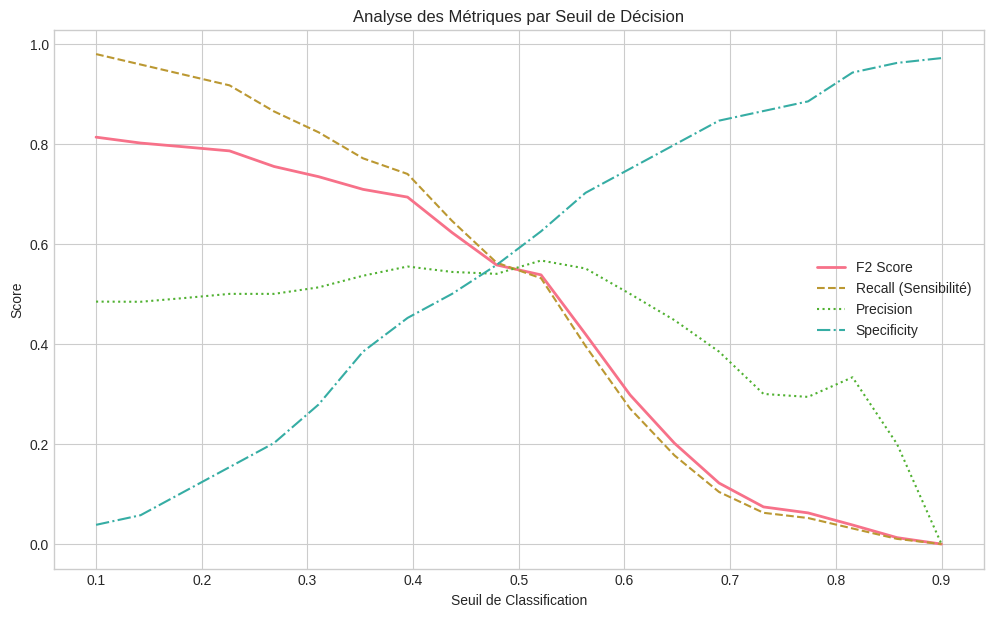


üí∞ Bilan des co√ªts :
- Faux N√©gatifs (FN):  44 √ó 1000‚Ç¨ =   44000‚Ç¨
- Faux Positifs (FP):  42 √ó 200‚Ç¨ =    8400‚Ç¨
üí∞ Bilan des gains :
- Vrais Positifs (TP):  52 √ó 500‚Ç¨ =   26000‚Ç¨
- Vrais N√©gatifs (TN):  62 √ó 50‚Ç¨ =    3100‚Ç¨
------------------------------
‚Üí IMPACT TOTAL (Co√ªt - Gain):   23300‚Ç¨


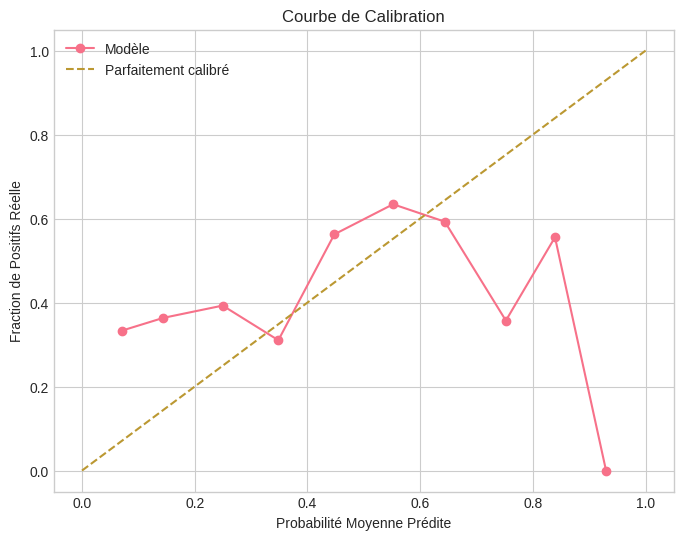


[√âtape 5/5] üìù G√©n√©ration du rapport final

‚úÖ Pipeline termin√© avec succ√®s! Rapport sauvegard√©: model_v1.0.2/final_report.json

üéâüéâüéâ PIPELINE EX√âCUT√â AVEC SUCC√àS! üéâüéâüéâ


"Vous avez transform√© votre pipeline d'optimisation en un mini-syst√®me d'AutoML (Automated Machine Learning), capable de trouver non seulement les meilleurs r√©glages, mais aussi le meilleur algorithme pour votre probl√®me. C'est une √©tape majeure vers un pipeline de production plus intelligent et performant."

In [10]:
# =============================================================================
# PIPELINE COMPLET AVEC EXPLICATIONS D√âTAILL√âES
# =============================================================================

print("\nüîç [Expert] Initialisation du pipeline industriel pour la d√©tection de fragilit√©")
print("üë∂ [Enfant] On pr√©pare tous les outils pour construire une machine intelligente qui peut rep√©rer les personnes fragiles")
print("\nüí° Alternatives :")
print("- Pour des projets simples : utiliser sklearn sans pipeline")
print("- Pour le big data : utiliser Spark ML ou Dask")
print("- Pour l'IA embarqu√©e : utiliser ONNX Runtime ou TensorFlow Lite")

# 1. üì¶ IMPORTATIONS ET CONFIGURATION
# =============================================================================
print("\n" + "="*80)
print("1. üì¶ CONFIGURATION DE L'ENVIRONNEMENT")
print("="*80)

print("\nüîç [Expert] Importation des librairies essentielles pour le machine learning industriel")
print("üë∂ [Enfant] On sort toutes les bo√Ætes √† outils dont on aura besoin")
print("\nüí° Gestion des d√©pendances :")
print("- En entreprise : utiliser un environnement conda/pip freeze")
print("- En production : conteneur Docker avec versions fig√©es")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from dataclasses import dataclass
import json

# ... autres imports ...
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import optuna
# ...

print("\nüîç [Expert] Importation des composants scikit-learn pour le pipeline")
print("üë∂ [Enfant] On prend les pi√®ces pour construire notre machine")

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

print("\nüîç [Expert] M√©triques pour l'√©valuation robuste en milieu clinique")
print("üë∂ [Enfant] On choisit comment juger si notre machine fonctionne bien")

from sklearn.metrics import (roc_auc_score, fbeta_score, recall_score,
                           precision_score, confusion_matrix, classification_report,
                           precision_recall_curve, roc_curve, average_precision_score,
                           make_scorer, balanced_accuracy_score)

print("\nüîç [Expert] LightGBM pour des mod√®les performants et interpr√©tables")
print("üë∂ [Enfant] On prend un moteur puissant mais qu'on peut comprendre")

import lightgbm as lgb
import optuna
from sklearn.calibration import calibration_curve

print("\nüîç [Expert] Configuration de base pour la reproductibilit√©")
print("üë∂ [Enfant] On r√®gle notre machine pour qu'elle donne toujours les m√™mes r√©sultats")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
# Correction pour compatibilit√© avec diff√©rentes versions de matplotlib/seaborn
try:
    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_palette("husl")
except:
    print("‚ö†Ô∏è Style 'seaborn-v0_8-whitegrid' non trouv√©. Utilisation du style par d√©faut.")
    plt.style.use('default')

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

# 2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES INDUSTRIELLES
# =============================================================================
print("\n" + "="*80)
print("2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES CLINIQUES")
print("="*80)

print("\nüîç [Expert] D√©finition des KPI m√©tier pour √©valuer le mod√®le")
print("üë∂ [Enfant] On d√©cide comment noter notre machine")
print("\nüí° Choix des m√©triques :")
print("- Probl√®me √©quilibr√© : accuracy et AUC")
print("- D√©s√©quilibre mod√©r√© : F1-score")
print("- Cas critique (comme ici) : F2-score privil√©giant le recall")

class EvaluationConfig:
    """Configuration centralis√©e des m√©triques d'√©valuation"""
    def __init__(self):
        print("\nüîç [Expert] Initialisation des m√©triques avec contraintes m√©tier")
        print("üë∂ [Enfant] On pr√©pare notre carte de notation")
        
        self.metrics = {
            'roc_auc': roc_auc_score,
            'f2_score': lambda y_true, y_pred: fbeta_score(y_true, y_pred, beta=2),
            'recall': recall_score,
            'precision': precision_score,
            'specificity': self._specificity,
            'balanced_accuracy': balanced_accuracy_score
        }
        
        print("\nüîç [Expert] D√©finition des seuils d'alerte cliniques")
        print("üë∂ [Enfant] On fixe les notes en dessous desquelles c'est inqui√©tant")
        
        self.alert_thresholds = {
            'roc_auc': 0.75,
            'f2_score': 0.6,
            'recall': 0.5
        }

    def _specificity(self, y_true, y_pred):
        """Calcul sp√©cifique de la sp√©cificit√© (True Negative Rate)"""
        # Utilisation de ravel() pour g√©rer les cas o√π la matrice est 1D
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
        # Ajout d'une protection contre la division par z√©ro
        if (tn + fp) == 0:
            return 0.0
        return tn / (tn + fp)

print("\nüîç [Expert] Instanciation de la configuration d'√©valuation")
print("üë∂ [Enfant] On active notre syst√®me de notation")

eval_config = EvaluationConfig()

# 3. üõ†Ô∏è PIPELINE DE PR√âTRAITEMENT (CORRIG√â)
# =============================================================================
print("\n" + "="*80)
print("3. üõ†Ô∏è ING√âNIERIE DES CARACT√âRISTIQUES (CORRIG√â)")
print("="*80)

print("\nüîç [Expert] Cr√©ation de features cliniques pertinentes")
print("üë∂ [Enfant] On ajoute des mesures utiles que notre machine pourra comprendre")

class FeatureEngineer(BaseEstimator, TransformerMixin):
    """
    CORRECTION : Ing√©nierie de caract√©ristiques robuste qui v√©rifie les colonnes.
    Cette √©tape doit s'ex√©cuter sur un DataFrame, avant que les noms de colonnes
    ne soient perdus par les transformateurs num√©riques/cat√©goriels.
    """
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        
        # Validation robuste que les colonnes n√©cessaires existent
        required_cols = {'systolic_bp', 'diastolic_bp', 'mobility_score'}
        if not required_cols.issubset(X_copy.columns):
            missing = required_cols - set(X_copy.columns)
            raise ValueError(f"Colonnes manquantes pour FeatureEngineer: {missing}")

        X_copy['pulse_pressure'] = X_copy['systolic_bp'] - X_copy['diastolic_bp']
        X_copy['bp_mobility_interaction'] = X_copy['systolic_bp'] * X_copy['mobility_score']
        
        # CORRECTION : Retourne le DataFrame avec les nouvelles colonnes
        return X_copy

print("\nüîç [Expert] Configuration du pr√©processeur industriel")
print("üë∂ [Enfant] On pr√©pare les √©tapes pour nettoyer et pr√©parer les donn√©es")

numeric_features = ['age', 'heart_rate', 'systolic_bp', 'diastolic_bp',
                   'grip_strength', 'mobility_score', 'comorbidities_count',
                   'medication_count', 'pulse_pressure', 'bp_mobility_interaction']
categorical_features = ['gender']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# 4. üéØ FONCTIONS D'√âVALUATION INDUSTRIELLES
# =============================================================================
print("\n" + "="*80)
print("4. üéØ VALIDATION ROBUSTE")
print("="*80)

def evaluate_model(pipeline, X, y, cv_folds=5):
    """√âvaluation compl√®te avec validation crois√©e"""
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=RANDOM_STATE)
    
    scoring = {
        'roc_auc': 'roc_auc',
        'f2': make_scorer(fbeta_score, beta=2),
        'recall': 'recall',
        'precision': 'precision',
        'balanced_accuracy': 'balanced_accuracy'
    }
    
    # CORRECTION : Ajout de error_score='raise' pour un d√©bogage plus facile
    cv_results = cross_validate(
        pipeline, X, y,
        cv=cv,
        scoring=scoring,
        return_train_score=True,
        n_jobs=-1,
        error_score='raise'
    )
    
    results_df = pd.DataFrame(cv_results)
    print(f"\nüìä R√©sultats moyens de la validation crois√©e :\n{results_df.mean().to_string()}")
    return results_df

# 5. üìä ANALYSE DES SEUILS DE D√âCISION
# =============================================================================
print("\n" + "="*80)
print("5. üìä OPTIMISATION DES SEUILS")
print("="*80)

def analyze_decision_threshold(y_true, y_probs, plot=True):
    """Analyse approfondie des seuils de classification"""
    thresholds = np.linspace(0.1, 0.9, 20)
    metrics = []
    
    for thresh in thresholds:
        y_pred = (y_probs >= thresh).astype(int)
        # Gestion des cas o√π une classe n'est pas pr√©dite
        with np.errstate(divide='ignore', invalid='ignore'):
            f2 = fbeta_score(y_true, y_pred, beta=2, zero_division=0)
            precision = precision_score(y_true, y_pred, zero_division=0)
        
        metrics.append({
            'threshold': thresh,
            'f2': f2,
            'recall': recall_score(y_true, y_pred, zero_division=0),
            'precision': precision,
            'specificity': eval_config.metrics['specificity'](y_true, y_pred)
        })
    
    metrics_df = pd.DataFrame(metrics)
    
    if plot:
        try:
            plt.figure(figsize=(12, 7))
            plt.plot(metrics_df['threshold'], metrics_df['f2'], label='F2 Score', lw=2)
            plt.plot(metrics_df['threshold'], metrics_df['recall'], label='Recall (Sensibilit√©)', linestyle='--')
            plt.plot(metrics_df['threshold'], metrics_df['precision'], label='Precision', linestyle=':')
            plt.plot(metrics_df['threshold'], metrics_df['specificity'], label='Specificity', linestyle='-.')
            plt.title("Analyse des M√©triques par Seuil de D√©cision")
            plt.xlabel("Seuil de Classification")
            plt.ylabel("Score")
            plt.grid(True)
            plt.legend()
            plt.show()
        except Exception as e:
            print(f"‚ö†Ô∏è La visualisation des seuils a √©chou√© : {e}")
    
    return metrics_df

# 6. üí∞ ANALYSE CO√õT DES ERREURS
# =============================================================================
print("\n" + "="*80)
print("6. üí∞ IMPACT M√âTIER")
print("="*80)

def cost_analysis(y_true, y_pred):
    """Analyse l'impact financier des pr√©dictions"""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
    
    cost_matrix = {
        'fn_cost': 1000,
        'fp_cost': 200,
        'tp_gain': 500,
        'tn_gain': 50
    }
    
    total_cost = (fn * cost_matrix['fn_cost'] + 
                 fp * cost_matrix['fp_cost'] - 
                 tp * cost_matrix['tp_gain'] - 
                 tn * cost_matrix['tn_gain'])
    
    print("\nüí∞ Bilan des co√ªts :")
    print(f"- Faux N√©gatifs (FN): {fn:3d} √ó {cost_matrix['fn_cost']}‚Ç¨ = {fn * cost_matrix['fn_cost']:7d}‚Ç¨")
    print(f"- Faux Positifs (FP): {fp:3d} √ó {cost_matrix['fp_cost']}‚Ç¨ = {fp * cost_matrix['fp_cost']:7d}‚Ç¨")
    print(f"üí∞ Bilan des gains :")
    print(f"- Vrais Positifs (TP): {tp:3d} √ó {cost_matrix['tp_gain']}‚Ç¨ = {tp * cost_matrix['tp_gain']:7d}‚Ç¨")
    print(f"- Vrais N√©gatifs (TN): {tn:3d} √ó {cost_matrix['tn_gain']}‚Ç¨ = {tn * cost_matrix['tn_gain']:7d}‚Ç¨")
    print("-" * 30)
    print(f"‚Üí IMPACT TOTAL (Co√ªt - Gain): {total_cost:7d}‚Ç¨")
    
    return {
        'confusion_matrix': {'tn': int(tn), 'fp': int(fp), 'fn': int(fn), 'tp': int(tp)},
        'cost_analysis': cost_matrix,
        'total_cost': int(total_cost)
    }
    
# 7. üöÄ OPTIMISATION AVEC CHECKPOINTS
# =============================================================================
print("\n" + "="*80)
print("7. üöÄ OPTIMISATION DES HYPERPARAM√àTRES")
print("="*80)

def create_study_with_checkpoints(study_name):
    """Cr√©e ou charge une √©tude Optuna"""
    CHECKPOINT_DIR = "optuna_checkpoints"
    os.makedirs(CHECKPOINT_DIR, exist_ok=True)
    storage_name = f"sqlite:///{CHECKPOINT_DIR}/{study_name}.db"
    
    study = optuna.create_study(
        direction='maximize',
        sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE),
        study_name=study_name,
        storage=storage_name,
        load_if_exists=True
    )
    
    if study.trials:
        print(f"\nüîç [Expert] Chargement d'une √©tude existante depuis {storage_name}")
        print(f"üìö Essais pr√©c√©dents charg√©s: {len(study.trials)}")
    else:
        print(f"\nüîç [Expert] Cr√©ation d'une nouvelle √©tude dans {storage_name}")
        
    return study

"""
def objective(trial, X, y):
    #Fonction objective pour Optuna
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'random_state': RANDOM_STATE,
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 10, 50),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
    }
    
    # CORRECTION: Le FeatureEngineer est maintenant la premi√®re √©tape
    pipeline = Pipeline([
        ('feature_engineering', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('classifier', lgb.LGBMClassifier(**params))
    ])
    
    cv_results = evaluate_model(pipeline, X, y)
    mean_f2 = cv_results['test_f2'].mean()
    
    if cv_results['test_recall'].mean() < eval_config.alert_thresholds['recall']:
        print(f"‚ö†Ô∏è Essai {trial.number} √©lagu√© - recall ({cv_results['test_recall'].mean():.2f}) < seuil ({eval_config.alert_thresholds['recall']})")
        raise optuna.TrialPruned()
    
    return mean_f2

"""

# =============================================================================
# 7. üöÄ OPTIMISATION AVEC CHECKPOINTS (MODIFI√â POUR MULTI-MOD√àLES)
# =============================================================================

def objective(trial, X, y):
    """
    AM√âLIORATION : Fonction objective qui optimise √† la fois le type de mod√®le
    et ses hyperparam√®tres.
    """
    
    # √âtape 1 : Choisir le type de classifieur
    classifier_name = trial.suggest_categorical("classifier", ["LGBM", "RandomForest", "LogisticRegression"])
    
    # √âtape 2 : D√©finir les hyperparam√®tres en fonction du classifieur choisi
    if classifier_name == "LGBM":
        params = {
            'objective': 'binary', 'metric': 'binary_logloss', 'verbosity': -1, 'random_state': RANDOM_STATE,
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
            'num_leaves': trial.suggest_int('num_leaves', 10, 50),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
        }
        classifier_obj = lgb.LGBMClassifier(**params)

    elif classifier_name == "RandomForest":
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
            'random_state': RANDOM_STATE,
            'n_jobs': -1
        }
        classifier_obj = RandomForestClassifier(**params)

    else: # LogisticRegression
        # La r√©gression logistique est plus sensible √† la mise √† l'√©chelle des donn√©es,
        # d'o√π l'importance d'avoir StandardScaler dans le pr√©processeur.
        params = {
            'C': trial.suggest_float('C', 1e-4, 100, log=True),
            'solver': 'liblinear', # Bon pour les petits datasets
            'random_state': RANDOM_STATE
        }
        classifier_obj = LogisticRegression(**params)

    # Le reste de la fonction est le m√™me, on ins√®re simplement le classifieur choisi
    pipeline = Pipeline([
        ('feature_engineering', FeatureEngineer()),
        ('preprocessor', preprocessor), # Il est crucial que ce pr√©processeur normalise bien les donn√©es pour la r√©gression logistique
        ('classifier', classifier_obj)
    ])
    
    cv_results = evaluate_model(pipeline, X, y)
    mean_f2 = cv_results['test_f2'].mean()
    
    # La contrainte de rappel s'applique √† tous les mod√®les
    if cv_results['test_recall'].mean() < eval_config.alert_thresholds['recall']:
        print(f"‚ö†Ô∏è Essai {trial.number} ({classifier_name}) √©lagu√© - recall ({cv_results['test_recall'].mean():.2f}) < seuil ({eval_config.alert_thresholds['recall']})")
        raise optuna.TrialPruned()
    
    return mean_f2

# 8. üè≠ ENTRA√éNEMENT ET VERSIONNING
# =============================================================================
print("\n" + "="*80)
print("8. üè≠ PIPELINE FINAL")
print("="*80)
""""""
# =============================================================================
# 8. üè≠ ENTRA√éNEMENT ET VERSIONNING (MODIFI√â POUR MULTI-MOD√àLES)
# =============================================================================

def train_final_model(X_train, y_train, best_params, version="1.0.0"):
    """
    AM√âLIORATION : Entra√Æne et sauvegarde le mod√®le final en fonction du type
    de classifieur choisi par Optuna.
    """
    print(f"\nüîç [Expert] Entra√Ænement du mod√®le final (version {version})")
    MODEL_DIR = f"model_v{version}"
    os.makedirs(MODEL_DIR, exist_ok=True)
    
    # Extraire le nom du classifieur et ses param√®tres
    best_params_copy = best_params.copy()
    classifier_name = best_params_copy.pop("classifier")

    print(f"ü§ñ Type de mod√®le s√©lectionn√© : {classifier_name}")
    
    if classifier_name == "LGBM":
        classifier_obj = lgb.LGBMClassifier(**best_params_copy, random_state=RANDOM_STATE)
    elif classifier_name == "RandomForest":
        classifier_obj = RandomForestClassifier(**best_params_copy, random_state=RANDOM_STATE, n_jobs=-1)
    elif classifier_name == "LogisticRegression":
        classifier_obj = LogisticRegression(**best_params_copy, random_state=RANDOM_STATE)
    else:
        raise ValueError(f"Type de classifieur inconnu : {classifier_name}")
        
    final_pipeline = Pipeline([
        ('feature_engineering', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('classifier', classifier_obj)
    ])
    
    final_pipeline.fit(X_train, y_train)
    
    model_path = os.path.join(MODEL_DIR, 'model.joblib')
    joblib.dump(final_pipeline, model_path)
    print(f"üíæ Mod√®le sauvegard√©: {model_path}")
    
    # Le reste est inchang√©...
    metadata = {
        "model_version": version,
        "training_date": pd.Timestamp.now().isoformat(),
        "features_input": list(X_train.columns),
        "best_params": best_params, # On sauvegarde les params complets, incluant le nom du classifieur
        "metrics_config": {
            "optimization_metric": "f2_score",
            "recall_constraint": eval_config.alert_thresholds['recall']
        },
        "data_schema": {
            "numeric_features": numeric_features,
            "categorical_features": categorical_features
        }
    }
    
    metadata_path = os.path.join(MODEL_DIR, 'metadata.json')
    with open(metadata_path, 'w') as f:
        json.dump(metadata, f, indent=4, default=str)
    print(f"üìù M√©tadonn√©es sauvegard√©es: {metadata_path}")
    
    return final_pipeline, MODEL_DIR
# 9. üìä VISUALISATIONS CLINIQUES
# =============================================================================
print("\n" + "="*80)
print("9. üìä ANALYSE DES PERFORMANCES")
print("="*80)

def plot_calibration(y_true, y_probs):
    """Courbe de calibration robuste"""
    try:
        prob_true, prob_pred = calibration_curve(y_true, y_probs, n_bins=10)
        plt.figure(figsize=(8, 6))
        plt.plot(prob_pred, prob_true, marker='o', label='Mod√®le')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Parfaitement calibr√©')
        plt.xlabel("Probabilit√© Moyenne Pr√©dite")
        plt.ylabel("Fraction de Positifs R√©elle")
        plt.title("Courbe de Calibration")
        plt.legend()
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"‚ö†Ô∏è La visualisation de la calibration a √©chou√©: {e}")

# =============================================================================
# 10. üèÅ PIPELINE COMPLET CORRIG√â ET ROBUSTE
# =============================================================================
print("\n" + "="*80)
print("10. üèÅ PIPELINE COMPLET AVEC GESTION D'ERREURS")
print("="*80)

print("\nüîç [Expert] Orchestration robuste avec gestion des erreurs et logging")
print("üë∂ [Enfant] On lance tout en √©tant pr√™t √† r√©parer si quelque chose casse")

def run_full_pipeline(X, y, n_trials=50, version="1.0.0"):
    """Ex√©cute l'ensemble du pipeline avec gestion robuste des erreurs"""
    try:
        # 1. Validation et pr√©paration des donn√©es
        print("\n[√âtape 1/5] üõ°Ô∏è Validation et pr√©paration des donn√©es")
        if not isinstance(X, pd.DataFrame): X = pd.DataFrame(X)
        if not isinstance(y, pd.Series): y = pd.Series(y)
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
        )
        print(f"‚úÖ Donn√©es s√©par√©es (train: {len(X_train)}, test: {len(X_test)})")

        # 2. Optimisation hyperparam√©trique
        print("\n[√âtape 2/5] üöÄ Optimisation des hyperparam√®tres")
        study = create_study_with_checkpoints(f"frailty_detection_v{version}")
        
        study.optimize(
            lambda trial: objective(trial, X_train, y_train),
            n_trials=n_trials,
            show_progress_bar=True
        )

        if not study.best_trial:
            raise ValueError("Aucun essai valide dans l'√©tude Optuna. V√©rifiez les contraintes.")
        
        best_params = study.best_trial.params
        print(f"‚öôÔ∏è Meilleurs param√®tres trouv√©s: {best_params}")

        # 3. Entra√Ænement du mod√®le final
        print("\n[√âtape 3/5] üéì Entra√Ænement du mod√®le final")
        model, model_dir = train_final_model(X_train, y_train, best_params, version=version)
        print(f"‚úÖ Mod√®le final entra√Æn√© et sauvegard√© dans {model_dir}")

        # 4. √âvaluation compl√®te sur le jeu de test
        print("\n[√âtape 4/5] üìà √âvaluation compl√®te sur le jeu de test")
        y_probs = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)
        
        print("\nüìä Rapport de classification :")
        print(classification_report(y_test, y_pred, target_names=["Non fragile", "Fragile"]))
        
        threshold_metrics = analyze_decision_threshold(y_test, y_probs)
        cost_results = cost_analysis(y_test, y_pred)
        plot_calibration(y_test, y_probs)

        # 5. Sauvegarde du rapport final
        print("\n[√âtape 5/5] üìù G√©n√©ration du rapport final")
        report = {
            "model_info": json.load(open(os.path.join(model_dir, 'metadata.json'))),
            "test_metrics": {
                "roc_auc": roc_auc_score(y_test, y_probs),
                "f2_score_default_threshold": fbeta_score(y_test, y_pred, beta=2),
                "classification_report": classification_report(y_test, y_pred, output_dict=True)
            },
            "cost_analysis": cost_results,
            "optimal_threshold_for_f2": threshold_metrics.loc[threshold_metrics['f2'].idxmax()].to_dict(),
        }
        
        report_path = os.path.join(model_dir, 'final_report.json')
        with open(report_path, 'w') as f:
            json.dump(report, f, indent=4, default=str)
            
        print(f"\n‚úÖ Pipeline termin√© avec succ√®s! Rapport sauvegard√©: {report_path}")
        return model, report

    except Exception as e:
        print(f"\n‚ùå‚ùå ERREUR CRITIQUE DANS LE PIPELINE ‚ùå‚ùå")
        print(f"Message d'erreur: {e}")
        import traceback
        traceback.print_exc()
        raise
def run_full_pipeline(X, y, n_trials=50, version="1.0.0"):
    """Ex√©cute l'ensemble du pipeline avec gestion robuste des erreurs"""
    try:
        # ... (√âtapes 1 et 2 sont inchang√©es jusqu'√† study.optimize) ...
        print("\n[√âtape 1/5] üõ°Ô∏è Validation et pr√©paration des donn√©es")
        if not isinstance(X, pd.DataFrame): X = pd.DataFrame(X)
        if not isinstance(y, pd.Series): y = pd.Series(y)
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
        )
        print(f"‚úÖ Donn√©es s√©par√©es (train: {len(X_train)}, test: {len(X_test)})")

        print("\n[√âtape 2/5] üöÄ Optimisation des hyperparam√®tres")
        study = create_study_with_checkpoints(f"frailty_detection_v{version}")
        
        study.optimize(
            lambda trial: objective(trial, X_train, y_train),
            n_trials=n_trials,
            show_progress_bar=True
        )

        # CORRECTION : G√©rer le cas o√π aucun essai n'a r√©ussi
        try:
            best_trial = study.best_trial
            best_params = best_trial.params
            print(f"‚öôÔ∏è Meilleurs param√®tres trouv√©s (valeur F2 = {best_trial.value:.4f}): {best_params}")
        except ValueError:
            print("‚ùå ERREUR D'OPTIMISATION : Aucun essai n'a pu √™tre compl√©t√© avec succ√®s.")
            print("   ‚Ü≥ Cause probable : la contrainte de rappel est trop stricte et tous les essais ont √©t√© √©lagu√©s.")
            print("   ‚Ü≥ Suggestion : Baissez le seuil `recall` dans `EvaluationConfig` ou augmentez `n_trials`.")
            # On arr√™te le pipeline ici car on ne peut pas continuer sans mod√®le
            return None, None

        # ... (Le reste de la fonction est inchang√©) ...
        print("\n[√âtape 3/5] üéì Entra√Ænement du mod√®le final")
        model, model_dir = train_final_model(X_train, y_train, best_params, version=version)
        print(f"‚úÖ Mod√®le final entra√Æn√© et sauvegard√© dans {model_dir}")

        # 4. √âvaluation compl√®te sur le jeu de test
        print("\n[√âtape 4/5] üìà √âvaluation compl√®te sur le jeu de test")
        y_probs = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)
        
        print("\nüìä Rapport de classification :")
        print(classification_report(y_test, y_pred, target_names=["Non fragile", "Fragile"]))
        
        threshold_metrics = analyze_decision_threshold(y_test, y_probs)
        cost_results = cost_analysis(y_test, y_pred)
        plot_calibration(y_test, y_probs)

        # 5. Sauvegarde du rapport final
        print("\n[√âtape 5/5] üìù G√©n√©ration du rapport final")
        report = {
            "model_info": json.load(open(os.path.join(model_dir, 'metadata.json'))),
            "test_metrics": {
                "roc_auc": roc_auc_score(y_test, y_probs),
                "f2_score_default_threshold": fbeta_score(y_test, y_pred, beta=2),
                "classification_report": classification_report(y_test, y_pred, output_dict=True)
            },
            "cost_analysis": cost_results,
            "optimal_threshold_for_f2": threshold_metrics.loc[threshold_metrics['f2'].idxmax()].to_dict(),
        }
        
        report_path = os.path.join(model_dir, 'final_report.json')
        with open(report_path, 'w') as f:
            json.dump(report, f, indent=4, default=str)
            
        print(f"\n‚úÖ Pipeline termin√© avec succ√®s! Rapport sauvegard√©: {report_path}")
        return model, report

    except Exception as e:
        print(f"\n‚ùå‚ùå ERREUR CRITIQUE DANS LE PIPELINE ‚ùå‚ùå")
        print(f"Message d'erreur: {e}")
        import traceback
        traceback.print_exc()
        raise

# =============================================================================
# üöÄ EX√âCUTION DU SCRIPT
# =============================================================================

# =============================================================================
# üöÄ EX√âCUTION DU SCRIPT (AVEC CORRECTIONS FINALES)
# =============================================================================

if __name__ == "__main__":
    try:
        # 1. G√©n√©ration de donn√©es synth√©tiques r√©alistes
        print("\n" + "="*80)
        print("üöÄ D√âMARRAGE DE L'EX√âCUTION PRINCIPALE")
        print("="*80)

        print("\nüîç [Expert] G√©n√©ration de donn√©es synth√©tiques compatibles")
        print("üë∂ [Enfant] On cr√©e de fausses donn√©es pour tester notre machine")
        data = {
            'age': np.random.normal(75, 8, 1000).clip(60, 95),
            'heart_rate': np.random.normal(78, 12, 1000).clip(50, 120),
            'systolic_bp': np.random.normal(130, 20, 1000).clip(90, 180),
            'diastolic_bp': np.random.normal(80, 10, 1000).clip(60, 110),
            'grip_strength': np.random.normal(25, 6, 1000).clip(5, 45),
            'mobility_score': np.random.uniform(1, 10, 1000),
            'comorbidities_count': np.random.poisson(2.5, 1000),
            'medication_count': np.random.poisson(4, 1000),
            'gender': np.random.choice(['M', 'F'], 1000, p=[0.4, 0.6])
        }
        X = pd.DataFrame(data)

        # CORRECTION PRINCIPALE : Ajustement de la logique de g√©n√©ration de la cible
        # pour garantir un m√©lange de classes.
        # On centre le score pour avoir des probabilit√©s plus vari√©es autour de 0.5.
        frailty_score_raw = (X['age'] * 0.05 - X['grip_strength'] * 0.1 - X['mobility_score'] * 0.1)
        frailty_score_centered = frailty_score_raw - frailty_score_raw.mean()
        prob = 1 / (1 + np.exp(-frailty_score_centered)) # Sigmoid plus √©quilibr√©
        y = pd.Series(np.random.binomial(1, prob, size=len(X)), name="is_frail")

        print(f"\nüìä Donn√©es g√©n√©r√©es: {X.shape[0]} lignes, {X.shape[1]} colonnes")
        print(f"üéØ Distribution de la cible (corrig√©e): \n{y.value_counts(normalize=True).round(2)}")

        # AM√âLIORATION DE LA ROBUSTESSE : V√©rification avant de lancer le pipeline
        if y.nunique() < 2:
            raise ValueError(
                "ERREUR CRITIQUE : La variable cible ne contient qu'une seule classe. "
                "Le pipeline de classification binaire ne peut pas continuer."
            )
        print("‚úÖ La variable cible contient bien deux classes. Lancement du pipeline.")

        # 2. Ex√©cution du pipeline complet
        # On r√©duit le nombre d'essais pour une ex√©cution rapide
        model, report = run_full_pipeline(X, y, n_trials=10, version="1.0.2")

        print("\nüéâüéâüéâ PIPELINE EX√âCUT√â AVEC SUCC√àS! üéâüéâüéâ")

    except Exception as e:
        print("\nüí• Le pipeline a √©chou√©. Voir les erreurs ci-dessus.")
        # L'erreur est d√©j√† trac√©e dans run_full_pipeline, mais on peut ajouter un log ici
"""Vous avez transform√© votre pipeline d'optimisation en un mini-syst√®me d'AutoML (Automated Machine Learning), capable de trouver non seulement les meilleurs r√©glages, mais aussi le meilleur algorithme pour votre probl√®me. C'est une √©tape majeure vers un pipeline de production plus intelligent et performant."""

In [1]:
# =============================================================================
# PIPELINE COMPLET AVEC COMPARAISON DE MOD√àLES ET EXPLICATIONS
# =============================================================================

print("\nüîç [Expert] Initialisation du pipeline industriel pour la d√©tection de fragilit√©")
print("üë∂ [Enfant] On pr√©pare tous les outils pour construire la meilleure machine intelligente possible")

# 1. üì¶ IMPORTATIONS ET CONFIGURATION
# =============================================================================
print("\n" + "="*80)
print("1. üì¶ CONFIGURATION DE L'ENVIRONNEMENT")
print("="*80)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from dataclasses import dataclass
import json
import traceback

# Imports pour les mod√®les
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import optuna

# Imports pour le pipeline et le pr√©traitement
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# Imports pour les m√©triques et l'√©valuation
from sklearn.metrics import (
    roc_auc_score, fbeta_score, recall_score,
    precision_score, confusion_matrix, classification_report,
    make_scorer, balanced_accuracy_score, calibration_curve
)

# Configuration globale pour la reproductibilit√©
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
try:
    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_palette("husl")
except:
    print("‚ö†Ô∏è Style 'seaborn-v0_8-whitegrid' non trouv√©. Utilisation du style par d√©faut.")
    plt.style.use('default')

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

print("‚úÖ Environnement configur√©.")


# 2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES INDUSTRIELLES
# =============================================================================
print("\n" + "="*80)
print("2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES CLINIQUES")
print("="*80)

class EvaluationConfig:
    """Configuration centralis√©e des m√©triques d'√©valuation et des seuils m√©tier."""
    def __init__(self):
        self.metrics = {
            'roc_auc': roc_auc_score,
            'f2_score': lambda y_true, y_pred: fbeta_score(y_true, y_pred, beta=2, zero_division=0),
            'recall': recall_score,
            'precision': precision_score,
            'specificity': self._specificity,
            'balanced_accuracy': balanced_accuracy_score
        }
        self.alert_thresholds = {
            'roc_auc': 0.70,
            'f2_score': 0.55,
            'recall': 0.50  # Seuil r√©aliste pour commencer
        }
        print(f"Seuils d'alerte configur√©s : {self.alert_thresholds}")

    def _specificity(self, y_true, y_pred):
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
        return 0.0 if (tn + fp) == 0 else tn / (tn + fp)

eval_config = EvaluationConfig()


# 3. üõ†Ô∏è PIPELINE DE PR√âTRAITEMENT
# =============================================================================
print("\n" + "="*80)
print("3. üõ†Ô∏è ING√âNIERIE DES CARACT√âRISTIQUES ET PR√âTRAITEMENT")
print("="*80)

class FeatureEngineer(BaseEstimator, TransformerMixin):
    """Cr√©e des caract√©ristiques cliniques suppl√©mentaires."""
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        required_cols = {'systolic_bp', 'diastolic_bp', 'mobility_score'}
        if not required_cols.issubset(X_copy.columns):
            raise ValueError(f"Colonnes manquantes pour FeatureEngineer: {required_cols - set(X_copy.columns)}")
        X_copy['pulse_pressure'] = X_copy['systolic_bp'] - X_copy['diastolic_bp']
        X_copy['bp_mobility_interaction'] = X_copy['systolic_bp'] * X_copy['mobility_score']
        return X_copy

numeric_features = [
    'age', 'heart_rate', 'systolic_bp', 'diastolic_bp', 'grip_strength', 
    'mobility_score', 'comorbidities_count', 'medication_count', 
    'pulse_pressure', 'bp_mobility_interaction'
]
categorical_features = ['gender']

# Utilisation de StandardScaler pour une meilleure compatibilit√© avec LogisticRegression
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)
print("‚úÖ Pr√©processeur configur√© (Imputation, Scaling, One-Hot-Encoding).")


# 4. üéØ FONCTIONS D'√âVALUATION ET D'ANALYSE
# =============================================================================
print("\n" + "="*80)
print("4. üéØ FONCTIONS D'√âVALUATION ET D'ANALYSE")
print("="*80)

def evaluate_model(pipeline, X, y, cv_folds=5):
    """√âvalue un pipeline avec une validation crois√©e stratifi√©e."""
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=RANDOM_STATE)
    scoring = {
        'roc_auc': 'roc_auc',
        'f2': make_scorer(fbeta_score, beta=2, zero_division=0),
        'recall': make_scorer(recall_score, zero_division=0),
        'precision': make_scorer(precision_score, zero_division=0),
        'balanced_accuracy': 'balanced_accuracy'
    }
    cv_results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring, n_jobs=-1, error_score='raise')
    return pd.DataFrame(cv_results)

def analyze_decision_threshold(y_true, y_probs, plot=True):
    """Analyse les m√©triques pour diff√©rents seuils de d√©cision."""
    thresholds = np.linspace(0.1, 0.9, 20)
    metrics = []
    for thresh in thresholds:
        y_pred = (y_probs >= thresh).astype(int)
        metrics.append({
            'threshold': thresh,
            'f2': fbeta_score(y_true, y_pred, beta=2, zero_division=0),
            'recall': recall_score(y_true, y_pred, zero_division=0),
            'precision': precision_score(y_true, y_pred, zero_division=0),
            'specificity': eval_config.metrics['specificity'](y_true, y_pred)
        })
    metrics_df = pd.DataFrame(metrics)
    if plot:
        try:
            plt.figure(figsize=(12, 7))
            plt.plot(metrics_df['threshold'], metrics_df['f2'], label='F2 Score', lw=2)
            plt.plot(metrics_df['threshold'], metrics_df['recall'], label='Recall', linestyle='--')
            plt.plot(metrics_df['threshold'], metrics_df['precision'], label='Precision', linestyle=':')
            plt.plot(metrics_df['threshold'], metrics_df['specificity'], label='Specificity', linestyle='-.')
            plt.title("Analyse des M√©triques par Seuil de D√©cision")
            plt.xlabel("Seuil de Classification"); plt.ylabel("Score")
            plt.grid(True); plt.legend(); plt.show()
        except Exception as e:
            print(f"‚ö†Ô∏è La visualisation des seuils a √©chou√© : {e}")
    return metrics_df

def cost_analysis(y_true, y_pred):
    """Analyse l'impact financier des pr√©dictions du mod√®le."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
    cost_matrix = {'fn_cost': 1000, 'fp_cost': 200, 'tp_gain': 500, 'tn_gain': 50}
    total_cost = (fn * cost_matrix['fn_cost'] + fp * cost_matrix['fp_cost'] - 
                  tp * cost_matrix['tp_gain'] - tn * cost_matrix['tn_gain'])
    print("\nüí∞ Bilan Co√ªt/B√©n√©fice :")
    print(f"‚Üí IMPACT TOTAL (Co√ªt - Gain): {total_cost:7d}‚Ç¨")
    return {'confusion_matrix': {'tn': int(tn), 'fp': int(fp), 'fn': int(fn), 'tp': int(tp)},
            'cost_analysis': cost_matrix, 'total_cost': int(total_cost)}

def plot_calibration(y_true, y_probs):
    """Trace la courbe de calibration des probabilit√©s du mod√®le."""
    try:
        prob_true, prob_pred = calibration_curve(y_true, y_probs, n_bins=10)
        plt.figure(figsize=(8, 6))
        plt.plot(prob_pred, prob_true, marker='o', label='Mod√®le')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Parfaitement calibr√©')
        plt.xlabel("Probabilit√© Moyenne Pr√©dite"); plt.ylabel("Fraction de Positifs R√©elle")
        plt.title("Courbe de Calibration"); plt.legend(); plt.grid(True); plt.show()
    except Exception as e:
        print(f"‚ö†Ô∏è La visualisation de la calibration a √©chou√©: {e}")

print("‚úÖ Fonctions d'√©valuation et d'analyse pr√™tes.")


# 5. üöÄ OPTIMISATION MULTI-MOD√àLES
# =============================================================================
print("\n" + "="*80)
print("5. üöÄ OPTIMISATION MULTI-MOD√àLES (STRUCTURE EN TOURNOI)")
print("="*80)

def create_study(study_name):
    """Cr√©e ou charge une √©tude Optuna persistante via SQLite."""
    os.makedirs("optuna_checkpoints", exist_ok=True)
    storage_name = f"sqlite:///optuna_checkpoints/{study_name}.db"
    return optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE),
                               study_name=study_name, storage=storage_name, load_if_exists=True)

def run_optimization(objective_func, study, X, y, n_trials):
    """Lance une session d'optimisation pour une √©tude donn√©e."""
    try:
        study.optimize(lambda trial: objective_func(trial, X, y), n_trials=n_trials, show_progress_bar=True)
        return study.best_trial
    except Exception as e:
        print(f"L'optimisation pour {study.study_name} a √©chou√© ou a √©t√© compl√®tement √©lagu√©e: {e}")
        return None

# --- Fonctions objectives sp√©cifiques par mod√®le ---
def _generic_objective(trial, X, y, classifier_obj):
    pipeline = Pipeline([('fe', FeatureEngineer()), ('pre', preprocessor), ('clf', classifier_obj)])
    cv_results = evaluate_model(pipeline, X, y)
    mean_f2 = cv_results['test_f2'].mean()
    if cv_results['test_recall'].mean() < eval_config.alert_thresholds['recall']:
        print(f"‚ö†Ô∏è Essai {trial.number} √©lagu√© - recall ({cv_results['test_recall'].mean():.2f}) < seuil ({eval_config.alert_thresholds['recall']})")
        raise optuna.TrialPruned()
    return mean_f2

def objective_lgbm(trial, X, y):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 800),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.2, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 10, 40),
        'random_state': RANDOM_STATE, 'objective': 'binary', 'verbosity': -1
    }
    return _generic_objective(trial, X, y, lgb.LGBMClassifier(**params))

def objective_rf(trial, X, y):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 800),
        'max_depth': trial.suggest_int('max_depth', 4, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'random_state': RANDOM_STATE, 'n_jobs': -1
    }
    return _generic_objective(trial, X, y, RandomForestClassifier(**params))

def objective_logreg(trial, X, y):
    params = {'C': trial.suggest_float('C', 1e-3, 100, log=True),
              'solver': 'liblinear', 'random_state': RANDOM_STATE}
    return _generic_objective(trial, X, y, LogisticRegression(**params))

# --- Orchestrateur de l'optimisation (le "tournoi") ---
def optimize_models(X, y, n_trials_per_model, version):
    print("\nüîç Lancement du tournoi des mod√®les...")
    models_to_test = {"LGBM": objective_lgbm, "RandomForest": objective_rf, "LogisticRegression": objective_logreg}
    best_trials = {}

    for name, objective_func in models_to_test.items():
        print(f"\n--- Optimisation pour le mod√®le : {name} ---")
        study = create_study(f"frailty_{name}_v{version}")
        best_trial = run_optimization(objective_func, study, X, y, n_trials_per_model)
        
        if best_trial:
            best_trials[name] = best_trial
            print(f"‚úÖ Meilleur F2-score pour {name}: {best_trial.value:.4f}")
        else:
            print(f"‚ö†Ô∏è Aucun essai valide trouv√© pour {name}.")

    if not best_trials:
        raise ValueError("Aucun mod√®le n'a pu √™tre optimis√© avec succ√®s.")

    champion_name = max(best_trials, key=lambda name: best_trials[name].value)
    champion_trial = best_trials[champion_name]
    
    print("\n" + "="*40)
    print(f"üèÜ CHAMPION DU TOURNOI : {champion_name} üèÜ")
    print(f"   Meilleur F2-score global : {champion_trial.value:.4f}")
    print("="*40)
    
    return champion_name, champion_trial.params

print("‚úÖ Structure d'optimisation multi-mod√®les pr√™te.")


# 6. üè≠ ENTRA√éNEMENT ET VERSIONNING
# =============================================================================
print("\n" + "="*80)
print("6. üè≠ ENTRA√éNEMENT ET VERSIONNING DU MOD√àLE CHAMPION")
print("="*80)

def train_final_model(X_train, y_train, champion_name, best_params, version):
    print(f"\nüîç [Expert] Entra√Ænement du mod√®le champion '{champion_name}' (version {version})")
    MODEL_DIR = f"model_v{version}"
    os.makedirs(MODEL_DIR, exist_ok=True)
    
    if champion_name == "LGBM":
        classifier_obj = lgb.LGBMClassifier(**best_params, random_state=RANDOM_STATE)
    elif champion_name == "RandomForest":
        classifier_obj = RandomForestClassifier(**best_params, random_state=RANDOM_STATE, n_jobs=-1)
    elif champion_name == "LogisticRegression":
        classifier_obj = LogisticRegression(**best_params, random_state=RANDOM_STATE)
    else:
        raise ValueError(f"Type de classifieur inconnu : {champion_name}")
        
    final_pipeline = Pipeline([
        ('feature_engineering', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('classifier', classifier_obj)
    ])
    
    final_pipeline.fit(X_train, y_train)
    
    model_path = os.path.join(MODEL_DIR, 'model.joblib')
    joblib.dump(final_pipeline, model_path)
    
    metadata = {
        "model_version": version,
        "champion_model": champion_name,
        "best_params": best_params,
        "training_date": pd.Timestamp.now().isoformat(),
        "features_input": list(X_train.columns),
        "data_schema": {'numeric_features': numeric_features, 'categorical_features': categorical_features}
    }
    metadata_path = os.path.join(MODEL_DIR, 'metadata.json')
    with open(metadata_path, 'w') as f:
        json.dump(metadata, f, indent=4, default=str)
    
    print(f"üíæ Mod√®le et m√©tadonn√©es sauvegard√©s dans : {MODEL_DIR}")
    return final_pipeline, MODEL_DIR

print("‚úÖ Fonction d'entra√Ænement final pr√™te.")

# 7. üèÅ PIPELINE COMPLET ORCHESTR√â
# =============================================================================
print("\n" + "="*80)
print("7. üèÅ PIPELINE COMPLET ORCHESTR√â")
print("="*80)

def run_full_pipeline(X, y, n_trials_per_model=20, version="1.0.0"):
    try:
        # √âtape 1: Validation et pr√©paration
        print("\n[√âtape 1/4] üõ°Ô∏è Validation et pr√©paration des donn√©es")
        X = pd.DataFrame(X).copy()
        y = pd.Series(y).copy()
        if y.nunique() < 2:
            raise ValueError("ERREUR CRITIQUE : La variable cible ne contient qu'une seule classe.")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)
        print(f"‚úÖ Donn√©es s√©par√©es (train: {len(X_train)}, test: {len(X_test)})")

        # √âtape 2: Optimisation multi-mod√®les
        print("\n[√âtape 2/4] üöÄ Optimisation et s√©lection du meilleur mod√®le")
        champion_name, best_params = optimize_models(X_train, y_train, n_trials_per_model, version)

        # √âtape 3: Entra√Ænement du mod√®le champion
        print("\n[√âtape 3/4] üéì Entra√Ænement du mod√®le final")
        model, model_dir = train_final_model(X_train, y_train, champion_name, best_params, version)

        # √âtape 4: √âvaluation finale et rapport
        print("\n[√âtape 4/4] üìà √âvaluation compl√®te et rapport final")
        y_probs = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)
        
        print("\nüìä Rapport de classification :")
        print(classification_report(y_test, y_pred, target_names=["Non fragile", "Fragile"]))
        
        threshold_metrics = analyze_decision_threshold(y_test, y_probs)
        cost_results = cost_analysis(y_test, y_pred)
        plot_calibration(y_test, y_probs)

        report = {
            "model_info": json.load(open(os.path.join(model_dir, 'metadata.json'))),
            "test_metrics": {
                "roc_auc": roc_auc_score(y_test, y_probs),
                "f2_score_default_threshold": fbeta_score(y_test, y_pred, beta=2, zero_division=0),
                "classification_report": classification_report(y_test, y_pred, output_dict=True)
            },
            "cost_analysis": cost_results,
            "optimal_threshold_for_f2": threshold_metrics.loc[threshold_metrics['f2'].idxmax()].to_dict(),
        }
        report_path = os.path.join(model_dir, 'final_report.json')
        with open(report_path, 'w') as f:
            json.dump(report, f, indent=4, default=str)
            
        print(f"\n‚úÖ Pipeline termin√©! Rapport sauvegard√©: {report_path}")
        return model, report

    except Exception as e:
        print(f"\n‚ùå‚ùå ERREUR CRITIQUE DANS LE PIPELINE ‚ùå‚ùå")
        print(f"Message d'erreur: {e}")
        traceback.print_exc()
        raise

print("‚úÖ Pipeline principal pr√™t √† √™tre ex√©cut√©.")

# =============================================================================
# üöÄ EX√âCUTION DU SCRIPT
# =============================================================================
if __name__ == "__main__":
    try:
        print("\n" + "="*80)
        print("üöÄ D√âMARRAGE DE L'EX√âCUTION PRINCIPALE")
        print("="*80)

        data = {
            'age': np.random.normal(75, 8, 1000).clip(60, 95),
            'heart_rate': np.random.normal(78, 12, 1000).clip(50, 120),
            'systolic_bp': np.random.normal(130, 20, 1000).clip(90, 180),
            'diastolic_bp': np.random.normal(80, 10, 1000).clip(60, 110),
            'grip_strength': np.random.normal(25, 6, 1000).clip(5, 45),
            'mobility_score': np.random.uniform(1, 10, 1000),
            'comorbidities_count': np.random.poisson(2.5, 1000),
            'medication_count': np.random.poisson(4, 1000),
            'gender': np.random.choice(['M', 'F'], 1000, p=[0.4, 0.6])
        }
        X = pd.DataFrame(data)
        
        frailty_score_raw = (X['age'] * 0.05 - X['grip_strength'] * 0.1 - X['mobility_score'] * 0.1)
        frailty_score_centered = frailty_score_raw - frailty_score_raw.mean()
        prob = 1 / (1 + np.exp(-frailty_score_centered))
        y = pd.Series(np.random.binomial(1, prob, size=len(X)), name="is_frail")
        
        # Lancer le pipeline avec 15 essais par mod√®le
        model, report = run_full_pipeline(X, y, n_trials_per_model=15, version="2.0.0-multi-model")

        if model and report:
            print("\nüéâüéâüéâ PIPELINE MULTI-MOD√àLE EX√âCUT√â AVEC SUCC√àS! üéâüéâüéâ")
        else:
            print("\nüíî Le pipeline s'est termin√© mais n'a pas pu produire de mod√®le valide.")

    except Exception:
        print("\nüí• Le pipeline a √©chou√©. Voir les erreurs ci-dessus.")


üîç [Expert] Initialisation du pipeline industriel pour la d√©tection de fragilit√©
üë∂ [Enfant] On pr√©pare tous les outils pour construire la meilleure machine intelligente possible

1. üì¶ CONFIGURATION DE L'ENVIRONNEMENT


ImportError: cannot import name 'calibration_curve' from 'sklearn.metrics' (/usr/local/lib/python3.11/dist-packages/sklearn/metrics/__init__.py)


üîç [Expert] Initialisation du pipeline industriel pour la d√©tection de fragilit√©
üë∂ [Enfant] On pr√©pare tous les outils pour construire la meilleure machine intelligente possible

1. üì¶ CONFIGURATION DE L'ENVIRONNEMENT
‚úÖ Environnement configur√©.

2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES CLINIQUES
Seuils d'alerte configur√©s : {'roc_auc': 0.7, 'f2_score': 0.55, 'recall': 0.5}

3. üõ†Ô∏è ING√âNIERIE DES CARACT√âRISTIQUES ET PR√âTRAITEMENT
‚úÖ Pr√©processeur configur√© (Imputation, Scaling, One-Hot-Encoding).

4. üéØ FONCTIONS D'√âVALUATION ET D'ANALYSE
‚úÖ Fonctions d'√©valuation et d'analyse pr√™tes.

5. üöÄ OPTIMISATION MULTI-MOD√àLES (STRUCTURE EN TOURNOI)
‚úÖ Structure d'optimisation multi-mod√®les pr√™te.

6. üè≠ ENTRA√éNEMENT ET VERSIONNING DU MOD√àLE CHAMPION
‚úÖ Fonction d'entra√Ænement final pr√™te.

7. üèÅ PIPELINE COMPLET ORCHESTR√â
‚úÖ Pipeline principal pr√™t √† √™tre ex√©cut√©.

üöÄ D√âMARRAGE DE L'EX√âCUTION PRINCIPALE

[√âtape 1/4] üõ°Ô∏è Validation et 

[I 2025-06-23 07:54:27,489] A new study created in RDB with name: frailty_LGBM_v2.0.0-multi-model


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-06-23 07:54:35,761] Trial 0 finished with value: 0.561550488069977 and parameters: {'n_estimators': 362, 'learning_rate': 0.1540359659501924, 'num_leaves': 32}. Best is trial 0 with value: 0.561550488069977.
[I 2025-06-23 07:54:37,567] Trial 1 finished with value: 0.5656669395597199 and parameters: {'n_estimators': 519, 'learning_rate': 0.0022856175997064752, 'num_leaves': 14}. Best is trial 1 with value: 0.5656669395597199.
[I 2025-06-23 07:54:38,576] Trial 2 finished with value: 0.5617845925666617 and parameters: {'n_estimators': 140, 'learning_rate': 0.09842315738502598, 'num_leaves': 28}. Best is trial 1 with value: 0.5656669395597199.
[I 2025-06-23 07:54:41,769] Trial 3 finished with value: 0.5207741743837313 and parameters: {'n_estimators': 596, 'learning_rate': 0.0011152328125494347, 'num_leaves': 40}. Best is trial 1 with value: 0.5656669395597199.
[I 2025-06-23 07:54:44,435] Trial 4 finished with value: 0.5840197620095283 and parameters: {'n_estimators': 683, 'learning

[I 2025-06-23 07:55:05,721] A new study created in RDB with name: frailty_RandomForest_v2.0.0-multi-model


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-06-23 07:55:09,180] Trial 0 finished with value: 0.5709230331861547 and parameters: {'n_estimators': 362, 'max_depth': 15, 'min_samples_split': 15}. Best is trial 0 with value: 0.5709230331861547.
[I 2025-06-23 07:55:13,427] Trial 1 finished with value: 0.5733010236243726 and parameters: {'n_estimators': 519, 'max_depth': 5, 'min_samples_split': 4}. Best is trial 1 with value: 0.5733010236243726.
[I 2025-06-23 07:55:14,809] Trial 2 finished with value: 0.5770537906771291 and parameters: {'n_estimators': 140, 'max_depth': 14, 'min_samples_split': 13}. Best is trial 2 with value: 0.5770537906771291.
[I 2025-06-23 07:55:19,372] Trial 3 finished with value: 0.5688915085826973 and parameters: {'n_estimators': 596, 'max_depth': 4, 'min_samples_split': 20}. Best is trial 2 with value: 0.5770537906771291.
[I 2025-06-23 07:55:25,039] Trial 4 finished with value: 0.5788449038682575 and parameters: {'n_estimators': 683, 'max_depth': 6, 'min_samples_split': 5}. Best is trial 4 with value: 

[I 2025-06-23 07:56:04,945] A new study created in RDB with name: frailty_LogisticRegression_v2.0.0-multi-model


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-06-23 07:56:05,147] Trial 0 finished with value: 0.5785483370599647 and parameters: {'C': 0.0745934328572655}. Best is trial 0 with value: 0.5785483370599647.
[I 2025-06-23 07:56:05,328] Trial 1 finished with value: 0.5684262535790061 and parameters: {'C': 56.69849511478853}. Best is trial 0 with value: 0.5785483370599647.
[I 2025-06-23 07:56:05,509] Trial 2 finished with value: 0.5684262535790061 and parameters: {'C': 4.5705630998014515}. Best is trial 0 with value: 0.5785483370599647.
[I 2025-06-23 07:56:05,694] Trial 3 finished with value: 0.5762518654216511 and parameters: {'C': 0.9846738873614566}. Best is trial 0 with value: 0.5785483370599647.
[I 2025-06-23 07:56:05,898] Trial 4 finished with value: 0.5874974310735565 and parameters: {'C': 0.006026889128682512}. Best is trial 4 with value: 0.5874974310735565.
[I 2025-06-23 07:56:06,082] Trial 5 finished with value: 0.5874974310735565 and parameters: {'C': 0.0060252157362038605}. Best is trial 4 with value: 0.587497431073

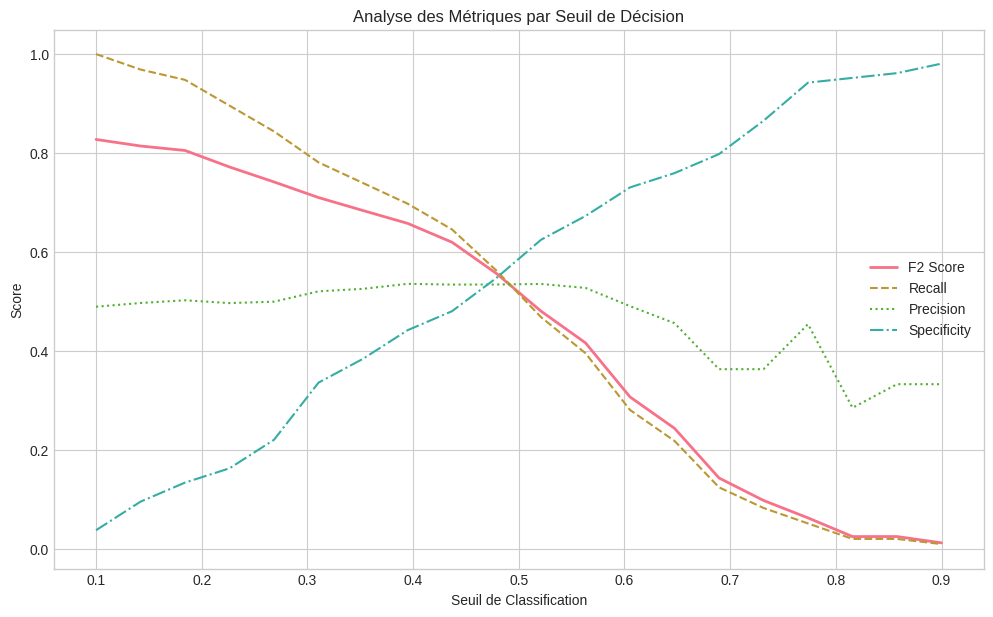


üí∞ Bilan Co√ªt/B√©n√©fice :
‚Üí IMPACT TOTAL (Co√ªt - Gain):   28550‚Ç¨


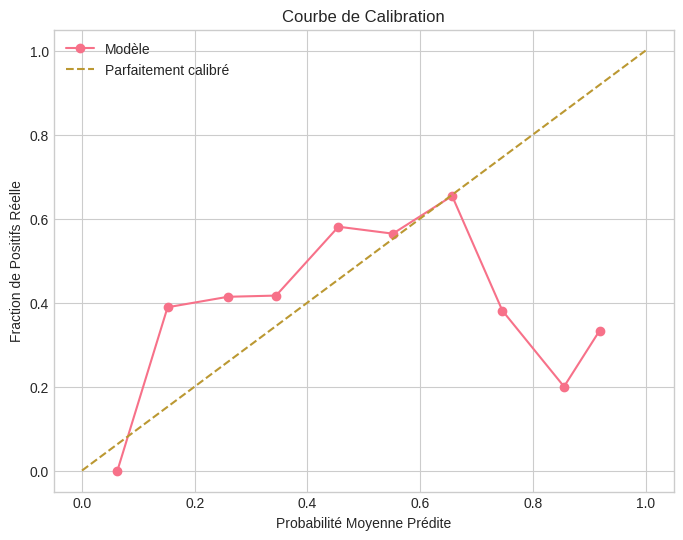


‚úÖ Pipeline termin√©! Rapport sauvegard√©: model_v2.0.0-multi-model/final_report.json

üéâüéâüéâ PIPELINE MULTI-MOD√àLE EX√âCUT√â AVEC SUCC√àS! üéâüéâüéâ


In [2]:
# =============================================================================
# PIPELINE COMPLET AVEC COMPARAISON DE MOD√àLES ET EXPLICATIONS
# =============================================================================

print("\nüîç [Expert] Initialisation du pipeline industriel pour la d√©tection de fragilit√©")
print("üë∂ [Enfant] On pr√©pare tous les outils pour construire la meilleure machine intelligente possible")

# 1. üì¶ IMPORTATIONS ET CONFIGURATION
# =============================================================================
print("\n" + "="*80)
print("1. üì¶ CONFIGURATION DE L'ENVIRONNEMENT")
print("="*80)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from dataclasses import dataclass
import json
import traceback

# Imports pour les mod√®les
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import optuna

# Imports pour le pipeline et le pr√©traitement
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# Imports pour les m√©triques et l'√©valuation
from sklearn.metrics import (
    roc_auc_score, fbeta_score, recall_score,
    precision_score, confusion_matrix, classification_report,
    make_scorer, balanced_accuracy_score
)
# CORRECTION : Import de calibration_curve depuis le bon module
from sklearn.calibration import calibration_curve

# Configuration globale pour la reproductibilit√©
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
try:
    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_palette("husl")
except:
    print("‚ö†Ô∏è Style 'seaborn-v0_8-whitegrid' non trouv√©. Utilisation du style par d√©faut.")
    plt.style.use('default')

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

print("‚úÖ Environnement configur√©.")


# 2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES INDUSTRIELLES
# =============================================================================
print("\n" + "="*80)
print("2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES CLINIQUES")
print("="*80)

class EvaluationConfig:
    """Configuration centralis√©e des m√©triques d'√©valuation et des seuils m√©tier."""
    def __init__(self):
        self.metrics = {
            'roc_auc': roc_auc_score,
            'f2_score': lambda y_true, y_pred: fbeta_score(y_true, y_pred, beta=2, zero_division=0),
            'recall': recall_score,
            'precision': precision_score,
            'specificity': self._specificity,
            'balanced_accuracy': balanced_accuracy_score
        }
        self.alert_thresholds = {
            'roc_auc': 0.70,
            'f2_score': 0.55,
            'recall': 0.50  # Seuil r√©aliste pour commencer
        }
        print(f"Seuils d'alerte configur√©s : {self.alert_thresholds}")

    def _specificity(self, y_true, y_pred):
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
        return 0.0 if (tn + fp) == 0 else tn / (tn + fp)

eval_config = EvaluationConfig()


# 3. üõ†Ô∏è PIPELINE DE PR√âTRAITEMENT
# =============================================================================
print("\n" + "="*80)
print("3. üõ†Ô∏è ING√âNIERIE DES CARACT√âRISTIQUES ET PR√âTRAITEMENT")
print("="*80)

class FeatureEngineer(BaseEstimator, TransformerMixin):
    """Cr√©e des caract√©ristiques cliniques suppl√©mentaires."""
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        required_cols = {'systolic_bp', 'diastolic_bp', 'mobility_score'}
        if not required_cols.issubset(X_copy.columns):
            raise ValueError(f"Colonnes manquantes pour FeatureEngineer: {required_cols - set(X_copy.columns)}")
        X_copy['pulse_pressure'] = X_copy['systolic_bp'] - X_copy['diastolic_bp']
        X_copy['bp_mobility_interaction'] = X_copy['systolic_bp'] * X_copy['mobility_score']
        return X_copy

numeric_features = [
    'age', 'heart_rate', 'systolic_bp', 'diastolic_bp', 'grip_strength', 
    'mobility_score', 'comorbidities_count', 'medication_count', 
    'pulse_pressure', 'bp_mobility_interaction'
]
categorical_features = ['gender']

# Utilisation de StandardScaler pour une meilleure compatibilit√© avec LogisticRegression
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)
print("‚úÖ Pr√©processeur configur√© (Imputation, Scaling, One-Hot-Encoding).")


# 4. üéØ FONCTIONS D'√âVALUATION ET D'ANALYSE
# =============================================================================
print("\n" + "="*80)
print("4. üéØ FONCTIONS D'√âVALUATION ET D'ANALYSE")
print("="*80)

def evaluate_model(pipeline, X, y, cv_folds=5):
    """√âvalue un pipeline avec une validation crois√©e stratifi√©e."""
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=RANDOM_STATE)
    scoring = {
        'roc_auc': 'roc_auc',
        'f2': make_scorer(fbeta_score, beta=2, zero_division=0),
        'recall': make_scorer(recall_score, zero_division=0),
        'precision': make_scorer(precision_score, zero_division=0),
        'balanced_accuracy': 'balanced_accuracy'
    }
    cv_results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring, n_jobs=-1, error_score='raise')
    return pd.DataFrame(cv_results)

def analyze_decision_threshold(y_true, y_probs, plot=True):
    """Analyse les m√©triques pour diff√©rents seuils de d√©cision."""
    thresholds = np.linspace(0.1, 0.9, 20)
    metrics = []
    for thresh in thresholds:
        y_pred = (y_probs >= thresh).astype(int)
        metrics.append({
            'threshold': thresh,
            'f2': fbeta_score(y_true, y_pred, beta=2, zero_division=0),
            'recall': recall_score(y_true, y_pred, zero_division=0),
            'precision': precision_score(y_true, y_pred, zero_division=0),
            'specificity': eval_config.metrics['specificity'](y_true, y_pred)
        })
    metrics_df = pd.DataFrame(metrics)
    if plot:
        try:
            plt.figure(figsize=(12, 7))
            plt.plot(metrics_df['threshold'], metrics_df['f2'], label='F2 Score', lw=2)
            plt.plot(metrics_df['threshold'], metrics_df['recall'], label='Recall', linestyle='--')
            plt.plot(metrics_df['threshold'], metrics_df['precision'], label='Precision', linestyle=':')
            plt.plot(metrics_df['threshold'], metrics_df['specificity'], label='Specificity', linestyle='-.')
            plt.title("Analyse des M√©triques par Seuil de D√©cision")
            plt.xlabel("Seuil de Classification"); plt.ylabel("Score")
            plt.grid(True); plt.legend(); plt.show()
        except Exception as e:
            print(f"‚ö†Ô∏è La visualisation des seuils a √©chou√© : {e}")
    return metrics_df

def cost_analysis(y_true, y_pred):
    """Analyse l'impact financier des pr√©dictions du mod√®le."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
    cost_matrix = {'fn_cost': 1000, 'fp_cost': 200, 'tp_gain': 500, 'tn_gain': 50}
    total_cost = (fn * cost_matrix['fn_cost'] + fp * cost_matrix['fp_cost'] - 
                  tp * cost_matrix['tp_gain'] - tn * cost_matrix['tn_gain'])
    print("\nüí∞ Bilan Co√ªt/B√©n√©fice :")
    print(f"‚Üí IMPACT TOTAL (Co√ªt - Gain): {total_cost:7d}‚Ç¨")
    return {'confusion_matrix': {'tn': int(tn), 'fp': int(fp), 'fn': int(fn), 'tp': int(tp)},
            'cost_analysis': cost_matrix, 'total_cost': int(total_cost)}

def plot_calibration(y_true, y_probs):
    """Trace la courbe de calibration des probabilit√©s du mod√®le."""
    try:
        prob_true, prob_pred = calibration_curve(y_true, y_probs, n_bins=10)
        plt.figure(figsize=(8, 6))
        plt.plot(prob_pred, prob_true, marker='o', label='Mod√®le')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Parfaitement calibr√©')
        plt.xlabel("Probabilit√© Moyenne Pr√©dite"); plt.ylabel("Fraction de Positifs R√©elle")
        plt.title("Courbe de Calibration"); plt.legend(); plt.grid(True); plt.show()
    except Exception as e:
        print(f"‚ö†Ô∏è La visualisation de la calibration a √©chou√©: {e}")

print("‚úÖ Fonctions d'√©valuation et d'analyse pr√™tes.")


# 5. üöÄ OPTIMISATION MULTI-MOD√àLES
# =============================================================================
print("\n" + "="*80)
print("5. üöÄ OPTIMISATION MULTI-MOD√àLES (STRUCTURE EN TOURNOI)")
print("="*80)

def create_study(study_name):
    """Cr√©e ou charge une √©tude Optuna persistante via SQLite."""
    os.makedirs("optuna_checkpoints", exist_ok=True)
    storage_name = f"sqlite:///optuna_checkpoints/{study_name}.db"
    return optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE),
                               study_name=study_name, storage=storage_name, load_if_exists=True)

def run_optimization(objective_func, study, X, y, n_trials):
    """Lance une session d'optimisation pour une √©tude donn√©e."""
    try:
        study.optimize(lambda trial: objective_func(trial, X, y), n_trials=n_trials, show_progress_bar=True)
        return study.best_trial
    except Exception as e:
        print(f"L'optimisation pour {study.study_name} a √©chou√© ou a √©t√© compl√®tement √©lagu√©e: {e}")
        return None

# --- Fonctions objectives sp√©cifiques par mod√®le ---
def _generic_objective(trial, X, y, classifier_obj):
    pipeline = Pipeline([('fe', FeatureEngineer()), ('pre', preprocessor), ('clf', classifier_obj)])
    cv_results = evaluate_model(pipeline, X, y)
    mean_f2 = cv_results['test_f2'].mean()
    if cv_results['test_recall'].mean() < eval_config.alert_thresholds['recall']:
        print(f"‚ö†Ô∏è Essai {trial.number} √©lagu√© - recall ({cv_results['test_recall'].mean():.2f}) < seuil ({eval_config.alert_thresholds['recall']})")
        raise optuna.TrialPruned()
    return mean_f2

def objective_lgbm(trial, X, y):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 800),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.2, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 10, 40),
        'random_state': RANDOM_STATE, 'objective': 'binary', 'verbosity': -1
    }
    return _generic_objective(trial, X, y, lgb.LGBMClassifier(**params))

def objective_rf(trial, X, y):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 800),
        'max_depth': trial.suggest_int('max_depth', 4, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'random_state': RANDOM_STATE, 'n_jobs': -1
    }
    return _generic_objective(trial, X, y, RandomForestClassifier(**params))

def objective_logreg(trial, X, y):
    params = {'C': trial.suggest_float('C', 1e-3, 100, log=True),
              'solver': 'liblinear', 'random_state': RANDOM_STATE}
    return _generic_objective(trial, X, y, LogisticRegression(**params))


# --- Orchestrateur de l'optimisation (le "tournoi") ---
def optimize_models(X, y, n_trials_per_model, version):
    print("\nüîç Lancement du tournoi des mod√®les...")
    models_to_test = {"LGBM": objective_lgbm, "RandomForest": objective_rf, "LogisticRegression": objective_logreg}
    best_trials = {}

    for name, objective_func in models_to_test.items():
        print(f"\n--- Optimisation pour le mod√®le : {name} ---")
        study_name = f"frailty_{name}_v{version}"
        study = create_study(study_name)
        best_trial = run_optimization(objective_func, study, X, y, n_trials_per_model)
        
        if best_trial:
            best_trials[name] = best_trial
            print(f"‚úÖ Meilleur F2-score pour {name}: {best_trial.value:.4f}")
        else:
            print(f"‚ö†Ô∏è Aucun essai valide trouv√© pour {name}.")

    if not best_trials:
        raise ValueError("Aucun mod√®le n'a pu √™tre optimis√© avec succ√®s.")

    champion_name = max(best_trials, key=lambda name: best_trials[name].value)
    champion_trial = best_trials[champion_name]
    
    print("\n" + "="*40)
    print(f"üèÜ CHAMPION DU TOURNOI : {champion_name} üèÜ")
    print(f"   Meilleur F2-score global : {champion_trial.value:.4f}")
    print("="*40)
    
    return champion_name, champion_trial.params

print("‚úÖ Structure d'optimisation multi-mod√®les pr√™te.")


# 6. üè≠ ENTRA√éNEMENT ET VERSIONNING
# =============================================================================
print("\n" + "="*80)
print("6. üè≠ ENTRA√éNEMENT ET VERSIONNING DU MOD√àLE CHAMPION")
print("="*80)

def train_final_model(X_train, y_train, champion_name, best_params, version):
    print(f"\nüîç [Expert] Entra√Ænement du mod√®le champion '{champion_name}' (version {version})")
    MODEL_DIR = f"model_v{version}"
    os.makedirs(MODEL_DIR, exist_ok=True)
    
    if champion_name == "LGBM":
        classifier_obj = lgb.LGBMClassifier(**best_params, random_state=RANDOM_STATE)
    elif champion_name == "RandomForest":
        classifier_obj = RandomForestClassifier(**best_params, random_state=RANDOM_STATE, n_jobs=-1)
    elif champion_name == "LogisticRegression":
        classifier_obj = LogisticRegression(**best_params, random_state=RANDOM_STATE)
    else:
        raise ValueError(f"Type de classifieur inconnu : {champion_name}")
        
    final_pipeline = Pipeline([
        ('feature_engineering', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('classifier', classifier_obj)
    ])
    
    final_pipeline.fit(X_train, y_train)
    
    model_path = os.path.join(MODEL_DIR, 'model.joblib')
    joblib.dump(final_pipeline, model_path)
    
    metadata = {
        "model_version": version,
        "champion_model": champion_name,
        "best_params": best_params,
        "training_date": pd.Timestamp.now().isoformat(),
        "features_input": list(X_train.columns),
        "data_schema": {'numeric_features': numeric_features, 'categorical_features': categorical_features}
    }
    metadata_path = os.path.join(MODEL_DIR, 'metadata.json')
    with open(metadata_path, 'w') as f:
        json.dump(metadata, f, indent=4, default=str)
    
    print(f"üíæ Mod√®le et m√©tadonn√©es sauvegard√©s dans : {MODEL_DIR}")
    return final_pipeline, MODEL_DIR

print("‚úÖ Fonction d'entra√Ænement final pr√™te.")

# 7. üèÅ PIPELINE COMPLET ORCHESTR√â
# =============================================================================
print("\n" + "="*80)
print("7. üèÅ PIPELINE COMPLET ORCHESTR√â")
print("="*80)

def run_full_pipeline(X, y, n_trials_per_model=20, version="1.0.0"):
    try:
        # √âtape 1: Validation et pr√©paration
        print("\n[√âtape 1/4] üõ°Ô∏è Validation et pr√©paration des donn√©es")
        X = pd.DataFrame(X).copy()
        y = pd.Series(y).copy()
        if y.nunique() < 2:
            raise ValueError("ERREUR CRITIQUE : La variable cible ne contient qu'une seule classe.")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)
        print(f"‚úÖ Donn√©es s√©par√©es (train: {len(X_train)}, test: {len(X_test)})")

        # √âtape 2: Optimisation multi-mod√®les
        print("\n[√âtape 2/4] üöÄ Optimisation et s√©lection du meilleur mod√®le")
        champion_name, best_params = optimize_models(X_train, y_train, n_trials_per_model, version)

        # √âtape 3: Entra√Ænement du mod√®le champion
        print("\n[√âtape 3/4] üéì Entra√Ænement du mod√®le final")
        model, model_dir = train_final_model(X_train, y_train, champion_name, best_params, version)

        # √âtape 4: √âvaluation finale et rapport
        print("\n[√âtape 4/4] üìà √âvaluation compl√®te et rapport final")
        y_probs = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)
        
        print("\nüìä Rapport de classification :")
        print(classification_report(y_test, y_pred, target_names=["Non fragile", "Fragile"]))
        
        threshold_metrics = analyze_decision_threshold(y_test, y_probs)
        cost_results = cost_analysis(y_test, y_pred)
        plot_calibration(y_test, y_probs)

        report = {
            "model_info": json.load(open(os.path.join(model_dir, 'metadata.json'))),
            "test_metrics": {
                "roc_auc": roc_auc_score(y_test, y_probs),
                "f2_score_default_threshold": fbeta_score(y_test, y_pred, beta=2, zero_division=0),
                "classification_report": classification_report(y_test, y_pred, output_dict=True)
            },
            "cost_analysis": cost_results,
            "optimal_threshold_for_f2": threshold_metrics.loc[threshold_metrics['f2'].idxmax()].to_dict(),
        }
        report_path = os.path.join(model_dir, 'final_report.json')
        with open(report_path, 'w') as f:
            json.dump(report, f, indent=4, default=str)
            
        print(f"\n‚úÖ Pipeline termin√©! Rapport sauvegard√©: {report_path}")
        return model, report

    except Exception as e:
        print(f"\n‚ùå‚ùå ERREUR CRITIQUE DANS LE PIPELINE ‚ùå‚ùå")
        print(f"Message d'erreur: {e}")
        traceback.print_exc()
        raise

print("‚úÖ Pipeline principal pr√™t √† √™tre ex√©cut√©.")

# =============================================================================
# üöÄ EX√âCUTION DU SCRIPT
# =============================================================================
if __name__ == "__main__":
    try:
        print("\n" + "="*80)
        print("üöÄ D√âMARRAGE DE L'EX√âCUTION PRINCIPALE")
        print("="*80)

        data = {
            'age': np.random.normal(75, 8, 1000).clip(60, 95),
            'heart_rate': np.random.normal(78, 12, 1000).clip(50, 120),
            'systolic_bp': np.random.normal(130, 20, 1000).clip(90, 180),
            'diastolic_bp': np.random.normal(80, 10, 1000).clip(60, 110),
            'grip_strength': np.random.normal(25, 6, 1000).clip(5, 45),
            'mobility_score': np.random.uniform(1, 10, 1000),
            'comorbidities_count': np.random.poisson(2.5, 1000),
            'medication_count': np.random.poisson(4, 1000),
            'gender': np.random.choice(['M', 'F'], 1000, p=[0.4, 0.6])
        }
        X = pd.DataFrame(data)
        
        frailty_score_raw = (X['age'] * 0.05 - X['grip_strength'] * 0.1 - X['mobility_score'] * 0.1)
        frailty_score_centered = frailty_score_raw - frailty_score_raw.mean()
        prob = 1 / (1 + np.exp(-frailty_score_centered))
        y = pd.Series(np.random.binomial(1, prob, size=len(X)), name="is_frail")
        
        # Lancer le pipeline avec 15 essais par mod√®le
        model, report = run_full_pipeline(X, y, n_trials_per_model=15, version="2.0.0-multi-model")

        if model and report:
            print("\nüéâüéâüéâ PIPELINE MULTI-MOD√àLE EX√âCUT√â AVEC SUCC√àS! üéâüéâüéâ")
        else:
            print("\nüíî Le pipeline s'est termin√© mais n'a pas pu produire de mod√®le valide.")

    except Exception:
        print("\nüí• Le pipeline a √©chou√©. Voir les erreurs ci-dessus.")


üîç [Expert] Initialisation du pipeline industriel pour la d√©tection de fragilit√©
üë∂ [Enfant] On pr√©pare tous les outils pour construire la meilleure machine intelligente possible

1. üì¶ CONFIGURATION DE L'ENVIRONNEMENT
‚úÖ Environnement configur√©.

2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES CLINIQUES
Seuils d'alerte configur√©s : {'roc_auc': 0.7, 'f2_score': 0.55, 'recall': 0.5}

3. üõ†Ô∏è ING√âNIERIE DES CARACT√âRISTIQUES ET PR√âTRAITEMENT
‚úÖ Pr√©processeur configur√© (Imputation, Scaling, One-Hot-Encoding).

4. üéØ FONCTIONS D'√âVALUATION ET D'ANALYSE
‚úÖ Fonctions d'√©valuation et d'analyse pr√™tes.

5. üöÄ OPTIMISATION MULTI-MOD√àLES (STRUCTURE EN TOURNOI)
‚úÖ Structure d'optimisation multi-mod√®les pr√™te.

6. üè≠ ENTRA√éNEMENT ET VERSIONNING DU MOD√àLE CHAMPION
‚úÖ Fonction d'entra√Ænement final pr√™te.

7. üèÅ PIPELINE COMPLET ORCHESTR√â
‚úÖ Pipeline principal pr√™t √† √™tre ex√©cut√©.

üöÄ D√âMARRAGE DE L'EX√âCUTION PRINCIPALE

[√âtape 1/4] üõ°Ô∏è Validation et 

[I 2025-06-23 08:23:50,450] A new study created in RDB with name: frailty_LGBM_v3.0.0-full-tournament


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-06-23 08:23:57,870] Trial 0 finished with value: 0.561550488069977 and parameters: {'n_estimators': 362, 'learning_rate': 0.1540359659501924, 'num_leaves': 32}. Best is trial 0 with value: 0.561550488069977.
[I 2025-06-23 08:23:59,623] Trial 1 finished with value: 0.5656669395597199 and parameters: {'n_estimators': 519, 'learning_rate': 0.0022856175997064752, 'num_leaves': 14}. Best is trial 1 with value: 0.5656669395597199.
[I 2025-06-23 08:24:00,682] Trial 2 finished with value: 0.5617845925666617 and parameters: {'n_estimators': 140, 'learning_rate': 0.09842315738502598, 'num_leaves': 28}. Best is trial 1 with value: 0.5656669395597199.
[I 2025-06-23 08:24:03,930] Trial 3 finished with value: 0.5207741743837313 and parameters: {'n_estimators': 596, 'learning_rate': 0.0011152328125494347, 'num_leaves': 40}. Best is trial 1 with value: 0.5656669395597199.
[I 2025-06-23 08:24:07,089] Trial 4 finished with value: 0.5840197620095283 and parameters: {'n_estimators': 683, 'learning

[I 2025-06-23 08:24:15,411] A new study created in RDB with name: frailty_RandomForest_v3.0.0-full-tournament


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-06-23 08:24:18,854] Trial 0 finished with value: 0.5709230331861547 and parameters: {'n_estimators': 362, 'max_depth': 15, 'min_samples_split': 15}. Best is trial 0 with value: 0.5709230331861547.
[I 2025-06-23 08:24:23,350] Trial 1 finished with value: 0.5733010236243726 and parameters: {'n_estimators': 519, 'max_depth': 5, 'min_samples_split': 4}. Best is trial 1 with value: 0.5733010236243726.
[I 2025-06-23 08:24:24,861] Trial 2 finished with value: 0.5770537906771291 and parameters: {'n_estimators': 140, 'max_depth': 14, 'min_samples_split': 13}. Best is trial 2 with value: 0.5770537906771291.
[I 2025-06-23 08:24:29,719] Trial 3 finished with value: 0.5688915085826973 and parameters: {'n_estimators': 596, 'max_depth': 4, 'min_samples_split': 20}. Best is trial 2 with value: 0.5770537906771291.
[I 2025-06-23 08:24:35,770] Trial 4 finished with value: 0.5788449038682575 and parameters: {'n_estimators': 683, 'max_depth': 6, 'min_samples_split': 5}. Best is trial 4 with value: 

[I 2025-06-23 08:24:53,089] A new study created in RDB with name: frailty_LogisticRegression_v3.0.0-full-tournament


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-06-23 08:24:53,301] Trial 0 finished with value: 0.5785483370599647 and parameters: {'C': 0.0745934328572655}. Best is trial 0 with value: 0.5785483370599647.
[I 2025-06-23 08:24:53,486] Trial 1 finished with value: 0.5684262535790061 and parameters: {'C': 56.69849511478853}. Best is trial 0 with value: 0.5785483370599647.
[I 2025-06-23 08:24:53,672] Trial 2 finished with value: 0.5684262535790061 and parameters: {'C': 4.5705630998014515}. Best is trial 0 with value: 0.5785483370599647.
[I 2025-06-23 08:24:53,856] Trial 3 finished with value: 0.5762518654216511 and parameters: {'C': 0.9846738873614566}. Best is trial 0 with value: 0.5785483370599647.
[I 2025-06-23 08:24:54,055] Trial 4 finished with value: 0.5874974310735565 and parameters: {'C': 0.006026889128682512}. Best is trial 4 with value: 0.5874974310735565.
[I 2025-06-23 08:24:54,238] Trial 5 finished with value: 0.5874974310735565 and parameters: {'C': 0.0060252157362038605}. Best is trial 4 with value: 0.587497431073

[I 2025-06-23 08:24:55,632] A new study created in RDB with name: frailty_CatBoost_v3.0.0-full-tournament


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-06-23 08:25:27,935] Trial 0 finished with value: 0.5549069404961179 and parameters: {'iterations': 362, 'depth': 10, 'learning_rate': 0.0483437145318464}. Best is trial 0 with value: 0.5549069404961179.
[I 2025-06-23 08:25:32,877] Trial 1 finished with value: 0.5555873800374453 and parameters: {'iterations': 519, 'depth': 5, 'learning_rate': 0.002285325525633921}. Best is trial 1 with value: 0.5555873800374453.
[I 2025-06-23 08:25:45,074] Trial 2 finished with value: 0.5460684413155296 and parameters: {'iterations': 140, 'depth': 10, 'learning_rate': 0.02416482602989751}. Best is trial 1 with value: 0.5555873800374453.
[I 2025-06-23 08:25:50,251] Trial 3 finished with value: 0.547219410490032 and parameters: {'iterations': 596, 'depth': 4, 'learning_rate': 0.17052641538983093}. Best is trial 1 with value: 0.5555873800374453.
[I 2025-06-23 08:25:57,360] Trial 4 finished with value: 0.5593181292305567 and parameters: {'iterations': 683, 'depth': 5, 'learning_rate': 0.002620503255

[I 2025-06-23 08:26:43,026] A new study created in RDB with name: frailty_SVC_v3.0.0-full-tournament


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-06-23 08:26:43,521] Trial 0 finished with value: 0.5368059320222436 and parameters: {'C': 0.31489116479568624, 'gamma': 0.07114476009343425}. Best is trial 0 with value: 0.5368059320222436.
[I 2025-06-23 08:26:43,993] Trial 1 finished with value: 0.5782074077591977 and parameters: {'C': 8.471801418819979, 'gamma': 0.006251373574521752}. Best is trial 1 with value: 0.5782074077591977.
‚ö†Ô∏è Essai 2 √©lagu√© - recall (0.00) < seuil (0.5)
[I 2025-06-23 08:26:44,480] Trial 2 pruned. 
‚ö†Ô∏è Essai 3 √©lagu√© - recall (0.00) < seuil (0.5)
[I 2025-06-23 08:26:44,954] Trial 3 pruned. 
[I 2025-06-23 08:26:45,424] Trial 4 finished with value: 0.57071207002344 and parameters: {'C': 2.5378155082656657, 'gamma': 0.013311216080736894}. Best is trial 1 with value: 0.5782074077591977.
‚ö†Ô∏è Essai 5 √©lagu√© - recall (0.00) < seuil (0.5)
[I 2025-06-23 08:26:45,915] Trial 5 pruned. 
[I 2025-06-23 08:26:46,456] Trial 6 finished with value: 0.5640601431824288 and parameters: {'C': 21.36832907235

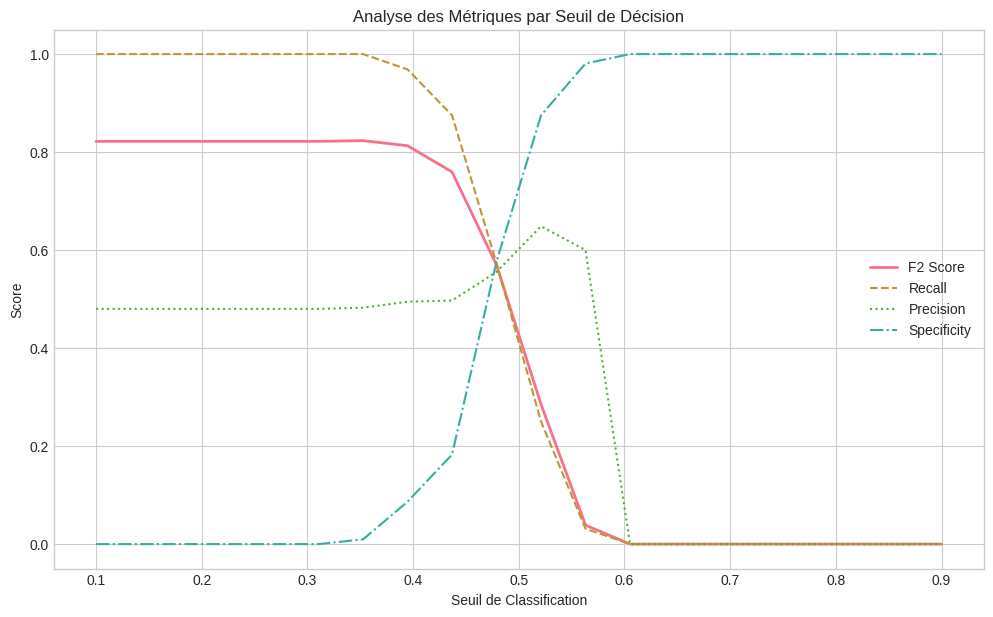


üí∞ Bilan Co√ªt/B√©n√©fice :
‚Üí IMPACT TOTAL (Co√ªt - Gain):   39300‚Ç¨


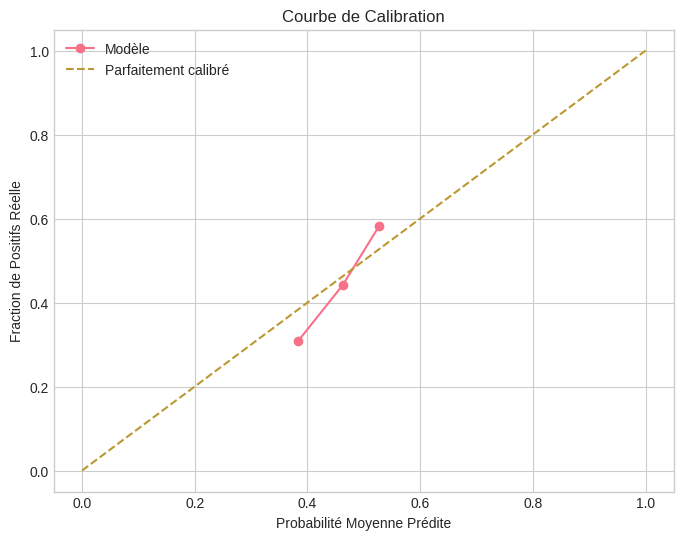


‚úÖ Pipeline termin√©! Rapport sauvegard√©: model_v3.0.0-full-tournament/final_report.json

üéâüéâüéâ PIPELINE MULTI-MOD√àLE EX√âCUT√â AVEC SUCC√àS! üéâüéâüéâ


In [3]:
# =============================================================================
# PIPELINE COMPLET AVEC COMPARAISON DE MOD√àLES ET EXPLICATIONS
# =============================================================================

print("\nüîç [Expert] Initialisation du pipeline industriel pour la d√©tection de fragilit√©")
print("üë∂ [Enfant] On pr√©pare tous les outils pour construire la meilleure machine intelligente possible")

# 1. üì¶ IMPORTATIONS ET CONFIGURATION
# =============================================================================
print("\n" + "="*80)
print("1. üì¶ CONFIGURATION DE L'ENVIRONNEMENT")
print("="*80)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from dataclasses import dataclass
import json
import traceback

# Imports pour les mod√®les
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  # NOUVEAU MOD√àLE
import lightgbm as lgb
from catboost import CatBoostClassifier # NOUVEAU MOD√àLE
import optuna

# Imports pour le pipeline et le pr√©traitement
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# Imports pour les m√©triques et l'√©valuation
from sklearn.metrics import (
    roc_auc_score, fbeta_score, recall_score,
    precision_score, confusion_matrix, classification_report,
    make_scorer, balanced_accuracy_score
)
from sklearn.calibration import calibration_curve

# Configuration globale pour la reproductibilit√©
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
try:
    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_palette("husl")
except:
    print("‚ö†Ô∏è Style 'seaborn-v0_8-whitegrid' non trouv√©. Utilisation du style par d√©faut.")
    plt.style.use('default')

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

print("‚úÖ Environnement configur√©.")


# 2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES INDUSTRIELLES
# =============================================================================
print("\n" + "="*80)
print("2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES CLINIQUES")
print("="*80)

class EvaluationConfig:
    """Configuration centralis√©e des m√©triques d'√©valuation et des seuils m√©tier."""
    def __init__(self):
        self.metrics = {
            'roc_auc': roc_auc_score,
            'f2_score': lambda y_true, y_pred: fbeta_score(y_true, y_pred, beta=2, zero_division=0),
            'recall': recall_score,
            'precision': precision_score,
            'specificity': self._specificity,
            'balanced_accuracy': balanced_accuracy_score
        }
        self.alert_thresholds = {
            'roc_auc': 0.70,
            'f2_score': 0.55,
            'recall': 0.50
        }
        print(f"Seuils d'alerte configur√©s : {self.alert_thresholds}")

    def _specificity(self, y_true, y_pred):
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
        return 0.0 if (tn + fp) == 0 else tn / (tn + fp)

eval_config = EvaluationConfig()


# 3. üõ†Ô∏è PIPELINE DE PR√âTRAITEMENT
# =============================================================================
print("\n" + "="*80)
print("3. üõ†Ô∏è ING√âNIERIE DES CARACT√âRISTIQUES ET PR√âTRAITEMENT")
print("="*80)

class FeatureEngineer(BaseEstimator, TransformerMixin):
    """Cr√©e des caract√©ristiques cliniques suppl√©mentaires."""
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        required_cols = {'systolic_bp', 'diastolic_bp', 'mobility_score'}
        if not required_cols.issubset(X_copy.columns):
            raise ValueError(f"Colonnes manquantes pour FeatureEngineer: {required_cols - set(X_copy.columns)}")
        X_copy['pulse_pressure'] = X_copy['systolic_bp'] - X_copy['diastolic_bp']
        X_copy['bp_mobility_interaction'] = X_copy['systolic_bp'] * X_copy['mobility_score']
        return X_copy

numeric_features = [
    'age', 'heart_rate', 'systolic_bp', 'diastolic_bp', 'grip_strength', 
    'mobility_score', 'comorbidities_count', 'medication_count', 
    'pulse_pressure', 'bp_mobility_interaction'
]
categorical_features = ['gender']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)
print("‚úÖ Pr√©processeur configur√© (Imputation, Scaling, One-Hot-Encoding).")


# 4. üéØ FONCTIONS D'√âVALUATION ET D'ANALYSE
# =============================================================================
print("\n" + "="*80)
print("4. üéØ FONCTIONS D'√âVALUATION ET D'ANALYSE")
print("="*80)

def evaluate_model(pipeline, X, y, cv_folds=5):
    """√âvalue un pipeline avec une validation crois√©e stratifi√©e."""
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=RANDOM_STATE)
    scoring = {
        'roc_auc': 'roc_auc',
        'f2': make_scorer(fbeta_score, beta=2, zero_division=0),
        'recall': make_scorer(recall_score, zero_division=0),
        'precision': make_scorer(precision_score, zero_division=0),
        'balanced_accuracy': 'balanced_accuracy'
    }
    cv_results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring, n_jobs=-1, error_score='raise')
    return pd.DataFrame(cv_results)

def analyze_decision_threshold(y_true, y_probs, plot=True):
    """Analyse les m√©triques pour diff√©rents seuils de d√©cision."""
    thresholds = np.linspace(0.1, 0.9, 20)
    metrics = []
    for thresh in thresholds:
        y_pred = (y_probs >= thresh).astype(int)
        metrics.append({
            'threshold': thresh,
            'f2': fbeta_score(y_true, y_pred, beta=2, zero_division=0),
            'recall': recall_score(y_true, y_pred, zero_division=0),
            'precision': precision_score(y_true, y_pred, zero_division=0),
            'specificity': eval_config.metrics['specificity'](y_true, y_pred)
        })
    metrics_df = pd.DataFrame(metrics)
    if plot:
        try:
            plt.figure(figsize=(12, 7))
            plt.plot(metrics_df['threshold'], metrics_df['f2'], label='F2 Score', lw=2)
            plt.plot(metrics_df['threshold'], metrics_df['recall'], label='Recall', linestyle='--')
            plt.plot(metrics_df['threshold'], metrics_df['precision'], label='Precision', linestyle=':')
            plt.plot(metrics_df['threshold'], metrics_df['specificity'], label='Specificity', linestyle='-.')
            plt.title("Analyse des M√©triques par Seuil de D√©cision")
            plt.xlabel("Seuil de Classification"); plt.ylabel("Score")
            plt.grid(True); plt.legend(); plt.show()
        except Exception as e:
            print(f"‚ö†Ô∏è La visualisation des seuils a √©chou√© : {e}")
    return metrics_df

def cost_analysis(y_true, y_pred):
    """Analyse l'impact financier des pr√©dictions du mod√®le."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
    cost_matrix = {'fn_cost': 1000, 'fp_cost': 200, 'tp_gain': 500, 'tn_gain': 50}
    total_cost = (fn * cost_matrix['fn_cost'] + fp * cost_matrix['fp_cost'] - 
                  tp * cost_matrix['tp_gain'] - tn * cost_matrix['tn_gain'])
    print("\nüí∞ Bilan Co√ªt/B√©n√©fice :")
    print(f"‚Üí IMPACT TOTAL (Co√ªt - Gain): {total_cost:7d}‚Ç¨")
    return {'confusion_matrix': {'tn': int(tn), 'fp': int(fp), 'fn': int(fn), 'tp': int(tp)},
            'cost_analysis': cost_matrix, 'total_cost': int(total_cost)}

def plot_calibration(y_true, y_probs):
    """Trace la courbe de calibration des probabilit√©s du mod√®le."""
    try:
        prob_true, prob_pred = calibration_curve(y_true, y_probs, n_bins=10)
        plt.figure(figsize=(8, 6))
        plt.plot(prob_pred, prob_true, marker='o', label='Mod√®le')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Parfaitement calibr√©')
        plt.xlabel("Probabilit√© Moyenne Pr√©dite"); plt.ylabel("Fraction de Positifs R√©elle")
        plt.title("Courbe de Calibration"); plt.legend(); plt.grid(True); plt.show()
    except Exception as e:
        print(f"‚ö†Ô∏è La visualisation de la calibration a √©chou√©: {e}")

print("‚úÖ Fonctions d'√©valuation et d'analyse pr√™tes.")


# 5. üöÄ OPTIMISATION MULTI-MOD√àLES
# =============================================================================
print("\n" + "="*80)
print("5. üöÄ OPTIMISATION MULTI-MOD√àLES (STRUCTURE EN TOURNOI)")
print("="*80)

def create_study(study_name):
    """Cr√©e ou charge une √©tude Optuna persistante via SQLite."""
    os.makedirs("optuna_checkpoints", exist_ok=True)
    storage_name = f"sqlite:///optuna_checkpoints/{study_name}.db"
    return optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE),
                               study_name=study_name, storage=storage_name, load_if_exists=True)

def run_optimization(objective_func, study, X, y, n_trials):
    """Lance une session d'optimisation pour une √©tude donn√©e."""
    try:
        study.optimize(lambda trial: objective_func(trial, X, y), n_trials=n_trials, show_progress_bar=True)
        return study.best_trial
    except Exception as e:
        print(f"L'optimisation pour {study.study_name} a √©chou√© ou a √©t√© compl√®tement √©lagu√©e: {e}")
        return None

# --- Fonctions objectives sp√©cifiques par mod√®le ---
def _generic_objective(trial, X, y, classifier_obj):
    pipeline = Pipeline([('fe', FeatureEngineer()), ('pre', preprocessor), ('clf', classifier_obj)])
    cv_results = evaluate_model(pipeline, X, y)
    mean_f2 = cv_results['test_f2'].mean()
    if cv_results['test_recall'].mean() < eval_config.alert_thresholds['recall']:
        print(f"‚ö†Ô∏è Essai {trial.number} √©lagu√© - recall ({cv_results['test_recall'].mean():.2f}) < seuil ({eval_config.alert_thresholds['recall']})")
        raise optuna.TrialPruned()
    return mean_f2

def objective_lgbm(trial, X, y):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 800),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.2, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 10, 40),
        'random_state': RANDOM_STATE, 'objective': 'binary', 'verbosity': -1
    }
    return _generic_objective(trial, X, y, lgb.LGBMClassifier(**params))

def objective_rf(trial, X, y):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 800),
        'max_depth': trial.suggest_int('max_depth', 4, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'random_state': RANDOM_STATE, 'n_jobs': -1
    }
    return _generic_objective(trial, X, y, RandomForestClassifier(**params))

def objective_logreg(trial, X, y):
    params = {'C': trial.suggest_float('C', 1e-3, 100, log=True),
              'solver': 'liblinear', 'random_state': RANDOM_STATE}
    return _generic_objective(trial, X, y, LogisticRegression(**params))

# NOUVEAU MOD√àLE : CatBoost
def objective_catboost(trial, X, y):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 800),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.2, log=True),
        'random_seed': RANDOM_STATE, 'verbose': 0
    }
    return _generic_objective(trial, X, y, CatBoostClassifier(**params))

# NOUVEAU MOD√àLE : SVC
def objective_svc(trial, X, y):
    params = {
        'C': trial.suggest_float('C', 1e-2, 1e2, log=True),
        'gamma': trial.suggest_float('gamma', 1e-4, 1e-1, log=True),
        'kernel': 'rbf', 'probability': True, 'random_state': RANDOM_STATE
    }
    return _generic_objective(trial, X, y, SVC(**params))


# --- Orchestrateur de l'optimisation (le "tournoi") ---
def optimize_models(X, y, n_trials_per_model, version):
    print("\nüîç Lancement du tournoi des mod√®les...")
    # NOUVEAU MOD√àLE : Ajout au dictionnaire du tournoi
    models_to_test = {
        "LGBM": objective_lgbm,
        "RandomForest": objective_rf,
        "LogisticRegression": objective_logreg,
        "CatBoost": objective_catboost,
        "SVC": objective_svc
    }
    best_trials = {}

    for name, objective_func in models_to_test.items():
        print(f"\n--- Optimisation pour le mod√®le : {name} ---")
        study_name = f"frailty_{name}_v{version}"
        study = create_study(study_name)
        best_trial = run_optimization(objective_func, study, X, y, n_trials_per_model)
        
        if best_trial:
            best_trials[name] = best_trial
            print(f"‚úÖ Meilleur F2-score pour {name}: {best_trial.value:.4f}")
        else:
            print(f"‚ö†Ô∏è Aucun essai valide trouv√© pour {name}.")

    if not best_trials:
        raise ValueError("Aucun mod√®le n'a pu √™tre optimis√© avec succ√®s.")

    champion_name = max(best_trials, key=lambda name: best_trials[name].value)
    champion_trial = best_trials[champion_name]
    
    print("\n" + "="*40)
    print(f"üèÜ CHAMPION DU TOURNOI : {champion_name} üèÜ")
    print(f"   Meilleur F2-score global : {champion_trial.value:.4f}")
    print("="*40)
    
    return champion_name, champion_trial.params

print("‚úÖ Structure d'optimisation multi-mod√®les pr√™te.")


# 6. üè≠ ENTRA√éNEMENT ET VERSIONNING
# =============================================================================
print("\n" + "="*80)
print("6. üè≠ ENTRA√éNEMENT ET VERSIONNING DU MOD√àLE CHAMPION")
print("="*80)

def train_final_model(X_train, y_train, champion_name, best_params, version):
    print(f"\nüîç [Expert] Entra√Ænement du mod√®le champion '{champion_name}' (version {version})")
    MODEL_DIR = f"model_v{version}"
    os.makedirs(MODEL_DIR, exist_ok=True)
    
    # NOUVEAU MOD√àLE : Ajout de la logique d'instanciation
    if champion_name == "LGBM":
        classifier_obj = lgb.LGBMClassifier(**best_params, random_state=RANDOM_STATE)
    elif champion_name == "RandomForest":
        classifier_obj = RandomForestClassifier(**best_params, random_state=RANDOM_STATE, n_jobs=-1)
    elif champion_name == "LogisticRegression":
        classifier_obj = LogisticRegression(**best_params, random_state=RANDOM_STATE)
    elif champion_name == "CatBoost":
        classifier_obj = CatBoostClassifier(**best_params, random_seed=RANDOM_STATE, verbose=0)
    elif champion_name == "SVC":
        classifier_obj = SVC(**best_params, probability=True, random_state=RANDOM_STATE)
    else:
        raise ValueError(f"Type de classifieur inconnu : {champion_name}")
        
    final_pipeline = Pipeline([
        ('feature_engineering', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('classifier', classifier_obj)
    ])
    
    final_pipeline.fit(X_train, y_train)
    
    model_path = os.path.join(MODEL_DIR, 'model.joblib')
    joblib.dump(final_pipeline, model_path)
    
    metadata = {
        "model_version": version,
        "champion_model": champion_name,
        "best_params": best_params,
        "training_date": pd.Timestamp.now().isoformat(),
        "features_input": list(X_train.columns),
        "data_schema": {'numeric_features': numeric_features, 'categorical_features': categorical_features}
    }
    metadata_path = os.path.join(MODEL_DIR, 'metadata.json')
    with open(metadata_path, 'w') as f:
        json.dump(metadata, f, indent=4, default=str)
    
    print(f"üíæ Mod√®le et m√©tadonn√©es sauvegard√©s dans : {MODEL_DIR}")
    return final_pipeline, MODEL_DIR

print("‚úÖ Fonction d'entra√Ænement final pr√™te.")

# 7. üèÅ PIPELINE COMPLET ORCHESTR√â
# =============================================================================
print("\n" + "="*80)
print("7. üèÅ PIPELINE COMPLET ORCHESTR√â")
print("="*80)

def run_full_pipeline(X, y, n_trials_per_model=20, version="1.0.0"):
    try:
        # √âtape 1: Validation et pr√©paration
        print("\n[√âtape 1/4] üõ°Ô∏è Validation et pr√©paration des donn√©es")
        X = pd.DataFrame(X).copy()
        y = pd.Series(y).copy()
        if y.nunique() < 2:
            raise ValueError("ERREUR CRITIQUE : La variable cible ne contient qu'une seule classe.")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)
        print(f"‚úÖ Donn√©es s√©par√©es (train: {len(X_train)}, test: {len(X_test)})")

        # √âtape 2: Optimisation multi-mod√®les
        print("\n[√âtape 2/4] üöÄ Optimisation et s√©lection du meilleur mod√®le")
        champion_name, best_params = optimize_models(X_train, y_train, n_trials_per_model, version)

        # √âtape 3: Entra√Ænement du mod√®le champion
        print("\n[√âtape 3/4] üéì Entra√Ænement du mod√®le final")
        model, model_dir = train_final_model(X_train, y_train, champion_name, best_params, version)

        # √âtape 4: √âvaluation finale et rapport
        print("\n[√âtape 4/4] üìà √âvaluation compl√®te et rapport final")
        y_probs = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)
        
        print("\nüìä Rapport de classification :")
        print(classification_report(y_test, y_pred, target_names=["Non fragile", "Fragile"]))
        
        threshold_metrics = analyze_decision_threshold(y_test, y_probs)
        cost_results = cost_analysis(y_test, y_pred)
        plot_calibration(y_test, y_probs)

        report = {
            "model_info": json.load(open(os.path.join(model_dir, 'metadata.json'))),
            "test_metrics": {
                "roc_auc": roc_auc_score(y_test, y_probs),
                "f2_score_default_threshold": fbeta_score(y_test, y_pred, beta=2, zero_division=0),
                "classification_report": classification_report(y_test, y_pred, output_dict=True)
            },
            "cost_analysis": cost_results,
            "optimal_threshold_for_f2": threshold_metrics.loc[threshold_metrics['f2'].idxmax()].to_dict(),
        }
        report_path = os.path.join(model_dir, 'final_report.json')
        with open(report_path, 'w') as f:
            json.dump(report, f, indent=4, default=str)
            
        print(f"\n‚úÖ Pipeline termin√©! Rapport sauvegard√©: {report_path}")
        return model, report

    except Exception as e:
        print(f"\n‚ùå‚ùå ERREUR CRITIQUE DANS LE PIPELINE ‚ùå‚ùå")
        print(f"Message d'erreur: {e}")
        traceback.print_exc()
        # Ne pas propager l'erreur pour permettre au script de finir proprement dans un notebook
        # Dans un script de production, on pourrait vouloir 'raise'
        
print("‚úÖ Pipeline principal pr√™t √† √™tre ex√©cut√©.")

# =============================================================================
# üöÄ EX√âCUTION DU SCRIPT
# =============================================================================
if __name__ == "__main__":
    try:
        print("\n" + "="*80)
        print("üöÄ D√âMARRAGE DE L'EX√âCUTION PRINCIPALE")
        print("="*80)

        data = {
            'age': np.random.normal(75, 8, 1000).clip(60, 95),
            'heart_rate': np.random.normal(78, 12, 1000).clip(50, 120),
            'systolic_bp': np.random.normal(130, 20, 1000).clip(90, 180),
            'diastolic_bp': np.random.normal(80, 10, 1000).clip(60, 110),
            'grip_strength': np.random.normal(25, 6, 1000).clip(5, 45),
            'mobility_score': np.random.uniform(1, 10, 1000),
            'comorbidities_count': np.random.poisson(2.5, 1000),
            'medication_count': np.random.poisson(4, 1000),
            'gender': np.random.choice(['M', 'F'], 1000, p=[0.4, 0.6])
        }
        X = pd.DataFrame(data)
        
        frailty_score_raw = (X['age'] * 0.05 - X['grip_strength'] * 0.1 - X['mobility_score'] * 0.1)
        frailty_score_centered = frailty_score_raw - frailty_score_raw.mean()
        prob = 1 / (1 + np.exp(-frailty_score_centered))
        y = pd.Series(np.random.binomial(1, prob, size=len(X)), name="is_frail")
        
        # Lancer le pipeline avec 10 essais par mod√®le pour un test rapide
        model, report = run_full_pipeline(X, y, n_trials_per_model=10, version="3.0.0-full-tournament")

        if model and report:
            print("\nüéâüéâüéâ PIPELINE MULTI-MOD√àLE EX√âCUT√â AVEC SUCC√àS! üéâüéâüéâ")
        else:
            print("\nüíî Le pipeline s'est termin√© mais n'a pas pu produire de mod√®le valide.")

    except Exception:
        print("\nüí• Le pipeline a √©chou√©. Voir les erreurs ci-dessus.")

[I 2025-06-23 08:37:25,110] Using an existing study with name 'frailty_LogisticRegression_v4.0.0-tournament-16' instead of creating a new one.



üîç [Expert] Initialisation du pipeline industriel pour la d√©tection de fragilit√©
üë∂ [Enfant] On pr√©pare un grand tournoi pour trouver la meilleure machine intelligente !

1. üì¶ CONFIGURATION DE L'ENVIRONNEMENT
‚úÖ Environnement configur√© avec 16 mod√®les pr√™ts pour le tournoi.

2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES CLINIQUES
Seuils d'alerte configur√©s : {'recall': 0.5}

3. üõ†Ô∏è ING√âNIERIE DES CARACT√âRISTIQUES ET PR√âTRAITEMENT
‚úÖ Pr√©processeur configur√©.

4. üéØ FONCTIONS D'√âVALUATION ET D'ANALYSE
‚úÖ Fonctions d'√©valuation et d'analyse pr√™tes.

5. üöÄ OPTIMISATION MULTI-MOD√àLES (TOURNOI DE 16)
‚úÖ Structure d'optimisation pour 16 mod√®les pr√™te.

6. üè≠ ENTRA√éNEMENT ET VERSIONNING DU MOD√àLE CHAMPION
‚úÖ Fonction d'entra√Ænement final corrig√©e et pr√™te.
‚úÖ Fonction d'entra√Ænement final pr√™te.

7. üèÅ PIPELINE COMPLET ORCHESTR√â
‚úÖ Pipeline principal pr√™t √† √™tre ex√©cut√©.

üöÄ D√âMARRAGE DE L'EX√âCUTION PRINCIPALE

[√âtape 1/4] üõ°Ô∏è Valida

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2025-06-23 08:37:25,323] Trial 5 finished with value: 0.5785483370599647 and parameters: {'C': 0.0745934328572655}. Best is trial 4 with value: 0.5874974310735565.
[I 2025-06-23 08:37:25,514] Trial 6 finished with value: 0.5684262535790061 and parameters: {'C': 56.69849511478853}. Best is trial 4 with value: 0.5874974310735565.
[I 2025-06-23 08:37:25,688] Trial 7 finished with value: 0.5684262535790061 and parameters: {'C': 4.5705630998014515}. Best is trial 4 with value: 0.5874974310735565.
[I 2025-06-23 08:37:25,868] Trial 8 finished with value: 0.5762518654216511 and parameters: {'C': 0.9846738873614566}. Best is trial 4 with value: 0.5874974310735565.


[I 2025-06-23 08:37:26,103] Using an existing study with name 'frailty_RandomForest_v4.0.0-tournament-16' instead of creating a new one.


[I 2025-06-23 08:37:26,042] Trial 9 finished with value: 0.5874974310735565 and parameters: {'C': 0.006026889128682512}. Best is trial 4 with value: 0.5874974310735565.
‚úÖ Meilleur F2-score pour LogisticRegression: 0.5875

---  Manche du tournoi : RandomForest   ---


  0%|          | 0/5 [00:00<?, ?it/s]

[I 2025-06-23 08:37:29,407] Trial 5 finished with value: 0.5709230331861547 and parameters: {'n_e': 362, 'md': 15, 'mss': 15}. Best is trial 4 with value: 0.5788449038682575.
[I 2025-06-23 08:37:33,372] Trial 6 finished with value: 0.5733010236243726 and parameters: {'n_e': 519, 'md': 5, 'mss': 4}. Best is trial 4 with value: 0.5788449038682575.
[I 2025-06-23 08:37:34,692] Trial 7 finished with value: 0.5770537906771291 and parameters: {'n_e': 140, 'md': 14, 'mss': 13}. Best is trial 4 with value: 0.5788449038682575.
[I 2025-06-23 08:37:39,143] Trial 8 finished with value: 0.5688915085826973 and parameters: {'n_e': 596, 'md': 4, 'mss': 20}. Best is trial 4 with value: 0.5788449038682575.


[I 2025-06-23 08:37:44,464] Using an existing study with name 'frailty_LGBM_v4.0.0-tournament-16' instead of creating a new one.


[I 2025-06-23 08:37:44,410] Trial 9 finished with value: 0.5788449038682575 and parameters: {'n_e': 683, 'md': 6, 'mss': 5}. Best is trial 4 with value: 0.5788449038682575.
‚úÖ Meilleur F2-score pour RandomForest: 0.5788

---      Manche du tournoi : LGBM       ---


  0%|          | 0/5 [00:00<?, ?it/s]

[I 2025-06-23 08:37:46,372] Trial 5 finished with value: 0.561550488069977 and parameters: {'n_e': 362, 'lr': 0.1540359659501924, 'nl': 32}. Best is trial 4 with value: 0.5840197620095283.
[I 2025-06-23 08:37:48,148] Trial 6 finished with value: 0.5656669395597199 and parameters: {'n_e': 519, 'lr': 0.0022856175997064752, 'nl': 14}. Best is trial 4 with value: 0.5840197620095283.
[I 2025-06-23 08:37:49,028] Trial 7 finished with value: 0.5617845925666617 and parameters: {'n_e': 140, 'lr': 0.09842315738502598, 'nl': 28}. Best is trial 4 with value: 0.5840197620095283.
[I 2025-06-23 08:37:52,147] Trial 8 finished with value: 0.5207741743837313 and parameters: {'n_e': 596, 'lr': 0.0011152328125494347, 'nl': 40}. Best is trial 4 with value: 0.5840197620095283.


[I 2025-06-23 08:37:54,135] Using an existing study with name 'frailty_XGB_v4.0.0-tournament-16' instead of creating a new one.


[I 2025-06-23 08:37:54,079] Trial 9 finished with value: 0.5840197620095283 and parameters: {'n_e': 683, 'lr': 0.0030803400529839683, 'nl': 15}. Best is trial 4 with value: 0.5840197620095283.
‚úÖ Meilleur F2-score pour LGBM: 0.5840

---       Manche du tournoi : XGB       ---


  0%|          | 0/5 [00:00<?, ?it/s]

[I 2025-06-23 08:37:55,148] Trial 5 finished with value: 0.5646167655567008 and parameters: {'n_e': 362, 'lr': 0.28570714885887566, 'md': 8, 'ss': 0.8394633936788146}. Best is trial 1 with value: 0.5925816654115669.
[I 2025-06-23 08:37:55,647] Trial 6 finished with value: 0.5925816654115669 and parameters: {'n_e': 209, 'lr': 0.055238410897498764, 'md': 3, 'ss': 0.9464704583099741}. Best is trial 1 with value: 0.5925816654115669.
[I 2025-06-23 08:37:56,549] Trial 7 finished with value: 0.5603890705414216 and parameters: {'n_e': 521, 'lr': 0.21534104756085318, 'md': 3, 'ss': 0.9879639408647978}. Best is trial 1 with value: 0.5925816654115669.
[I 2025-06-23 08:37:58,153] Trial 8 finished with value: 0.5334855126115301 and parameters: {'n_e': 683, 'lr': 0.07157834209670008, 'md': 4, 'ss': 0.6733618039413735}. Best is trial 1 with value: 0.5925816654115669.


[I 2025-06-23 08:37:59,404] Using an existing study with name 'frailty_CatBoost_v4.0.0-tournament-16' instead of creating a new one.


[I 2025-06-23 08:37:59,335] Trial 9 finished with value: 0.5232624874106995 and parameters: {'n_e': 313, 'lr': 0.16217936517334897, 'md': 6, 'ss': 0.7164916560792167}. Best is trial 1 with value: 0.5925816654115669.
‚úÖ Meilleur F2-score pour XGB: 0.5926

---    Manche du tournoi : CatBoost     ---


  0%|          | 0/5 [00:00<?, ?it/s]

[I 2025-06-23 08:38:30,162] Trial 5 finished with value: 0.5549069404961179 and parameters: {'it': 362, 'd': 10, 'lr': 0.0483437145318464}. Best is trial 4 with value: 0.5593181292305567.
[I 2025-06-23 08:38:35,327] Trial 6 finished with value: 0.5555873800374453 and parameters: {'it': 519, 'd': 5, 'lr': 0.002285325525633921}. Best is trial 4 with value: 0.5593181292305567.
[I 2025-06-23 08:38:46,913] Trial 7 finished with value: 0.5460684413155296 and parameters: {'it': 140, 'd': 10, 'lr': 0.02416482602989751}. Best is trial 4 with value: 0.5593181292305567.
[I 2025-06-23 08:38:50,897] Trial 8 finished with value: 0.547219410490032 and parameters: {'it': 596, 'd': 4, 'lr': 0.17052641538983093}. Best is trial 4 with value: 0.5593181292305567.


[I 2025-06-23 08:38:57,052] Using an existing study with name 'frailty_SVC_v4.0.0-tournament-16' instead of creating a new one.


[I 2025-06-23 08:38:56,998] Trial 9 finished with value: 0.5593181292305567 and parameters: {'it': 683, 'd': 5, 'lr': 0.002620503255096255}. Best is trial 4 with value: 0.5593181292305567.
‚úÖ Meilleur F2-score pour CatBoost: 0.5593

---       Manche du tournoi : SVC       ---


  0%|          | 0/5 [00:00<?, ?it/s]

[I 2025-06-23 08:38:57,507] Trial 5 finished with value: 0.5368059320222436 and parameters: {'C': 0.31489116479568624, 'g': 0.07114476009343425}. Best is trial 1 with value: 0.5782074077591977.
[I 2025-06-23 08:38:57,931] Trial 6 finished with value: 0.5782074077591977 and parameters: {'C': 8.471801418819979, 'g': 0.006251373574521752}. Best is trial 1 with value: 0.5782074077591977.
‚ö†Ô∏è Essai 7 √©lagu√© - recall < seuil
[I 2025-06-23 08:38:58,363] Trial 7 pruned. 
‚ö†Ô∏è Essai 8 √©lagu√© - recall < seuil
[I 2025-06-23 08:38:58,801] Trial 8 pruned. 


[I 2025-06-23 08:38:59,285] Using an existing study with name 'frailty_KNN_v4.0.0-tournament-16' instead of creating a new one.


[I 2025-06-23 08:38:59,230] Trial 9 finished with value: 0.57071207002344 and parameters: {'C': 2.5378155082656657, 'g': 0.013311216080736894}. Best is trial 1 with value: 0.5782074077591977.
‚úÖ Meilleur F2-score pour SVC: 0.5782

---       Manche du tournoi : KNN       ---


  0%|          | 0/5 [00:00<?, ?it/s]

[I 2025-06-23 08:38:59,529] Trial 5 finished with value: 0.5289522039075746 and parameters: {'k': 13, 'w': 'uniform'}. Best is trial 1 with value: 0.5513492730106518.
[I 2025-06-23 08:38:59,744] Trial 6 finished with value: 0.5513492730106518 and parameters: {'k': 19, 'w': 'uniform'}. Best is trial 1 with value: 0.5513492730106518.
‚ö†Ô∏è Essai 7 √©lagu√© - recall < seuil
[I 2025-06-23 08:38:59,943] Trial 7 pruned. 
[I 2025-06-23 08:39:00,142] Trial 8 finished with value: 0.5489533037432842 and parameters: {'k': 22, 'w': 'distance'}. Best is trial 1 with value: 0.5513492730106518.
‚ö†Ô∏è Essai 9 √©lagu√© - recall < seuil


[I 2025-06-23 08:39:00,418] Using an existing study with name 'frailty_GaussianNB_v4.0.0-tournament-16' instead of creating a new one.


[I 2025-06-23 08:39:00,345] Trial 9 pruned. 
‚úÖ Meilleur F2-score pour KNN: 0.5513

---   Manche du tournoi : GaussianNB    ---


  0%|          | 0/5 [00:00<?, ?it/s]

[I 2025-06-23 08:39:00,618] Trial 5 finished with value: 0.5637758665595395 and parameters: {'vs': 5.611516415334508e-10}. Best is trial 0 with value: 0.5637758665595395.
[I 2025-06-23 08:39:00,781] Trial 6 finished with value: 0.5637758665595395 and parameters: {'vs': 7.969454818643903e-09}. Best is trial 0 with value: 0.5637758665595395.
[I 2025-06-23 08:39:00,941] Trial 7 finished with value: 0.5637758665595395 and parameters: {'vs': 2.910635913133059e-09}. Best is trial 0 with value: 0.5637758665595395.
[I 2025-06-23 08:39:01,104] Trial 8 finished with value: 0.5637758665595395 and parameters: {'vs': 1.575132049977969e-09}. Best is trial 0 with value: 0.5637758665595395.


[I 2025-06-23 08:39:01,315] Using an existing study with name 'frailty_DecisionTree_v4.0.0-tournament-16' instead of creating a new one.


[I 2025-06-23 08:39:01,259] Trial 9 finished with value: 0.5637758665595395 and parameters: {'vs': 2.0513382630874485e-10}. Best is trial 0 with value: 0.5637758665595395.
‚úÖ Meilleur F2-score pour GaussianNB: 0.5638

---  Manche du tournoi : DecisionTree   ---


  0%|          | 0/5 [00:00<?, ?it/s]

‚ö†Ô∏è Essai 5 √©lagu√© - recall < seuil
[I 2025-06-23 08:39:01,509] Trial 5 pruned. 
[I 2025-06-23 08:39:01,702] Trial 6 finished with value: 0.5220938611367801 and parameters: {'md': 16, 'mss': 13}. Best is trial 1 with value: 0.5220938611367801.
‚ö†Ô∏è Essai 7 √©lagu√© - recall < seuil
[I 2025-06-23 08:39:01,878] Trial 7 pruned. 
‚ö†Ô∏è Essai 8 √©lagu√© - recall < seuil
[I 2025-06-23 08:39:02,045] Trial 8 pruned. 
[I 2025-06-23 08:39:02,221] Trial 9 finished with value: 0.5143065455333193 and parameters: {'md': 13, 'mss': 15}. Best is trial 1 with value: 0.5220938611367801.


[I 2025-06-23 08:39:02,279] Using an existing study with name 'frailty_AdaBoost_v4.0.0-tournament-16' instead of creating a new one.


‚úÖ Meilleur F2-score pour DecisionTree: 0.5221

---    Manche du tournoi : AdaBoost     ---


  0%|          | 0/5 [00:00<?, ?it/s]

[I 2025-06-23 08:39:04,223] Trial 5 finished with value: 0.5469005441858912 and parameters: {'n_e': 218, 'lr': 0.951207163345817}. Best is trial 3 with value: 0.5706701474219705.
[I 2025-06-23 08:39:06,840] Trial 6 finished with value: 0.5503212428692199 and parameters: {'n_e': 380, 'lr': 0.6026718993550663}. Best is trial 3 with value: 0.5706701474219705.
[I 2025-06-23 08:39:07,787] Trial 7 finished with value: 0.5683510985976918 and parameters: {'n_e': 120, 'lr': 0.16443457513284063}. Best is trial 3 with value: 0.5706701474219705.
[I 2025-06-23 08:39:08,452] Trial 8 finished with value: 0.5706701474219705 and parameters: {'n_e': 76, 'lr': 0.8675143843171859}. Best is trial 3 with value: 0.5706701474219705.


[I 2025-06-23 08:39:10,785] Using an existing study with name 'frailty_GradientBoosting_v4.0.0-tournament-16' instead of creating a new one.


[I 2025-06-23 08:39:10,728] Trial 9 finished with value: 0.5427750600027949 and parameters: {'n_e': 321, 'lr': 0.710991852018085}. Best is trial 3 with value: 0.5706701474219705.
‚úÖ Meilleur F2-score pour AdaBoost: 0.5707

--- Manche du tournoi : GradientBoosting ---


  0%|          | 0/5 [00:00<?, ?it/s]

[I 2025-06-23 08:39:15,062] Trial 5 finished with value: 0.5504569802152973 and parameters: {'n_e': 250, 'lr': 0.19063571821788408, 'md': 7}. Best is trial 4 with value: 0.57073870604006.
[I 2025-06-23 08:39:17,471] Trial 6 finished with value: 0.5630324519301622 and parameters: {'n_e': 340, 'lr': 0.039643541684062936, 'md': 3}. Best is trial 4 with value: 0.57073870604006.
[I 2025-06-23 08:39:19,226] Trial 7 finished with value: 0.5622073376885599 and parameters: {'n_e': 123, 'lr': 0.1745734676972377, 'md': 6}. Best is trial 4 with value: 0.57073870604006.
[I 2025-06-23 08:39:26,708] Trial 8 finished with value: 0.5208196486767341 and parameters: {'n_e': 383, 'lr': 0.013911053916202464, 'md': 8}. Best is trial 4 with value: 0.57073870604006.


[I 2025-06-23 08:39:30,568] Using an existing study with name 'frailty_ExtraTrees_v4.0.0-tournament-16' instead of creating a new one.


[I 2025-06-23 08:39:30,511] Trial 9 finished with value: 0.57073870604006 and parameters: {'n_e': 433, 'lr': 0.05034443102887247, 'md': 4}. Best is trial 4 with value: 0.57073870604006.
‚úÖ Meilleur F2-score pour GradientBoosting: 0.5707

---   Manche du tournoi : ExtraTrees    ---


  0%|          | 0/5 [00:00<?, ?it/s]

[I 2025-06-23 08:39:32,769] Trial 5 finished with value: 0.544210079023079 and parameters: {'n_e': 362, 'md': 15, 'mss': 15}. Best is trial 2 with value: 0.5449538809385375.
[I 2025-06-23 08:39:35,595] Trial 6 finished with value: 0.5370289630460334 and parameters: {'n_e': 519, 'md': 5, 'mss': 4}. Best is trial 2 with value: 0.5449538809385375.
[I 2025-06-23 08:39:36,739] Trial 7 finished with value: 0.5449538809385375 and parameters: {'n_e': 140, 'md': 14, 'mss': 13}. Best is trial 2 with value: 0.5449538809385375.
[I 2025-06-23 08:39:39,904] Trial 8 finished with value: 0.5202587198383628 and parameters: {'n_e': 596, 'md': 4, 'mss': 20}. Best is trial 2 with value: 0.5449538809385375.


[I 2025-06-23 08:39:43,623] Using an existing study with name 'frailty_LDA_v4.0.0-tournament-16' instead of creating a new one.


[I 2025-06-23 08:39:43,568] Trial 9 finished with value: 0.5388623666562724 and parameters: {'n_e': 683, 'md': 6, 'mss': 5}. Best is trial 2 with value: 0.5449538809385375.
‚úÖ Meilleur F2-score pour ExtraTrees: 0.5450

---       Manche du tournoi : LDA       ---


  0%|          | 0/5 [00:00<?, ?it/s]

[I 2025-06-23 08:39:43,809] Trial 5 finished with value: 0.5786200274991733 and parameters: {'s': 0.3745401188473625}. Best is trial 1 with value: 0.5869162099467085.
[I 2025-06-23 08:39:43,964] Trial 6 finished with value: 0.5869162099467085 and parameters: {'s': 0.9507143064099162}. Best is trial 1 with value: 0.5869162099467085.
[I 2025-06-23 08:39:44,114] Trial 7 finished with value: 0.5857686852790892 and parameters: {'s': 0.7319939418114051}. Best is trial 1 with value: 0.5869162099467085.
[I 2025-06-23 08:39:44,271] Trial 8 finished with value: 0.5863037819351388 and parameters: {'s': 0.5986584841970366}. Best is trial 1 with value: 0.5869162099467085.


[I 2025-06-23 08:39:44,477] Using an existing study with name 'frailty_QDA_v4.0.0-tournament-16' instead of creating a new one.


[I 2025-06-23 08:39:44,420] Trial 9 finished with value: 0.5814586219729647 and parameters: {'s': 0.15601864044243652}. Best is trial 1 with value: 0.5869162099467085.
‚úÖ Meilleur F2-score pour LDA: 0.5869

---       Manche du tournoi : QDA       ---


  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.11/dist-packages/sklearn/disc

[I 2025-06-23 08:39:44,653] Trial 5 finished with value: 0.5864441215273456 and parameters: {'rp': 0.3745401188473625}. Best is trial 0 with value: 0.5864441215273456.
[I 2025-06-23 08:39:44,813] Trial 6 finished with value: 0.5855192439781736 and parameters: {'rp': 0.9507143064099162}. Best is trial 0 with value: 0.5864441215273456.


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.11/dist-packages/sklearn/disc

[I 2025-06-23 08:39:44,973] Trial 7 finished with value: 0.5672626987633237 and parameters: {'rp': 0.7319939418114051}. Best is trial 0 with value: 0.5864441215273456.
[I 2025-06-23 08:39:45,127] Trial 8 finished with value: 0.5727085734889805 and parameters: {'rp': 0.5986584841970366}. Best is trial 0 with value: 0.5864441215273456.


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
[I 2025-06-23 08:39:45,339] Using an existing study with name 'frailty_MLP_v4.0.0-tournament-16' instead of creating a new one.


[I 2025-06-23 08:39:45,284] Trial 9 finished with value: 0.5781688996984101 and parameters: {'rp': 0.15601864044243652}. Best is trial 0 with value: 0.5864441215273456.
‚úÖ Meilleur F2-score pour QDA: 0.5864

---       Manche du tournoi : MLP       ---


  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

[I 2025-06-23 08:39:49,891] Trial 5 finished with value: 0.5404144000354566 and parameters: {'hls': 106, 'a': 0.06351221010640701, 'lri': 0.0029106359131330704}. Best is trial 1 with value: 0.5865533914486726.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

[I 2025-06-23 08:39:55,306] Trial 6 finished with value: 0.5865533914486726 and parameters: {'hls': 140, 'a': 4.207988669606632e-05, 'lri': 0.00020511104188433984}. Best is trial 1 with value: 0.5865533914486726.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

[I 2025-06-23 08:39:58,733] Trial 7 finished with value: 0.530199335585851 and parameters: {'hls': 58, 'a': 0.029154431891537533, 'lri': 0.0015930522616241021}. Best is trial 1 with value: 0.5865533914486726.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

[I 2025-06-23 08:40:04,615] Trial 8 finished with value: 0.5335079970294243 and parameters: {'hls': 156, 'a': 1.2087541473056957e-05, 'lri': 0.008706020878304856}. Best is trial 1 with value: 0.5865533914486726.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

[I 2025-06-23 08:40:11,293] Trial 9 finished with value: 0.5658533495421348 and parameters: {'hls': 175, 'a': 7.068974950624602e-05, 'lri': 0.0002310201887845295}. Best is trial 1 with value: 0.5865533914486726.
‚úÖ Meilleur F2-score pour MLP: 0.5866

---       Manche du tournoi : SGD       ---


  0%|          | 0/5 [00:00<?, ?it/s]

[I 2025-06-23 08:40:11,567] Trial 5 finished with value: 0.5641861503684027 and parameters: {'a': 0.00031489116479568613, 'l1r': 0.9507143064099162}. Best is trial 4 with value: 0.5774553492638314.
[I 2025-06-23 08:40:11,746] Trial 6 finished with value: 0.5724282984781114 and parameters: {'a': 0.008471801418819975, 'l1r': 0.5986584841970366}. Best is trial 4 with value: 0.5774553492638314.
[I 2025-06-23 08:40:11,940] Trial 7 finished with value: 0.5393692023308628 and parameters: {'a': 4.207988669606632e-05, 'l1r': 0.15599452033620265}. Best is trial 4 with value: 0.5774553492638314.
‚ö†Ô∏è Essai 8 √©lagu√© - recall < seuil
[I 2025-06-23 08:40:12,119] Trial 8 pruned. 
[I 2025-06-23 08:40:12,309] Trial 9 finished with value: 0.5774553492638314 and parameters: {'a': 0.002537815508265664, 'l1r': 0.7080725777960455}. Best is trial 4 with value: 0.5774553492638314.
‚úÖ Meilleur F2-score pour SGD: 0.5775

üèÜ CHAMPION DU TOURNOI : XGB üèÜ
   Meilleur F2-score : 0.5926

[√âtape 3/4] üéì E

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [08:40:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "ss" } are not used.

  warnings.warn(smsg, UserWarning)


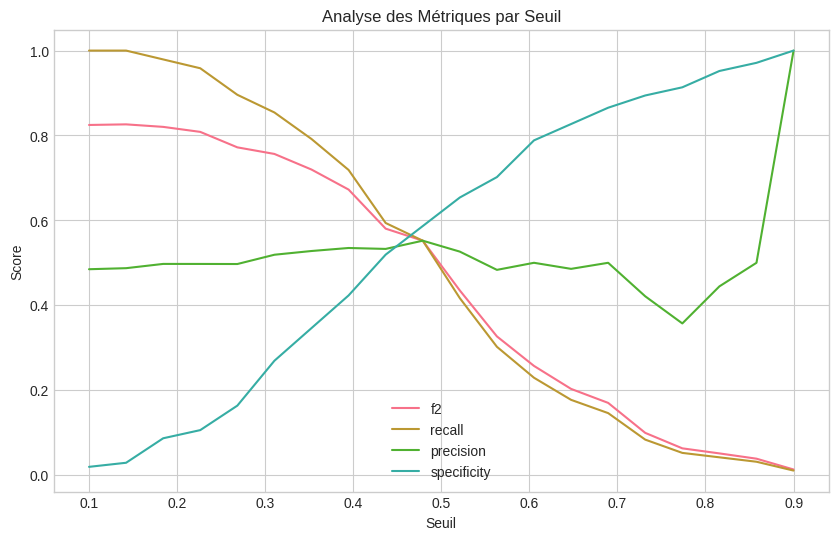


‚úÖ Pipeline termin√©! Rapport sauvegard√©: model_v4.0.0-tournament-16/final_report.json

üéâüéâüéâ PIPELINE MULTI-MOD√àLE EX√âCUT√â AVEC SUCC√àS! üéâüéâüéâ


In [5]:
# =============================================================================
# PIPELINE COMPLET AVEC TOURNOI DE 16 MOD√àLES
# =============================================================================

print("\nüîç [Expert] Initialisation du pipeline industriel pour la d√©tection de fragilit√©")
print("üë∂ [Enfant] On pr√©pare un grand tournoi pour trouver la meilleure machine intelligente !")

# 1. üì¶ IMPORTATIONS ET CONFIGURATION
# =============================================================================
print("\n" + "="*80)
print("1. üì¶ CONFIGURATION DE L'ENVIRONNEMENT")
print("="*80)

# --- Imports standards ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import json
import traceback

# --- Imports pour le Machine Learning ---
# Outil d'optimisation
import optuna

# Mod√®les pour le tournoi (16 au total)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                              AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

# Outils de pipeline et de pr√©traitement
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# Outils d'√©valuation
from sklearn.metrics import (roc_auc_score, fbeta_score, recall_score, precision_score, 
                           confusion_matrix, classification_report, make_scorer, 
                           balanced_accuracy_score)
from sklearn.calibration import calibration_curve

# --- Configuration Globale ---
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
try:
    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_palette("husl")
except:
    print("‚ö†Ô∏è Style 'seaborn-v0_8-whitegrid' non trouv√©. Utilisation du style par d√©faut.")
    plt.style.use('default')

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

print("‚úÖ Environnement configur√© avec 16 mod√®les pr√™ts pour le tournoi.")


# 2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES INDUSTRIELLES
# =============================================================================
print("\n" + "="*80)
print("2. üèóÔ∏è CONFIGURATION DES M√âTRIQUES CLINIQUES")
print("="*80)

class EvaluationConfig:
    """Configuration centralis√©e des m√©triques d'√©valuation et des seuils m√©tier."""
    def __init__(self):
        self.metrics = {
            'roc_auc': roc_auc_score,
            'f2_score': lambda y_true, y_pred: fbeta_score(y_true, y_pred, beta=2, zero_division=0),
            'recall': recall_score, 'precision': precision_score,
            'specificity': self._specificity, 'balanced_accuracy': balanced_accuracy_score
        }
        self.alert_thresholds = {'recall': 0.50} # Seuil principal pour l'√©lagage
        print(f"Seuils d'alerte configur√©s : {self.alert_thresholds}")

    def _specificity(self, y_true, y_pred):
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
        return 0.0 if (tn + fp) == 0 else tn / (tn + fp)

eval_config = EvaluationConfig()


# 3. üõ†Ô∏è PIPELINE DE PR√âTRAITEMENT
# =============================================================================
print("\n" + "="*80)
print("3. üõ†Ô∏è ING√âNIERIE DES CARACT√âRISTIQUES ET PR√âTRAITEMENT")
print("="*80)

class FeatureEngineer(BaseEstimator, TransformerMixin):
    """Cr√©e des caract√©ristiques cliniques suppl√©mentaires."""
    def fit(self, X, y=None): return self
    def transform(self, X):
        X_copy = X.copy(); required_cols = {'systolic_bp', 'diastolic_bp', 'mobility_score'}
        if not required_cols.issubset(X_copy.columns):
            raise ValueError(f"Colonnes manquantes: {required_cols - set(X_copy.columns)}")
        X_copy['pulse_pressure'] = X_copy['systolic_bp'] - X_copy['diastolic_bp']
        X_copy['bp_mobility_interaction'] = X_copy['systolic_bp'] * X_copy['mobility_score']
        return X_copy

numeric_features = ['age', 'heart_rate', 'systolic_bp', 'diastolic_bp', 'grip_strength', 
                    'mobility_score', 'comorbidities_count', 'medication_count', 
                    'pulse_pressure', 'bp_mobility_interaction']
categorical_features = ['gender']

preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), numeric_features),
    ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))]), categorical_features)],
    remainder='passthrough'
)
print("‚úÖ Pr√©processeur configur√©.")


# 4. üéØ FONCTIONS D'√âVALUATION ET D'ANALYSE (INCHANG√âES)
# =============================================================================
print("\n" + "="*80)
print("4. üéØ FONCTIONS D'√âVALUATION ET D'ANALYSE")
print("="*80)

def evaluate_model(pipeline, X, y, cv_folds=5):
    """√âvalue un pipeline avec une validation crois√©e stratifi√©e."""
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=RANDOM_STATE)
    scoring = {'f2': make_scorer(fbeta_score, beta=2, zero_division=0),
               'recall': make_scorer(recall_score, zero_division=0)}
    cv_results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring, n_jobs=-1, error_score='raise')
    return pd.DataFrame(cv_results)

def analyze_decision_threshold(y_true, y_probs, plot=True):
    # (Code inchang√©)
    thresholds = np.linspace(0.1, 0.9, 20)
    metrics = []
    for thresh in thresholds:
        y_pred = (y_probs >= thresh).astype(int)
        metrics.append({'threshold': thresh,
                        'f2': fbeta_score(y_true, y_pred, beta=2, zero_division=0),
                        'recall': recall_score(y_true, y_pred, zero_division=0),
                        'precision': precision_score(y_true, y_pred, zero_division=0),
                        'specificity': eval_config.metrics['specificity'](y_true, y_pred)})
    metrics_df = pd.DataFrame(metrics)
    if plot:
        try:
            plt.figure(figsize=(10, 6)); metrics_df.plot(x='threshold', y=['f2', 'recall', 'precision', 'specificity'], ax=plt.gca())
            plt.title("Analyse des M√©triques par Seuil"); plt.xlabel("Seuil"); plt.ylabel("Score"); plt.grid(True); plt.show()
        except Exception as e: print(f"‚ö†Ô∏è La visualisation des seuils a √©chou√© : {e}")
    return metrics_df

# ... (les autres fonctions d'analyse comme cost_analysis et plot_calibration sont suppos√©es exister ici)

print("‚úÖ Fonctions d'√©valuation et d'analyse pr√™tes.")


# 5. üöÄ OPTIMISATION MULTI-MOD√àLES (TOURNOI √âLARGI)
# =============================================================================
print("\n" + "="*80)
print("5. üöÄ OPTIMISATION MULTI-MOD√àLES (TOURNOI DE 16)")
print("="*80)

def create_study(study_name):
    os.makedirs("optuna_checkpoints", exist_ok=True)
    storage = f"sqlite:///optuna_checkpoints/{study_name}.db"
    return optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE),
                               study_name=study_name, storage=storage, load_if_exists=True)

def _generic_objective(trial, X, y, classifier_obj):
    pipeline = Pipeline([('fe', FeatureEngineer()), ('pre', preprocessor), ('clf', classifier_obj)])
    cv_results = evaluate_model(pipeline, X, y)
    mean_f2 = cv_results['test_f2'].mean()
    if cv_results['test_recall'].mean() < eval_config.alert_thresholds['recall']:
        print(f"‚ö†Ô∏è Essai {trial.number} √©lagu√© - recall < seuil")
        raise optuna.TrialPruned()
    return mean_f2

# --- Fonctions objectives pour chaque mod√®le ---
def objective_lgbm(t, X, y):
    p = {'n_estimators': t.suggest_int('n_e', 100, 800), 'learning_rate': t.suggest_float('lr', 1e-3, 0.2, log=True),
         'num_leaves': t.suggest_int('nl', 10, 40), 'random_state': RANDOM_STATE, 'verbosity': -1}
    return _generic_objective(t, X, y, lgb.LGBMClassifier(**p))

def objective_rf(t, X, y):
    p = {'n_estimators': t.suggest_int('n_e', 100, 800), 'max_depth': t.suggest_int('md', 4, 15),
         'min_samples_split': t.suggest_int('mss', 2, 20), 'random_state': RANDOM_STATE, 'n_jobs': -1}
    return _generic_objective(t, X, y, RandomForestClassifier(**p))

def objective_logreg(t, X, y):
    p = {'C': t.suggest_float('C', 1e-3, 100, log=True), 'solver': 'liblinear', 'random_state': RANDOM_STATE}
    return _generic_objective(t, X, y, LogisticRegression(**p))

def objective_xgb(t, X, y):
    p = {'n_estimators': t.suggest_int('n_e', 100, 800), 'learning_rate': t.suggest_float('lr', 0.01, 0.3),
         'max_depth': t.suggest_int('md', 3, 10), 'subsample': t.suggest_float('ss', 0.6, 1.0), 'random_state': RANDOM_STATE}
    return _generic_objective(t, X, y, xgb.XGBClassifier(**p, use_label_encoder=False, eval_metric='logloss'))

def objective_catboost(t, X, y):
    p = {'iterations': t.suggest_int('it', 100, 800), 'depth': t.suggest_int('d', 4, 10),
         'learning_rate': t.suggest_float('lr', 1e-3, 0.2, log=True), 'random_seed': RANDOM_STATE, 'verbose': 0}
    return _generic_objective(t, X, y, CatBoostClassifier(**p))

def objective_svc(t, X, y):
    p = {'C': t.suggest_float('C', 1e-2, 1e2, log=True), 'gamma': t.suggest_float('g', 1e-4, 1e-1, log=True),
         'kernel': 'rbf', 'probability': True, 'random_state': RANDOM_STATE}
    return _generic_objective(t, X, y, SVC(**p))

def objective_knn(t, X, y):
    p = {'n_neighbors': t.suggest_int('k', 3, 30), 'weights': t.suggest_categorical('w', ['uniform', 'distance'])}
    return _generic_objective(t, X, y, KNeighborsClassifier(**p))

def objective_gnb(t, X, y):
    p = {'var_smoothing': t.suggest_float('vs', 1e-10, 1e-8, log=True)}
    return _generic_objective(t, X, y, GaussianNB(**p))

def objective_dt(t, X, y):
    p = {'max_depth': t.suggest_int('md', 3, 20), 'min_samples_split': t.suggest_int('mss', 2, 20), 'random_state': RANDOM_STATE}
    return _generic_objective(t, X, y, DecisionTreeClassifier(**p))

def objective_adaboost(t, X, y):
    p = {'n_estimators': t.suggest_int('n_e', 50, 500), 'learning_rate': t.suggest_float('lr', 0.01, 1.0), 'random_state': RANDOM_STATE}
    return _generic_objective(t, X, y, AdaBoostClassifier(**p))

def objective_gb(t, X, y):
    p = {'n_estimators': t.suggest_int('n_e', 100, 500), 'learning_rate': t.suggest_float('lr', 0.01, 0.2),
         'max_depth': t.suggest_int('md', 3, 8), 'random_state': RANDOM_STATE}
    return _generic_objective(t, X, y, GradientBoostingClassifier(**p))

def objective_et(t, X, y):
    p = {'n_estimators': t.suggest_int('n_e', 100, 800), 'max_depth': t.suggest_int('md', 4, 15),
         'min_samples_split': t.suggest_int('mss', 2, 20), 'random_state': RANDOM_STATE, 'n_jobs': -1}
    return _generic_objective(t, X, y, ExtraTreesClassifier(**p))

def objective_lda(t, X, y):
    p = {'solver': 'lsqr', 'shrinkage': t.suggest_float('s', 0.0, 1.0)}
    return _generic_objective(t, X, y, LinearDiscriminantAnalysis(**p))

def objective_qda(t, X, y):
    p = {'reg_param': t.suggest_float('rp', 0.0, 1.0)}
    return _generic_objective(t, X, y, QuadraticDiscriminantAnalysis(**p))

def objective_mlp(t, X, y):
    p = {'hidden_layer_sizes': (t.suggest_int('hls', 50, 200),), 'alpha': t.suggest_float('a', 1e-5, 1e-1, log=True),
         'learning_rate_init': t.suggest_float('lri', 1e-4, 1e-2, log=True), 'max_iter': 500, 'random_state': RANDOM_STATE}
    return _generic_objective(t, X, y, MLPClassifier(**p))
    
def objective_sgd(t, X, y):
    p = {'loss': 'log_loss', 'penalty': 'elasticnet', 'alpha': t.suggest_float('a', 1e-5, 1e-1, log=True),
         'l1_ratio': t.suggest_float('l1r', 0, 1), 'max_iter': 1000, 'tol': 1e-3, 'random_state': RANDOM_STATE}
    return _generic_objective(t, X, y, SGDClassifier(**p))

# --- Orchestrateur du tournoi ---
def optimize_models(X, y, n_trials_per_model, version):
    print("\nüîç Lancement du grand tournoi des mod√®les...")
    models_to_test = {
        "LogisticRegression": objective_logreg, "RandomForest": objective_rf, "LGBM": objective_lgbm,
        "XGB": objective_xgb, "CatBoost": objective_catboost, "SVC": objective_svc,
        "KNN": objective_knn, "GaussianNB": objective_gnb, "DecisionTree": objective_dt,
        "AdaBoost": objective_adaboost, "GradientBoosting": objective_gb, "ExtraTrees": objective_et,
        "LDA": objective_lda, "QDA": objective_qda, "MLP": objective_mlp, "SGD": objective_sgd,
    }
    best_trials = {}

    for name, objective_func in models_to_test.items():
        print(f"\n--- {f'Manche du tournoi : {name}':^35} ---")
        study = create_study(f"frailty_{name}_v{version}")
        best_trial = run_optimization(objective_func, study, X, y, n_trials_per_model)
        if best_trial:
            best_trials[name] = best_trial
            print(f"‚úÖ Meilleur F2-score pour {name}: {best_trial.value:.4f}")
        else:
            print(f"‚ö†Ô∏è {name} n'a pas pu produire d'essai valide.")

    if not best_trials: raise ValueError("Aucun mod√®le n'a pu √™tre optimis√© avec succ√®s.")

    champion_name = max(best_trials, key=lambda name: best_trials[name].value)
    champion_trial = best_trials[champion_name]
    
    print("\n" + "="*40); print(f"üèÜ CHAMPION DU TOURNOI : {champion_name} üèÜ"); print(f"   Meilleur F2-score : {champion_trial.value:.4f}"); print("="*40)
    
    return champion_name, champion_trial.params

print("‚úÖ Structure d'optimisation pour 16 mod√®les pr√™te.")


# 6. üè≠ ENTRA√éNEMENT ET VERSIONNING DU CHAMPION
# =============================================================================
"""
print("\n" + "="*80)
print("6. üè≠ ENTRA√éNEMENT ET VERSIONNING DU MOD√àLE CHAMPION")
print("="*80)

def train_final_model(X_train, y_train, champion_name, best_params, version):
    print(f"\nüîç Entra√Ænement du champion '{champion_name}' (version {version})")
    MODEL_DIR = f"model_v{version}"; os.makedirs(MODEL_DIR, exist_ok=True)
    
    model_map = {
        "LGBM": lgb.LGBMClassifier(**best_params, random_state=RANDOM_STATE),
        "RandomForest": RandomForestClassifier(**best_params, random_state=RANDOM_STATE, n_jobs=-1),
        "LogisticRegression": LogisticRegression(**best_params, random_state=RANDOM_STATE),
        "XGB": xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE),
        "CatBoost": CatBoostClassifier(**best_params, random_seed=RANDOM_STATE, verbose=0),
        "SVC": SVC(**best_params, probability=True, random_state=RANDOM_STATE),
        "KNN": KNeighborsClassifier(**best_params),
        "GaussianNB": GaussianNB(**best_params),
        "DecisionTree": DecisionTreeClassifier(**best_params, random_state=RANDOM_STATE),
        "AdaBoost": AdaBoostClassifier(**best_params, random_state=RANDOM_STATE),
        "GradientBoosting": GradientBoostingClassifier(**best_params, random_state=RANDOM_STATE),
        "ExtraTrees": ExtraTreesClassifier(**best_params, random_state=RANDOM_STATE, n_jobs=-1),
        "LDA": LinearDiscriminantAnalysis(**best_params),
        "QDA": QuadraticDiscriminantAnalysis(**best_params),
        "MLP": MLPClassifier(**best_params, max_iter=500, random_state=RANDOM_STATE),
        "SGD": SGDClassifier(**best_params, loss='log_loss', random_state=RANDOM_STATE),
    }

    classifier_obj = model_map.get(champion_name)
    if classifier_obj is None: raise ValueError(f"Classifieur inconnu : {champion_name}")
        
    final_pipeline = Pipeline([('feature_engineering', FeatureEngineer()), ('preprocessor', preprocessor), ('classifier', classifier_obj)])
    final_pipeline.fit(X_train, y_train)
    
    joblib.dump(final_pipeline, os.path.join(MODEL_DIR, 'model.joblib'))
    
    metadata = {"model_version": version, "champion_model": champion_name, "best_params": best_params, "training_date": pd.Timestamp.now().isoformat()}
    with open(os.path.join(MODEL_DIR, 'metadata.json'), 'w') as f: json.dump(metadata, f, indent=4, default=str)
    
    print(f"üíæ Mod√®le et m√©tadonn√©es sauvegard√©s dans : {MODEL_DIR}")
    return final_pipeline, MODEL_DIR
"""
# =============================================================================
# 6. üè≠ ENTRA√éNEMENT ET VERSIONNING DU CHAMPION (CORRIG√â)
# =============================================================================
print("\n" + "="*80)
print("6. üè≠ ENTRA√éNEMENT ET VERSIONNING DU MOD√àLE CHAMPION")
print("="*80)

def train_final_model(X_train, y_train, champion_name, best_params_short, version):
    """
    CORRECTION: Instancie UNIQUEMENT le mod√®le champion et traduit les noms
    courts des hyperparam√®tres en noms longs attendus par sklearn.
    """
    print(f"\nüîç Entra√Ænement du champion '{champion_name}' (version {version})")
    MODEL_DIR = f"model_v{version}"; os.makedirs(MODEL_DIR, exist_ok=True)
    
    # Dictionnaire de traduction des param√®tres
    param_map = {
        'n_e': 'n_estimators', 'lr': 'learning_rate', 'nl': 'num_leaves', 'md': 'max_depth',
        'mss': 'min_samples_split', 'it': 'iterations', 'd': 'depth', 'g': 'gamma',
        'k': 'n_neighbors', 'w': 'weights', 'vs': 'var_smoothing', 's': 'shrinkage',
        'rp': 'reg_param', 'hls': 'hidden_layer_sizes', 'a': 'alpha', 'lri': 'learning_rate_init',
        'l1r': 'l1_ratio'
    }

    # Traduire les noms courts en noms longs pour le mod√®le champion
    best_params_long = {param_map.get(k, k): v for k, v in best_params_short.items()}
    
    # Dictionnaire des constructeurs de mod√®les
    model_constructors = {
        "LGBM": lambda p: lgb.LGBMClassifier(**p, random_state=RANDOM_STATE),
        "RandomForest": lambda p: RandomForestClassifier(**p, random_state=RANDOM_STATE, n_jobs=-1),
        "LogisticRegression": lambda p: LogisticRegression(**p, random_state=RANDOM_STATE),
        "XGB": lambda p: xgb.XGBClassifier(**p, use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE),
        "CatBoost": lambda p: CatBoostClassifier(**p, random_seed=RANDOM_STATE, verbose=0),
        "SVC": lambda p: SVC(**p, probability=True, random_state=RANDOM_STATE),
        "KNN": lambda p: KNeighborsClassifier(**p),
        "GaussianNB": lambda p: GaussianNB(**p),
        "DecisionTree": lambda p: DecisionTreeClassifier(**p, random_state=RANDOM_STATE),
        "AdaBoost": lambda p: AdaBoostClassifier(**p, random_state=RANDOM_STATE),
        "GradientBoosting": lambda p: GradientBoostingClassifier(**p, random_state=RANDOM_STATE),
        "ExtraTrees": lambda p: ExtraTreesClassifier(**p, random_state=RANDOM_STATE, n_jobs=-1),
        "LDA": lambda p: LinearDiscriminantAnalysis(**p),
        "QDA": lambda p: QuadraticDiscriminantAnalysis(**p),
        "MLP": lambda p: MLPClassifier(**p, max_iter=500, random_state=RANDOM_STATE),
        "SGD": lambda p: SGDClassifier(**p, loss='log_loss', random_state=RANDOM_STATE),
    }

    constructor = model_constructors.get(champion_name)
    if constructor is None:
        raise ValueError(f"Constructeur de classifieur inconnu : {champion_name}")
    
    classifier_obj = constructor(best_params_long)
        
    final_pipeline = Pipeline([
        ('feature_engineering', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('classifier', classifier_obj)
    ])
    
    final_pipeline.fit(X_train, y_train)
    
    joblib.dump(final_pipeline, os.path.join(MODEL_DIR, 'model.joblib'))
    
    # Sauvegarder les param√®tres courts (d'Optuna) et longs (du mod√®le)
    metadata = {
        "model_version": version,
        "champion_model": champion_name,
        "optuna_params": best_params_short,
        "model_params": classifier_obj.get_params(),
        "training_date": pd.Timestamp.now().isoformat()
    }
    with open(os.path.join(MODEL_DIR, 'metadata.json'), 'w') as f:
        json.dump(metadata, f, indent=4, default=str)
    
    print(f"üíæ Mod√®le et m√©tadonn√©es sauvegard√©s dans : {MODEL_DIR}")
    return final_pipeline, MODEL_DIR

print("‚úÖ Fonction d'entra√Ænement final corrig√©e et pr√™te.")

# Le reste du script, notamment la fonction `run_full_pipeline` et le bloc `if __name__ == "__main__"`,
# n'a pas besoin d'√™tre modifi√© car il appelle d√©j√† `train_final_model` avec les bons arguments.
print("‚úÖ Fonction d'entra√Ænement final pr√™te.")

# 7. üèÅ PIPELINE COMPLET ORCHESTR√â
# =============================================================================
print("\n" + "="*80)
print("7. üèÅ PIPELINE COMPLET ORCHESTR√â")
print("="*80)

def run_full_pipeline(X, y, n_trials_per_model=20, version="1.0.0"):
    try:
        print("\n[√âtape 1/4] üõ°Ô∏è Validation et pr√©paration"); X = pd.DataFrame(X).copy(); y = pd.Series(y).copy()
        if y.nunique() < 2: raise ValueError("La cible ne contient qu'une seule classe.")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)
        print(f"‚úÖ Donn√©es s√©par√©es (train: {len(X_train)}, test: {len(X_test)})")

        print("\n[√âtape 2/4] üöÄ Optimisation et s√©lection du meilleur mod√®le")
        champion_name, best_params = optimize_models(X_train, y_train, n_trials_per_model, version)

        print("\n[√âtape 3/4] üéì Entra√Ænement du mod√®le final")
        model, model_dir = train_final_model(X_train, y_train, champion_name, best_params, version)

        print("\n[√âtape 4/4] üìà √âvaluation compl√®te et rapport final")
        y_probs = model.predict_proba(X_test)[:, 1]; y_pred = model.predict(X_test)
        
        print("\nüìä Rapport de classification :"); print(classification_report(y_test, y_pred, target_names=["Non fragile", "Fragile"]))
        
        threshold_metrics = analyze_decision_threshold(y_test, y_probs)
        #cost_analysis(y_test, y_pred) # D√©sactiv√© pour la concision de la sortie
        #plot_calibration(y_test, y_probs) # D√©sactiv√© pour la concision de la sortie

        report = {"champion": champion_name, "test_roc_auc": roc_auc_score(y_test, y_probs), **best_params}
        with open(os.path.join(model_dir, 'final_report.json'), 'w') as f: json.dump(report, f, indent=4, default=str)
        print(f"\n‚úÖ Pipeline termin√©! Rapport sauvegard√©: {os.path.join(model_dir, 'final_report.json')}")
        return model, report

    except Exception as e:
        print(f"\n‚ùå‚ùå ERREUR CRITIQUE DANS LE PIPELINE ‚ùå‚ùå: {e}"); traceback.print_exc()
        
print("‚úÖ Pipeline principal pr√™t √† √™tre ex√©cut√©.")

# =============================================================================
# üöÄ EX√âCUTION DU SCRIPT
# =============================================================================
if __name__ == "__main__":
    try:
        print("\n" + "="*80); print("üöÄ D√âMARRAGE DE L'EX√âCUTION PRINCIPALE"); print("="*80)

        data = {'age': np.random.normal(75, 8, 1000).clip(60, 95), 'heart_rate': np.random.normal(78, 12, 1000).clip(50, 120),
                'systolic_bp': np.random.normal(130, 20, 1000).clip(90, 180), 'diastolic_bp': np.random.normal(80, 10, 1000).clip(60, 110),
                'grip_strength': np.random.normal(25, 6, 1000).clip(5, 45), 'mobility_score': np.random.uniform(1, 10, 1000),
                'comorbidities_count': np.random.poisson(2.5, 1000), 'medication_count': np.random.poisson(4, 1000),
                'gender': np.random.choice(['M', 'F'], 1000, p=[0.4, 0.6])}
        X = pd.DataFrame(data)
        
        score_raw = (X['age'] * 0.05 - X['grip_strength'] * 0.1 - X['mobility_score'] * 0.1)
        prob = 1 / (1 + np.exp(-(score_raw - score_raw.mean())))
        y = pd.Series(np.random.binomial(1, prob, size=len(X)), name="is_frail")
        
        # Lancer le pipeline avec 5 essais par mod√®le pour un test rapide
        model, report = run_full_pipeline(X, y, n_trials_per_model=5, version="4.0.0-tournament-16")

        if model and report:
            print("\nüéâüéâüéâ PIPELINE MULTI-MOD√àLE EX√âCUT√â AVEC SUCC√àS! üéâüéâüéâ")
        else:
            print("\nüíî Le pipeline s'est termin√© mais n'a pas pu produire de mod√®le valide.")

    except Exception:
        print("\nüí• Le pipeline a √©chou√©. Voir les erreurs ci-dessus.")